In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [2]:
# Define some strings
evalpath = '/Users/Suzenator/Documents/Uni/M4/MThesis/output/eval/'
alphas = ['0','001','0025','005','01','025','05','1']
alpha_values = [0,0.01,0.025,0.05,0.1,0.25,0.5,1]
strats = ['t-enc', 't-dec', 's-enc-t-enc', 's-enc-t-dec', 'gpt-mt']
svozs = ['supervised','zeroshot']

In [473]:
# Function to compute average scores
def compute_average_scores(scenario, svozs, strat='gpt-mt', alphas=['0','001','0025','005','01','025','05','1'],evalpath='/Users/Suzenator/Documents/Uni/M4/MThesis/output/eval/', extra_string=''):
    
    score_dict = {'BLEU': [], 'chrF': [], 'COMET': []}
    
    for a in alphas:
        filename = f'eval_{scenario}_{svozs}_{a}_{strat}' + extra_string
        
        with open(evalpath + filename + '.txt', 'r') as f:
            file_content = f.read()

        # Parse the file content
        per_line = file_content.strip().split('\n')[1:]
        scores = {x.split(' ')[0]: x.split(' ')[1].split('/') for x in per_line}

        # Extract and convert scores
        labels = list(scores.keys())
        scores_array = np.array(list(scores.values()))
        bleu = np.array([float(x) for x in scores_array[:, 0]])
        chrf = np.array([float(x) for x in scores_array[:, 1]])
        comet = np.array([float(x) for x in scores_array[:, 2]])

        # Append scores for the current alpha
        score_dict['BLEU'].append(bleu)
        score_dict['chrF'].append(chrf)
        score_dict['COMET'].append(comet)

    return score_dict, labels

# Function to plot scores for each alpha in subplots
def plot_alpha_scores_combined(score_dict, scenario, svozs, alpha_values=[0,0.01,0.025,0.05,0.1,0.25,0.5,1]):
    metrics = ['BLEU', 'chrF', 'COMET']
    colors = ['b', 'g', 'orange']
    
    fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharex=True)

    for i, metric in enumerate(metrics):
        values = [np.mean(x) for x in score_dict[metric]]
        ax = axes[i]
        ax.plot(values, marker='o', linestyle='-', color=colors[i], label=scenario)
        ax.set_title(f'{metric} Scores')
        ax.set_xticks(range(len(alphas)))
        ax.set_xticklabels(alpha_values)
        ax.set_xlabel('α')
        ax.set_ylabel(metric)
        ax.grid(axis='y', linestyle='--', alpha=0.7)

    fig.suptitle(f'Average Scores ({scenario}, {svozs})', fontsize=16)
    fig.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to accommodate title
    plt.show()

# Function to plot scores for each alpha
def plot_alpha_COMET_scores(values, scenario, svozs, alpha_values=[0,0.01,0.025,0.05,0.1,0.25,0.5,1]):
    plt.figure(figsize=(8, 5))
    plt.plot(values, marker='o', linestyle='-', label=scenario)
    plt.title(f'COMET Scores ({scenario} {svozs})')
    plt.xticks(ticks=range(len(values)), labels=alpha_values)
    plt.xlabel('α')
    plt.ylabel("COMET")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    # plt.legend()
    plt.tight_layout()
    plt.show()

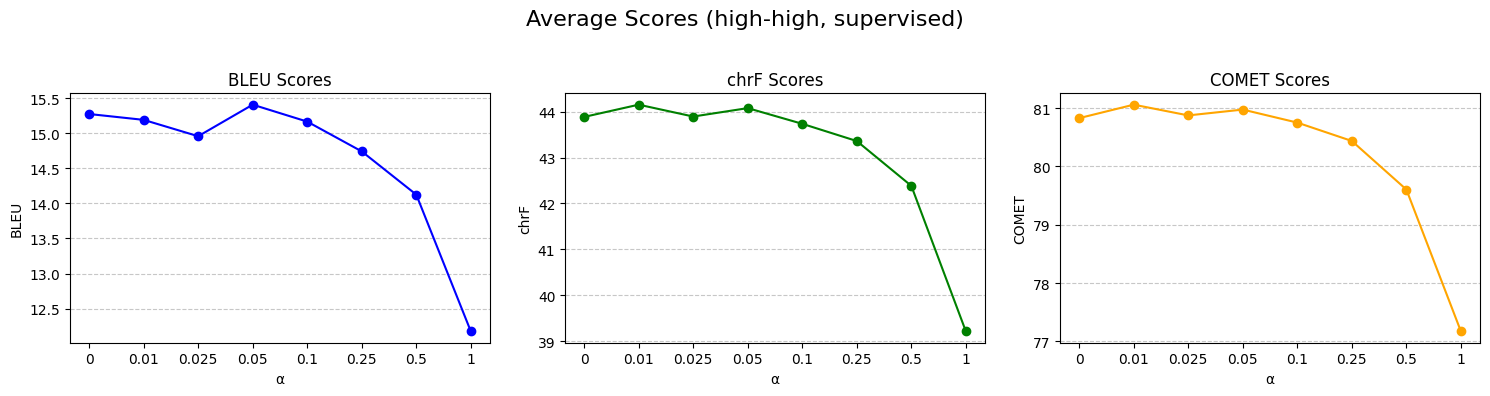

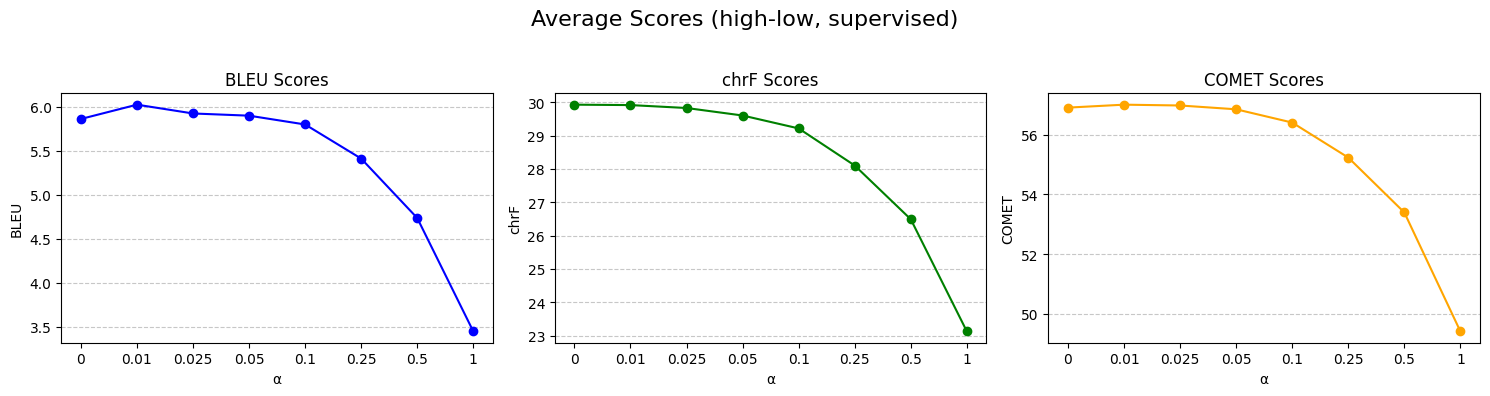

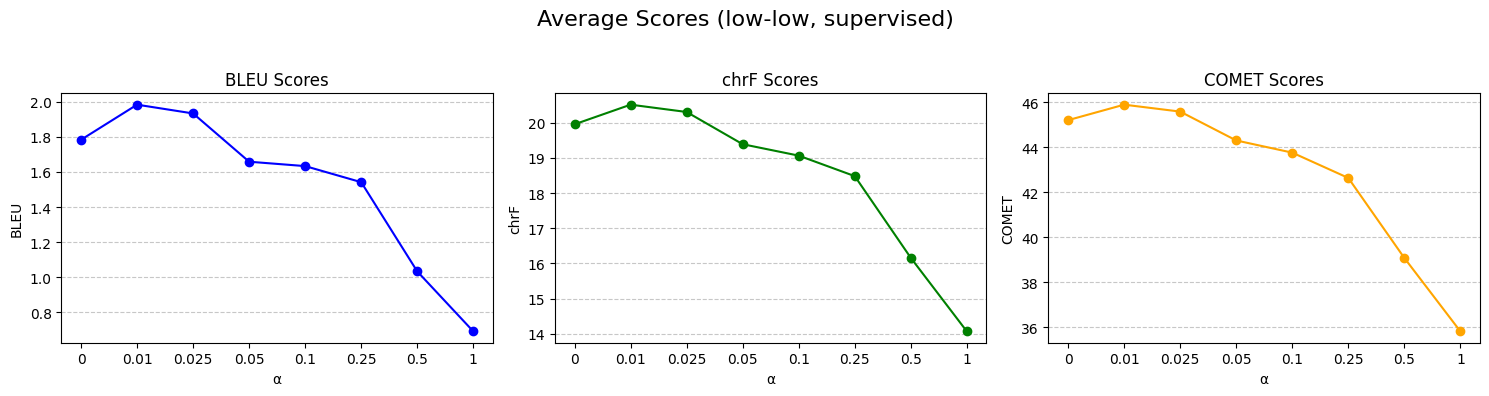

In [474]:
HH_sv, HH_sv_labels = compute_average_scores(scenario="high_high", svozs="supervised")
HL_sv, HL_sv_labels  = compute_average_scores(scenario="high_low", svozs="supervised")
LL_sv, LL_sv_labels  = compute_average_scores(scenario="low_low", svozs="supervised")

# Plot results
plot_alpha_scores_combined(HH_sv, scenario="high-high", svozs="supervised")
plot_alpha_scores_combined(HL_sv, scenario="high-low", svozs="supervised")
plot_alpha_scores_combined(LL_sv, scenario="low-low", svozs="supervised")

# plot_alpha_COMET_scores(HH_sv["COMET"], scenario="high-high", svozs="supervised")
# plot_alpha_COMET_scores(HL_sv["COMET"], scenario="high-low", svozs="supervised")
# plot_alpha_COMET_scores(LL_sv["COMET"], scenario="low-low", svozs="supervised")

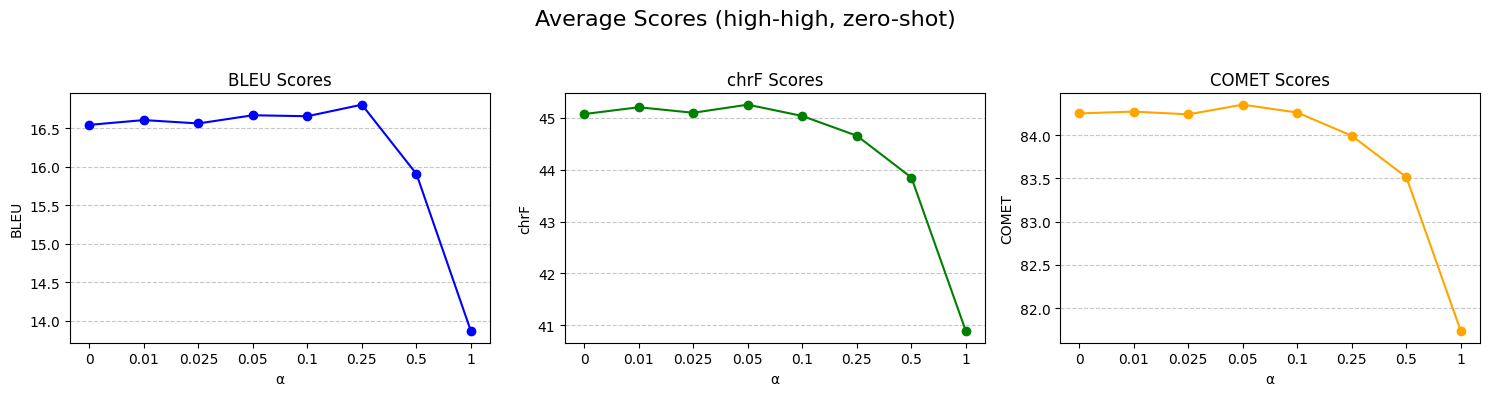

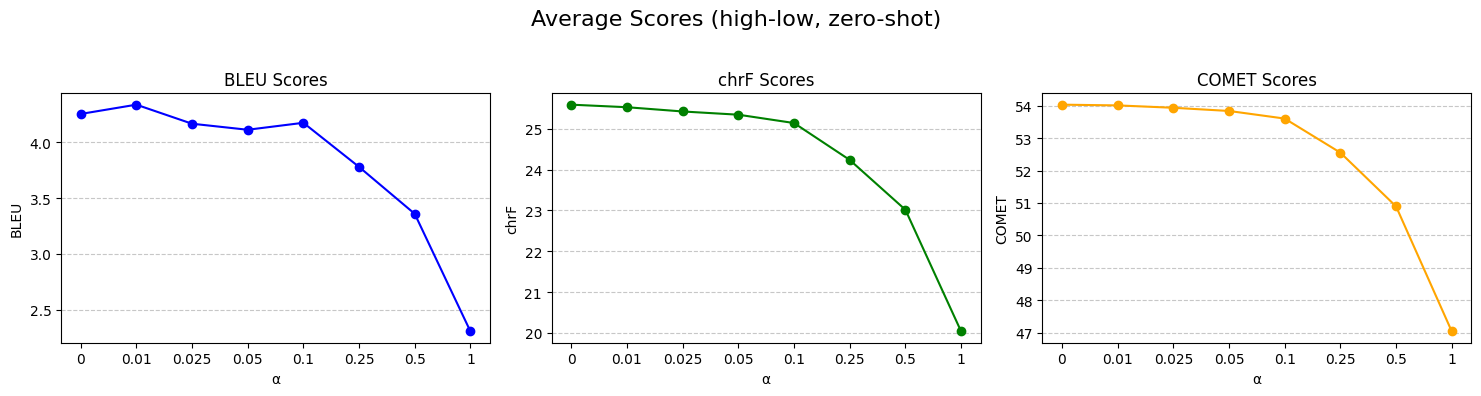

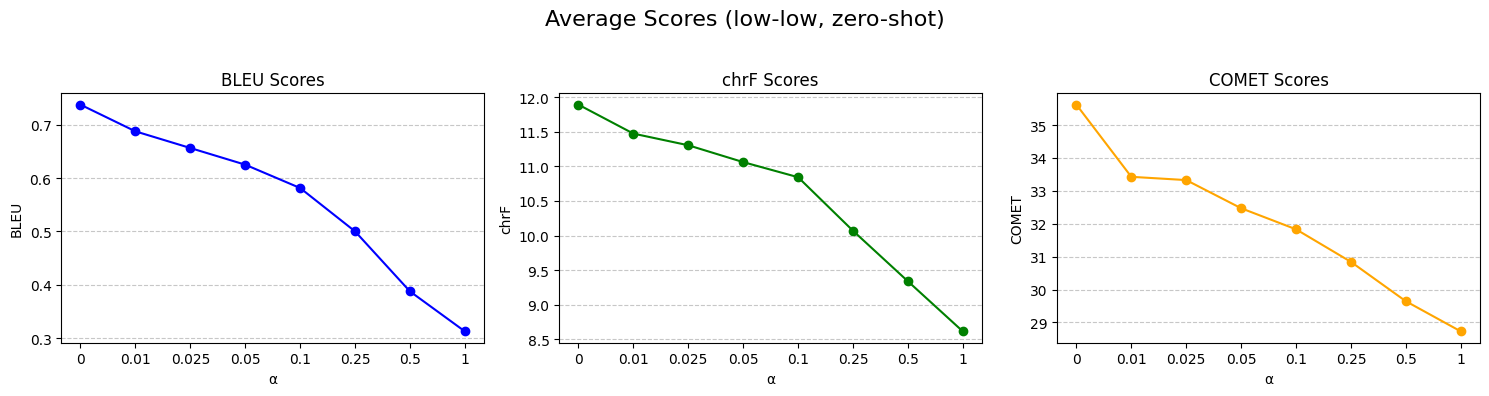

In [475]:
HH_zs, HH_zs_labels = compute_average_scores(scenario="high_high", svozs="zeroshot")
HL_zs, HL_zs_labels = compute_average_scores(scenario="high_low", svozs="zeroshot")
LL_zs, LL_zs_labels = compute_average_scores(scenario="low_low", svozs="zeroshot")

# Plot results
plot_alpha_scores_combined(HH_zs, scenario="high-high", svozs="zero-shot")
plot_alpha_scores_combined(HL_zs, scenario="high-low", svozs="zero-shot")
plot_alpha_scores_combined(LL_zs, scenario="low-low", svozs="zero-shot")

# plot_alpha_COMET_scores(HH_zs["COMET"], scenario="high-high", svozs="zero-shot")
# plot_alpha_COMET_scores(HL_zs["COMET"], scenario="high-low", svozs="zero-shot")
# plot_alpha_COMET_scores(LL_zs["COMET"], scenario="low-low", svozs="zero-shot")

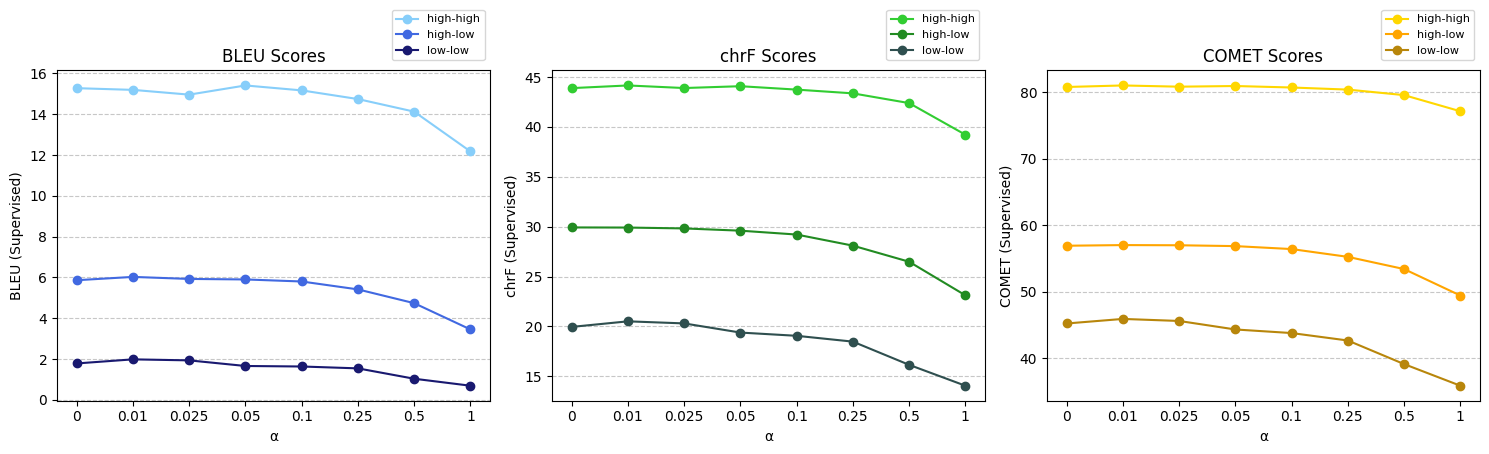

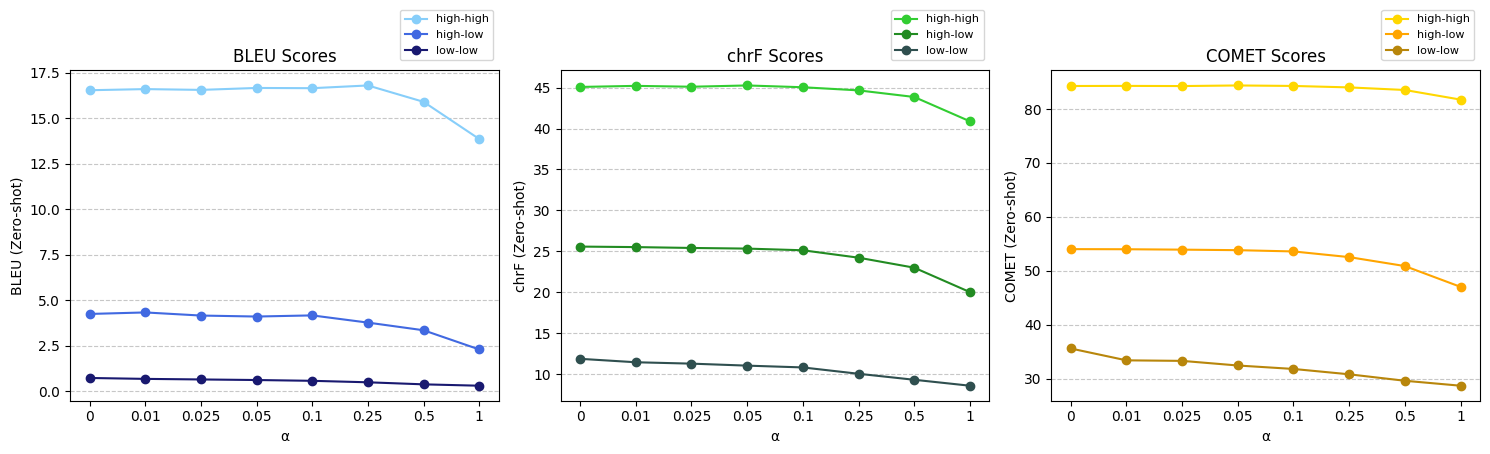

In [387]:
# Function to plot scores for all scenarios in one figure
def plot_combined_alpha_scores(score_dicts, scenarios, svozs, alpha_values=[0, 0.01, 0.025, 0.05, 0.1, 0.25, 0.5, 1]):
    metrics = ['BLEU', 'chrF', 'COMET']
    colors = {
        'BLEU': ['lightskyblue', 'royalblue', 'midnightblue'],
        'chrF': ['limegreen', 'forestgreen', 'darkslategray'],
        'COMET': ['gold', 'orange', 'darkgoldenrod']
    }
    
    fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True)
    
    for i, metric in enumerate(metrics):
        ax = axes[i]
        
        for j, scenario in enumerate(scenarios):
            values = [np.mean(x) for x in score_dicts[scenario][metric]]
            ax.plot(values, marker='o', linestyle='-', color=colors[metric][j], label=f"{scenario}")
        
        ax.set_title(f'{metric} Scores')
        ax.set_xticks(range(len(alpha_values)))
        ax.set_xticklabels(alpha_values)
        ax.set_xlabel('α')
        ax.set_ylabel(f'{metric} ({svozs})')
        ax.grid(axis='y', linestyle='--', alpha=0.7)
        ax.legend(loc='upper right', bbox_to_anchor=(1, 1.2), fontsize=8)

#     fig.suptitle(f'Average Scores for All Values of Alpha ({svozs})', fontsize=16, y=0.85)
    fig.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to accommodate title
    plt.show()

# Prepare data
HH_sv, HH_sv_labels = compute_average_scores(scenario="high_high", svozs="supervised")
HL_sv, HL_sv_labels = compute_average_scores(scenario="high_low", svozs="supervised")
LL_sv, LL_sv_labels = compute_average_scores(scenario="low_low", svozs="supervised")

# Combine all data in a dictionary for plotting
score_dicts = {
    "high-high": HH_sv,
    "high-low": HL_sv,
    "low-low": LL_sv
}

score_dicts_zs = {
    "high-high": HH_zs,
    "high-low": HL_zs,
    "low-low": LL_zs
}

# Plot results
plot_combined_alpha_scores(score_dicts, scenarios=["high-high", "high-low", "low-low"], svozs="Supervised")
plot_combined_alpha_scores(score_dicts_zs, scenarios=["high-high", "high-low", "low-low"], svozs="Zero-shot")

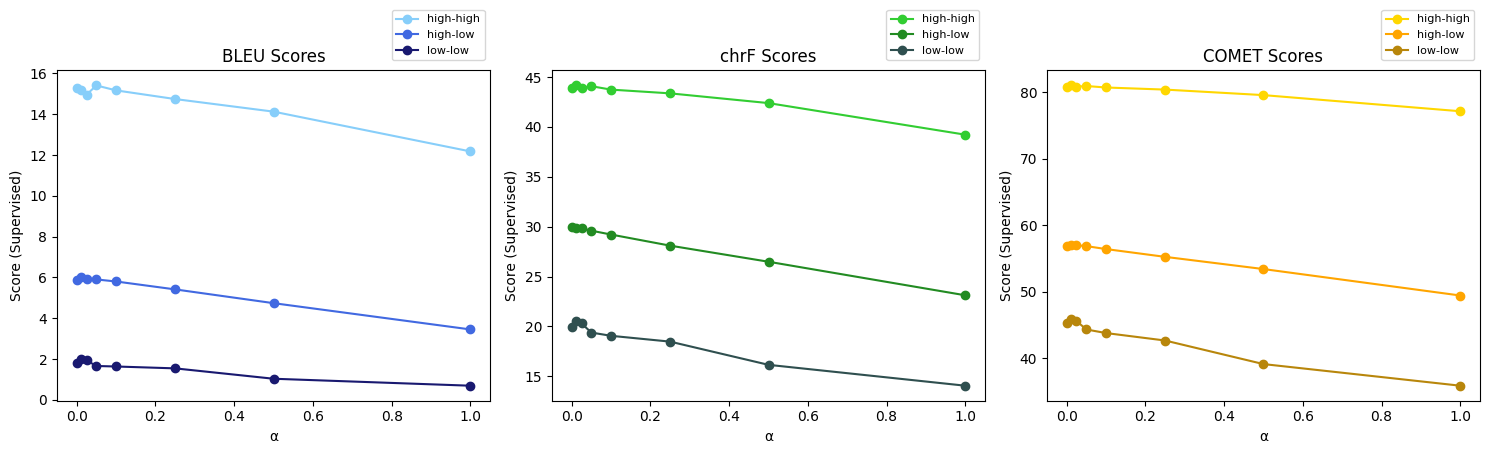

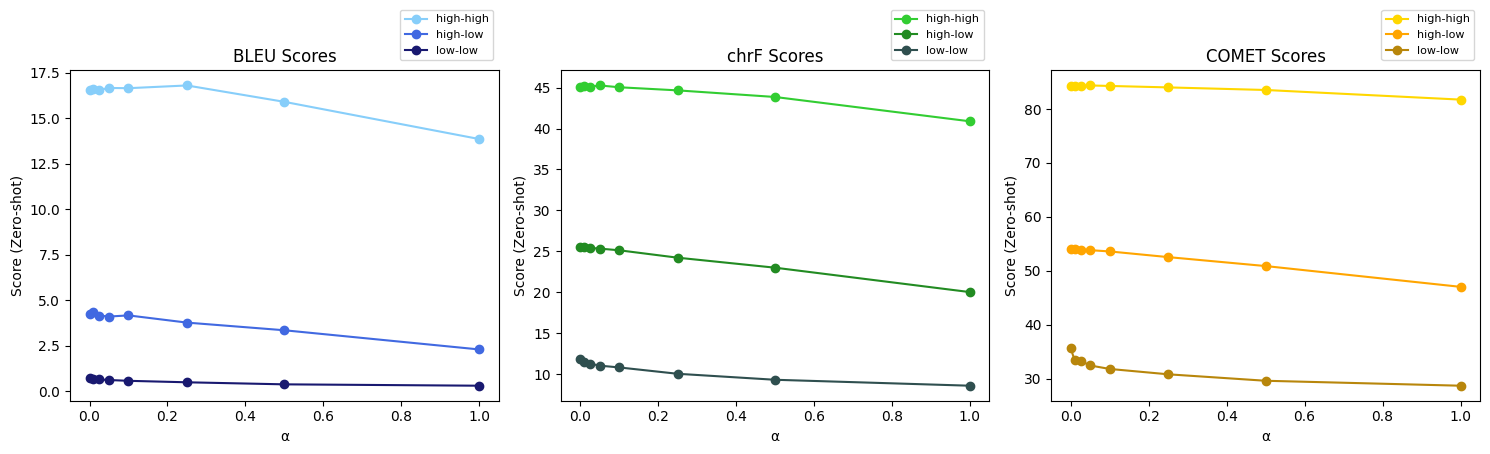

In [394]:
def plot_combined_alpha_scores(score_dicts, scenarios, svozs, alpha_values=[0, 0.01, 0.025, 0.05, 0.1, 0.25, 0.5, 1]):
    """
    Plots scores for multiple scenarios and metrics on a single figure, using continuous x-axis for alpha values.

    Parameters:
    - score_dicts: Dictionary containing metric scores for each scenario.
    - scenarios: List of scenarios (e.g., ['high-high', 'high-low', 'low-low']).
    - svozs: Indicates supervised or zero-shot ("Supervised" or "Zero-shot").
    - alpha_values: List of alpha values to use as the x-axis.
    """
    import matplotlib.pyplot as plt
    import numpy as np

    metrics = ['BLEU', 'chrF', 'COMET']
    colors = {
        'BLEU': ['lightskyblue', 'royalblue', 'midnightblue'],
        'chrF': ['limegreen', 'forestgreen', 'darkslategray'],
        'COMET': ['gold', 'orange', 'darkgoldenrod']
    }
    
    fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True)
    
    for i, metric in enumerate(metrics):
        ax = axes[i]
        
        for j, scenario in enumerate(scenarios):
            values = [np.mean(x) for x in score_dicts[scenario][metric]]
#             print(alpha_values)
            ax.plot(alpha_values, values, marker='o', linestyle='-', color=colors[metric][j], label=f"{scenario}")
        
        ax.set_title(f'{metric} Scores')
#         ax.set_xlim(0, 1)  # Set x-axis range from 0 to 1
        ax.set_xlabel('α')
        ax.set_ylabel(f'Score ({svozs})')
#         ax.grid(axis='y', linestyle='--', alpha=0.7)
        ax.legend(loc='upper right', bbox_to_anchor=(1, 1.2), fontsize=8)

    fig.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to accommodate title
    plt.show()

# Plot results
plot_combined_alpha_scores(score_dicts, scenarios=["high-high", "high-low", "low-low"], svozs="Supervised")
plot_combined_alpha_scores(score_dicts_zs, scenarios=["high-high", "high-low", "low-low"], svozs="Zero-shot")

In [6]:
def plot_bar_details(score_dict, labels, scenario, svozs):
    """
    Creates bar plots for BLEU, chrF, and COMET scores, averaged over all alphas for each language direction.

    Parameters:
    - score_dict: A dictionary with keys 'BLEU', 'chrF', 'COMET', and values are 2D arrays [alphas x labels].
    - labels: A list of translation directions.
    - alphas: A list of alpha values.
    - svozs: A string indicating the svozs ('supervised' or 'zeroshot').
    """
    metrics = ['BLEU', 'chrF', 'COMET']
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))

    # Professional and clear color palette
    colors = [
        '#1F77B4', '#FF7F0E', '#2CA02C', '#D62728',
        '#9467BD', '#8C564B', '#E377C2', '#7F7F7F',
        '#BCBD22', '#17BECF', '#AEC7E8', '#FFBB78',
        '#98DF8A', '#FF9896', '#C5B0D5', '#C49C94'
    ]

    # Define similar pairs
    if scenario == 'low-low':
        similar_pairs = ["lim-ltz", "ltz-lim", "ibo-sag", "sag-ibo", "npi-pan", "pan-npi", "cym-gle", "gle-cym"]
        dissimilar_pairs = list(set(labels) - set(similar_pairs))
    elif scenario == 'high-high':
        similar_pairs = ["nld-deu", "deu-nld", "fra-ces", "ces-fra", "jpn-zho", "zho-jpn", "tgl-rus", "rus-tgl"]
        dissimilar_pairs = list(set(labels) - set(similar_pairs))
    else:
        similar_pairs = labels
        dissimilar_pairs = []

    if svozs == 'zero-shot':
        # Sort dissimilar pairs to group X-Y and Y-X together
        grouped_dissimilar_pairs = []
        seen_pairs = set()
        for pair in dissimilar_pairs:
            if pair not in seen_pairs:
                x, y = pair.split('-')
                reverse_pair = f"{y}-{x}"
                grouped_dissimilar_pairs.append(pair)
                if reverse_pair in dissimilar_pairs:
                    grouped_dissimilar_pairs.append(reverse_pair)
                    seen_pairs.add(reverse_pair)
                seen_pairs.add(pair)

        # Combine similar and reordered dissimilar pairs
        sorted_labels = similar_pairs + grouped_dissimilar_pairs
        label_indices = [labels.index(label) for label in sorted_labels]
    else:
        # If not zeroshot, use the labels as-is
        sorted_labels = labels
        label_indices = list(range(len(labels)))

    for i, metric in enumerate(metrics):
        # Ensure scores are NumPy arrays for proper 2D indexing
        scores = np.array(score_dict[metric])  # [alphas x labels]

        # Reorder scores based on sorted labels
        avg_scores = np.mean(scores, axis=0)[label_indices]  # Average across alphas and reorder

        # Create the bar plot with alternating colors grouped in pairs
        bar_colors = [colors[(j // 2) % len(colors)] for j in range(len(sorted_labels))]

        for j, label in enumerate(sorted_labels):
            if svozs == 'zero-shot':
                is_similar = label in similar_pairs
                hatch = '' if is_similar else '///'  # No pattern for similar, stripes for dissimilar
            else:
                hatch = None  # No hatching for supervised svozs

            # Plot each bar individually with its corresponding hatch pattern
            ax[i].bar(j, avg_scores[j], color=bar_colors[j], alpha=0.85, hatch=hatch)

        # Set the tick positions and labels
        ax[i].set_xticks(range(len(sorted_labels)))  # Set x-tick positions based on the number of labels
        ax[i].set_xticklabels(sorted_labels, rotation=45, ha='right')  # Apply labels at the tick positions

        # Customize the plot
        ax[i].set_ylabel(f'{metric}')
        ax[i].set_title(f'{metric} Score')

        # Add value labels on top of each bar
        for j, value in enumerate(avg_scores):
            ax[i].text(j, value + 0.02, f'{value:.2f}', ha='center', va='bottom', fontsize=7)

    # Add legend only for zeroshot svozs
    if svozs == 'zero-shot':
        # Use distinct colors for the legend to make it clear
        similar_patch = mpatches.Patch(facecolor='lightgray', edgecolor='black', alpha=0.85, label='Similar Pairs')
        dissimilar_patch = mpatches.Patch(facecolor='lightgray', edgecolor='black', alpha=0.85, label='Dissimilar Pairs', hatch='///')
        
        # Add the legend to the figure
        fig.legend(handles=[similar_patch, dissimilar_patch], ncol=2, title='Pair Types',bbox_to_anchor=(0.99, 1.04))

    plt.suptitle(f'Average scores per language direction ({scenario}, {svozs})')

    plt.tight_layout()
    plt.show()


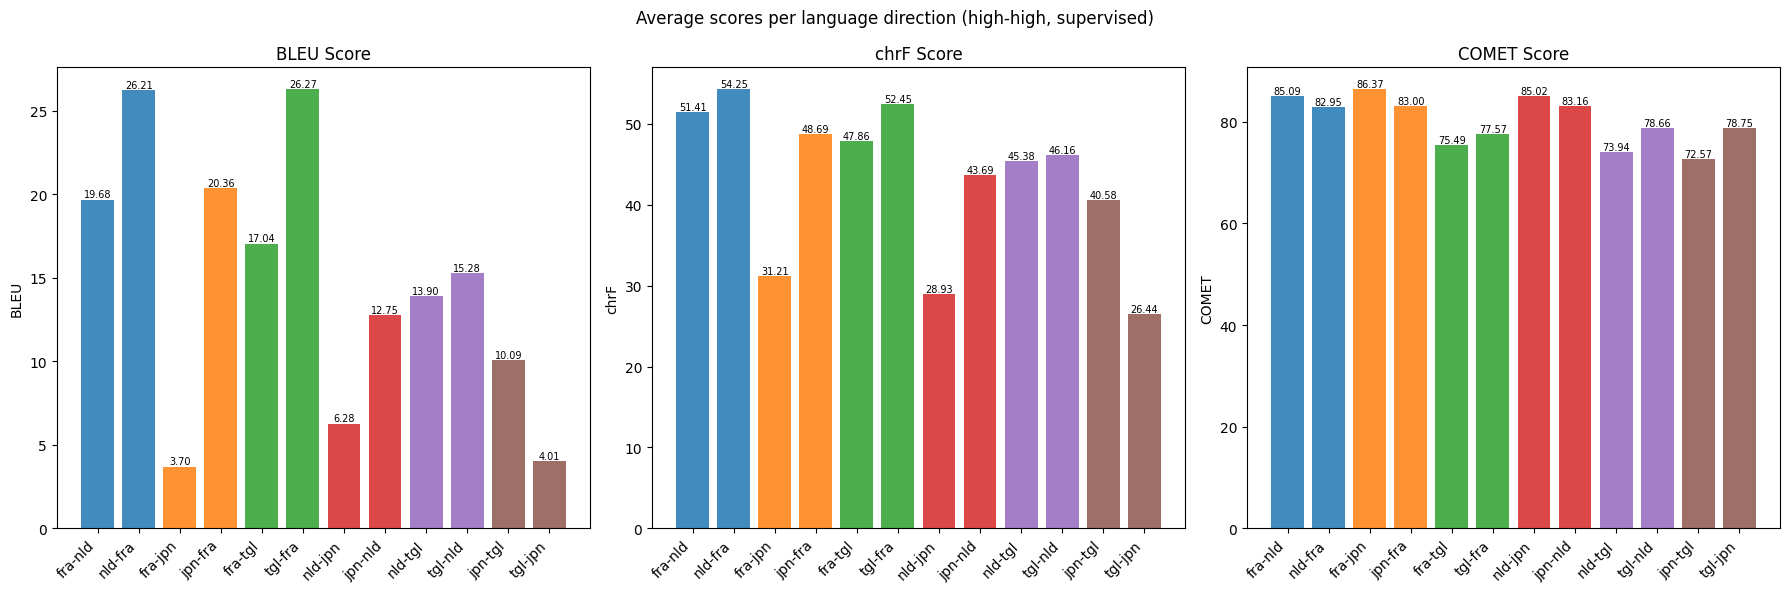

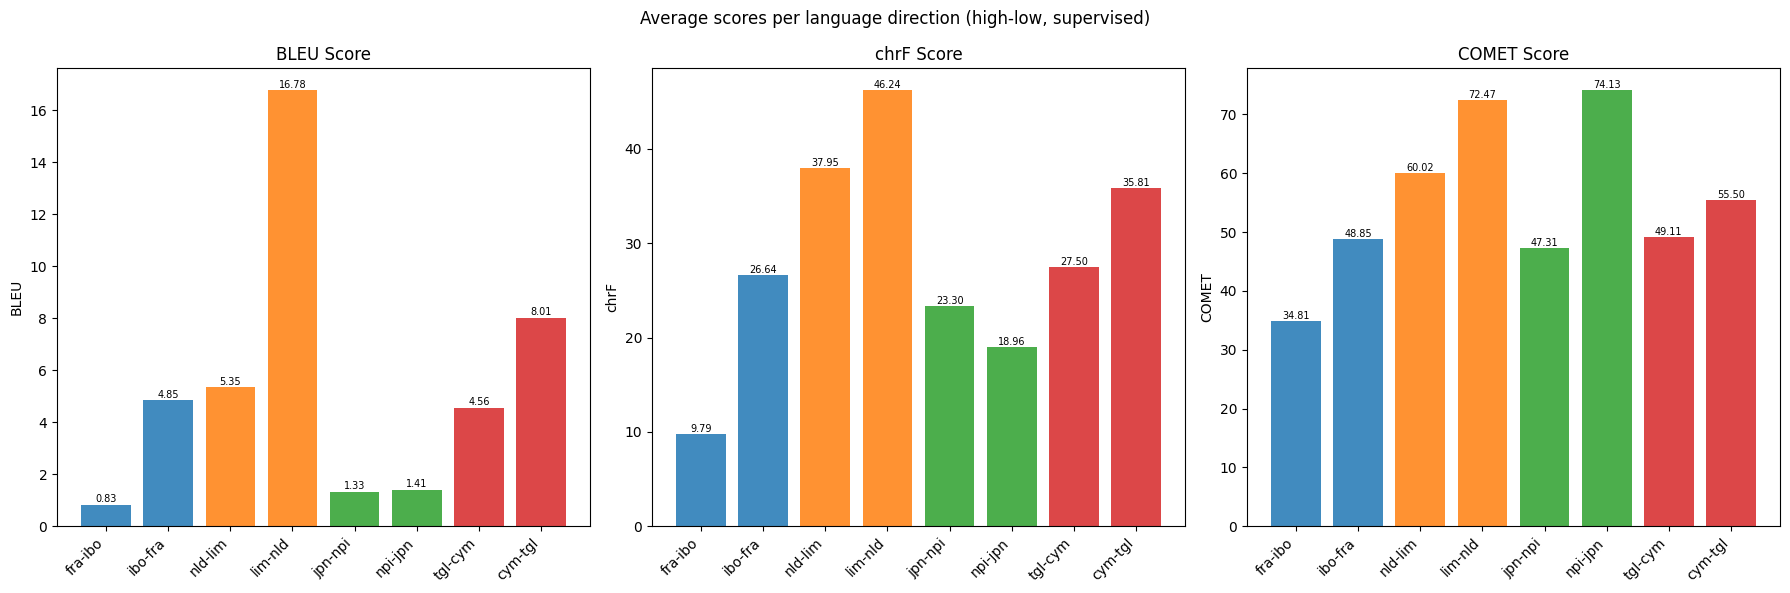

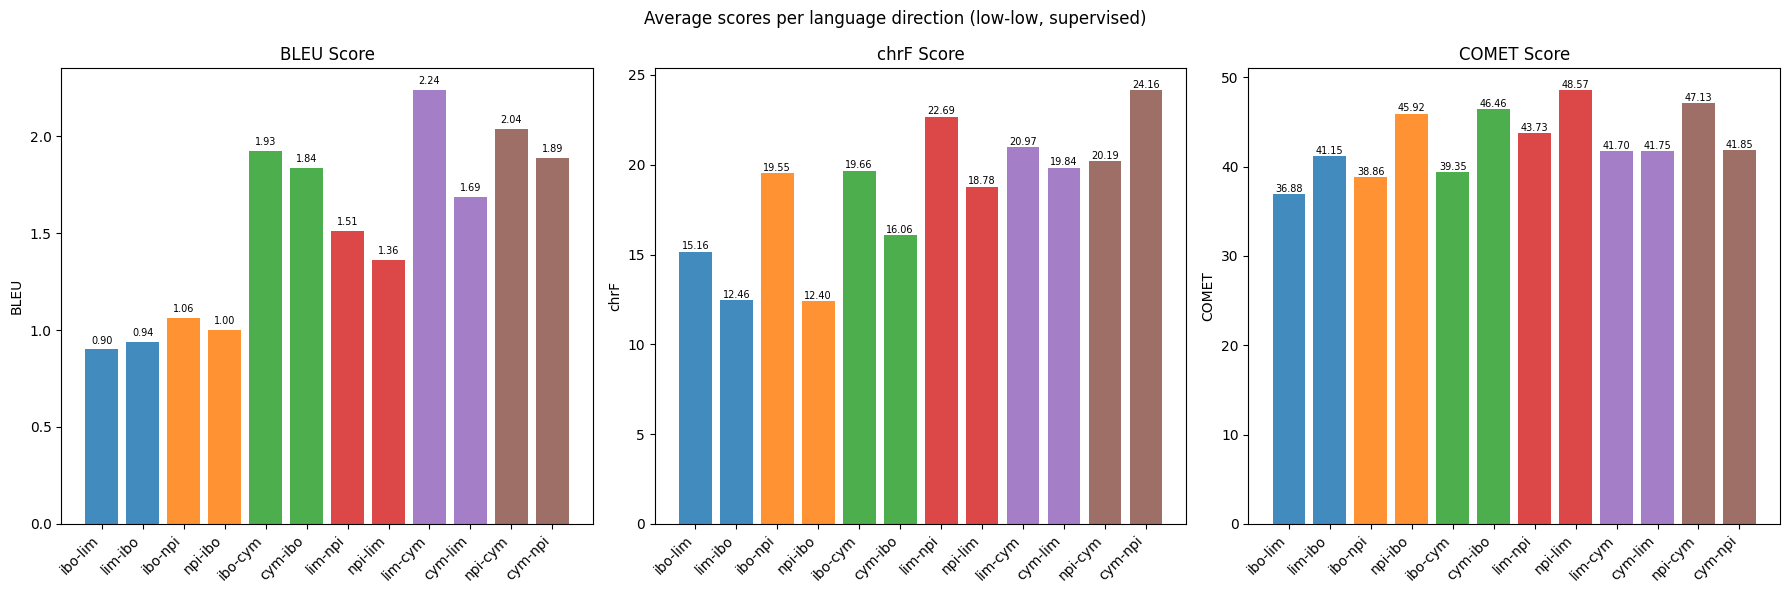

In [7]:
plot_bar_details(HH_sv, HH_sv_labels, scenario='high-high', svozs='supervised')
plot_bar_details(HL_sv, HL_sv_labels, scenario='high-low', svozs='supervised')
plot_bar_details(LL_sv, LL_sv_labels, scenario='low-low', svozs='supervised')

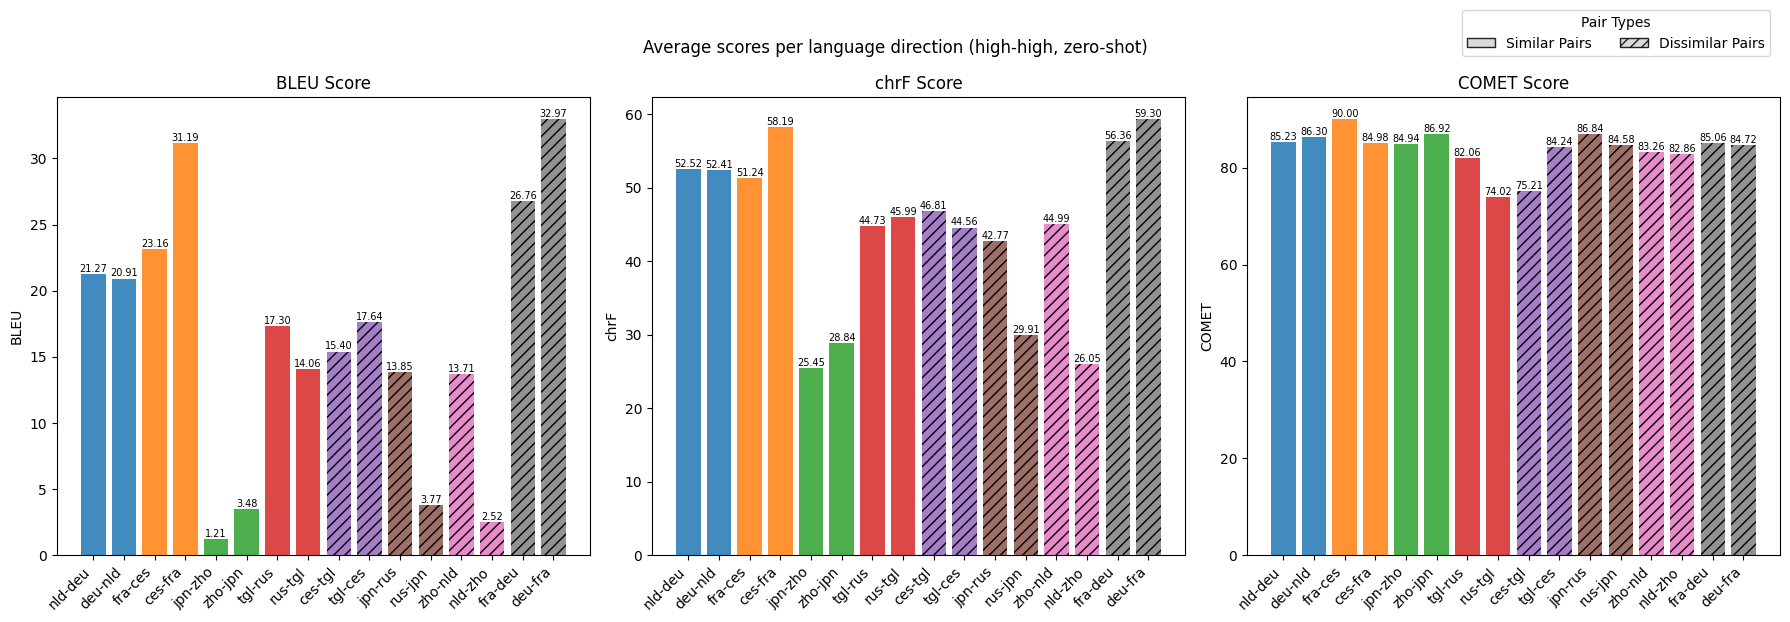

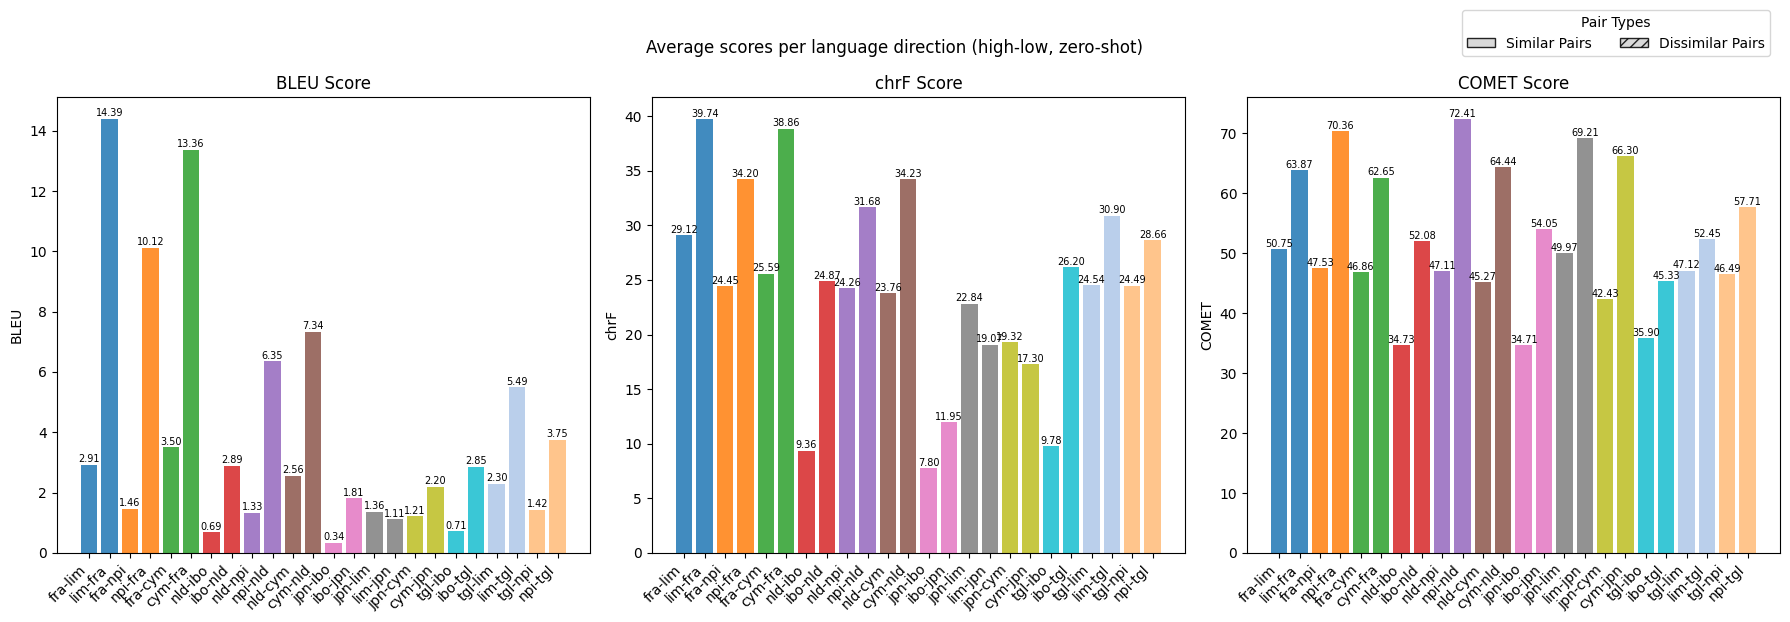

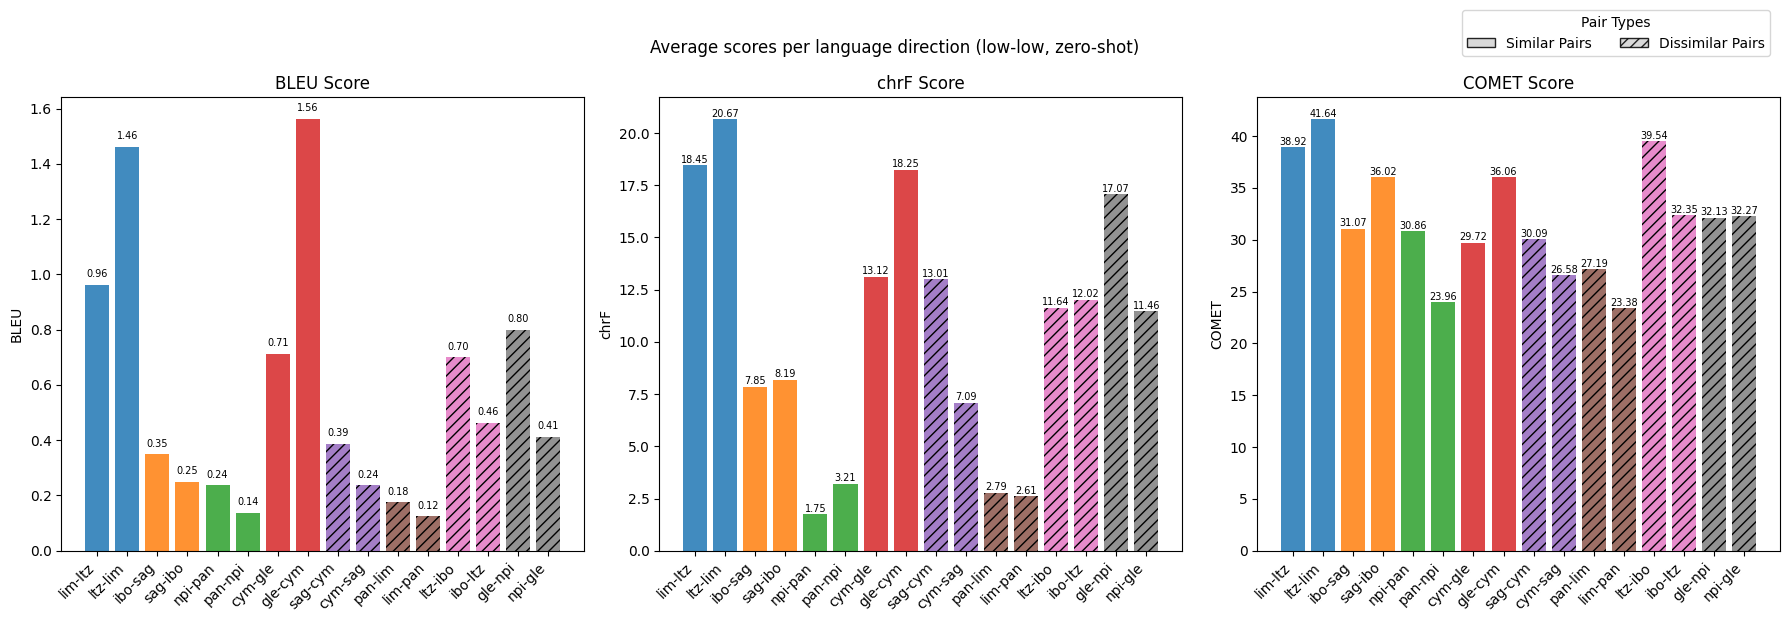

In [8]:
plot_bar_details(HH_zs, HH_zs_labels, scenario='high-high', svozs='zero-shot')
plot_bar_details(HL_zs, HL_zs_labels, scenario='high-low', svozs='zero-shot')
plot_bar_details(LL_zs, LL_zs_labels, scenario='low-low', svozs='zero-shot')

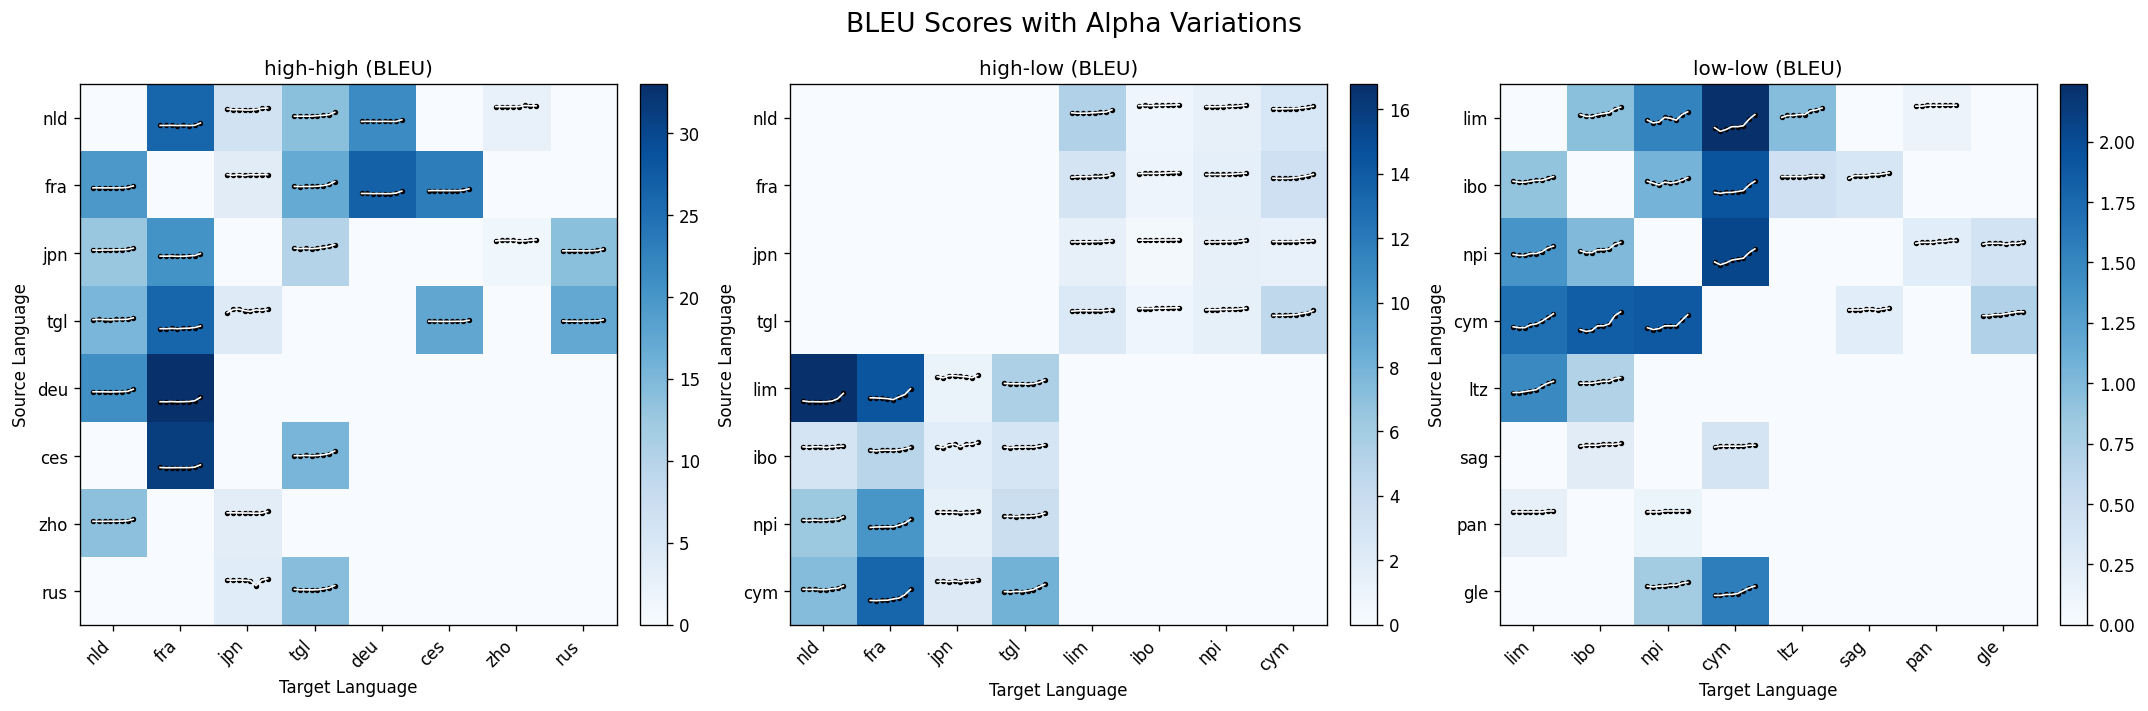

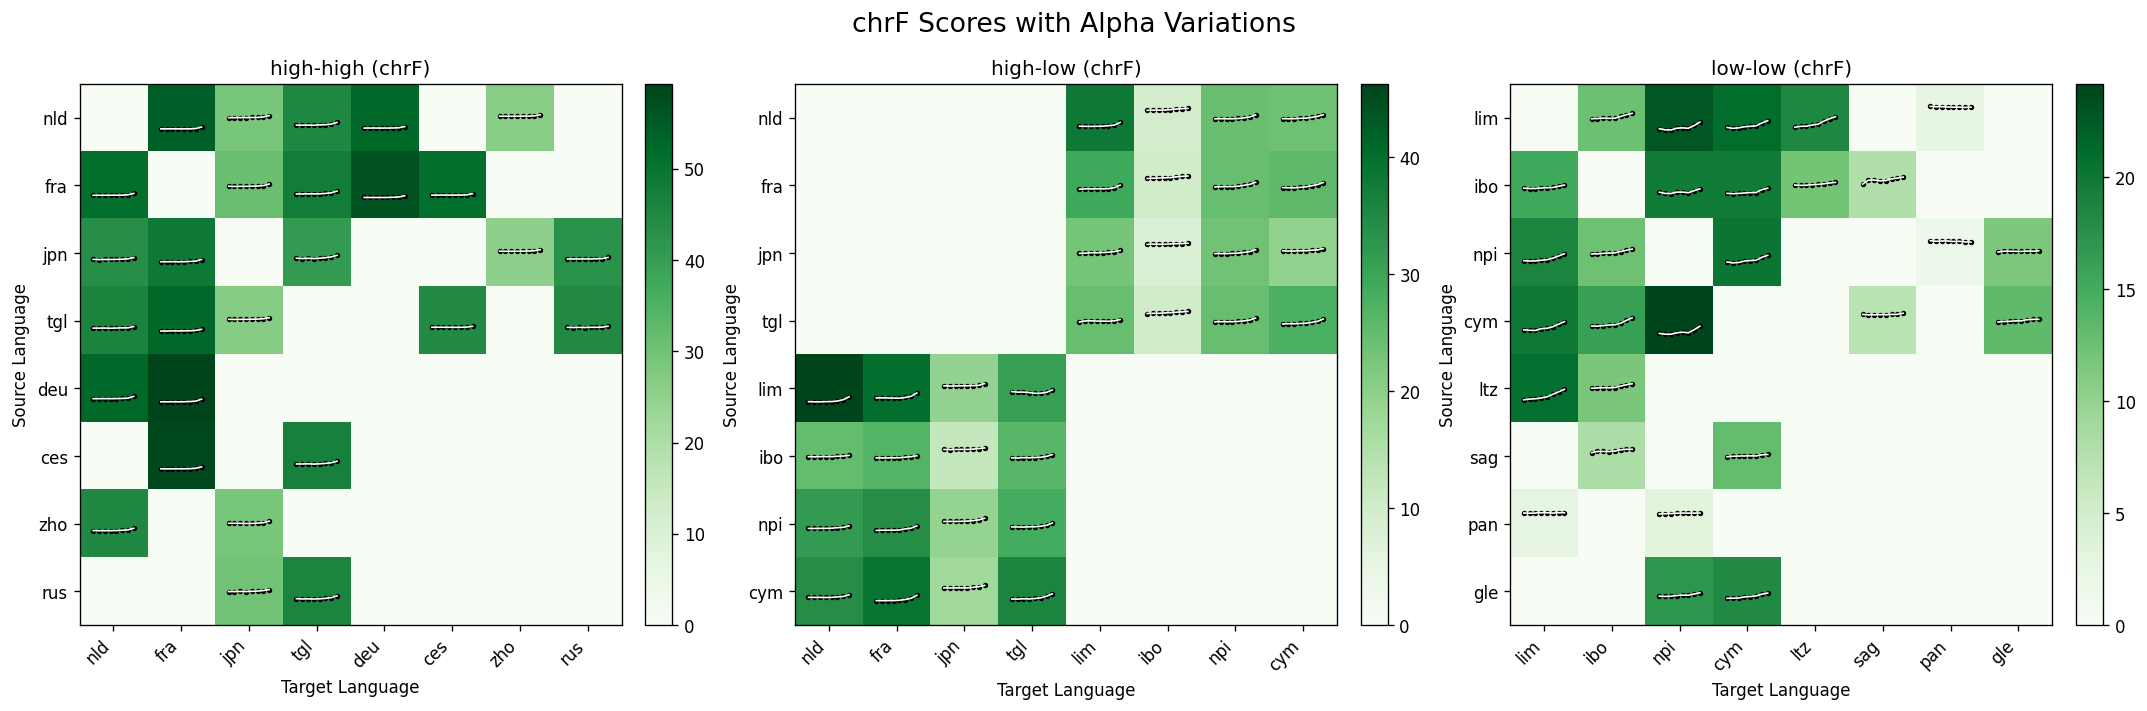

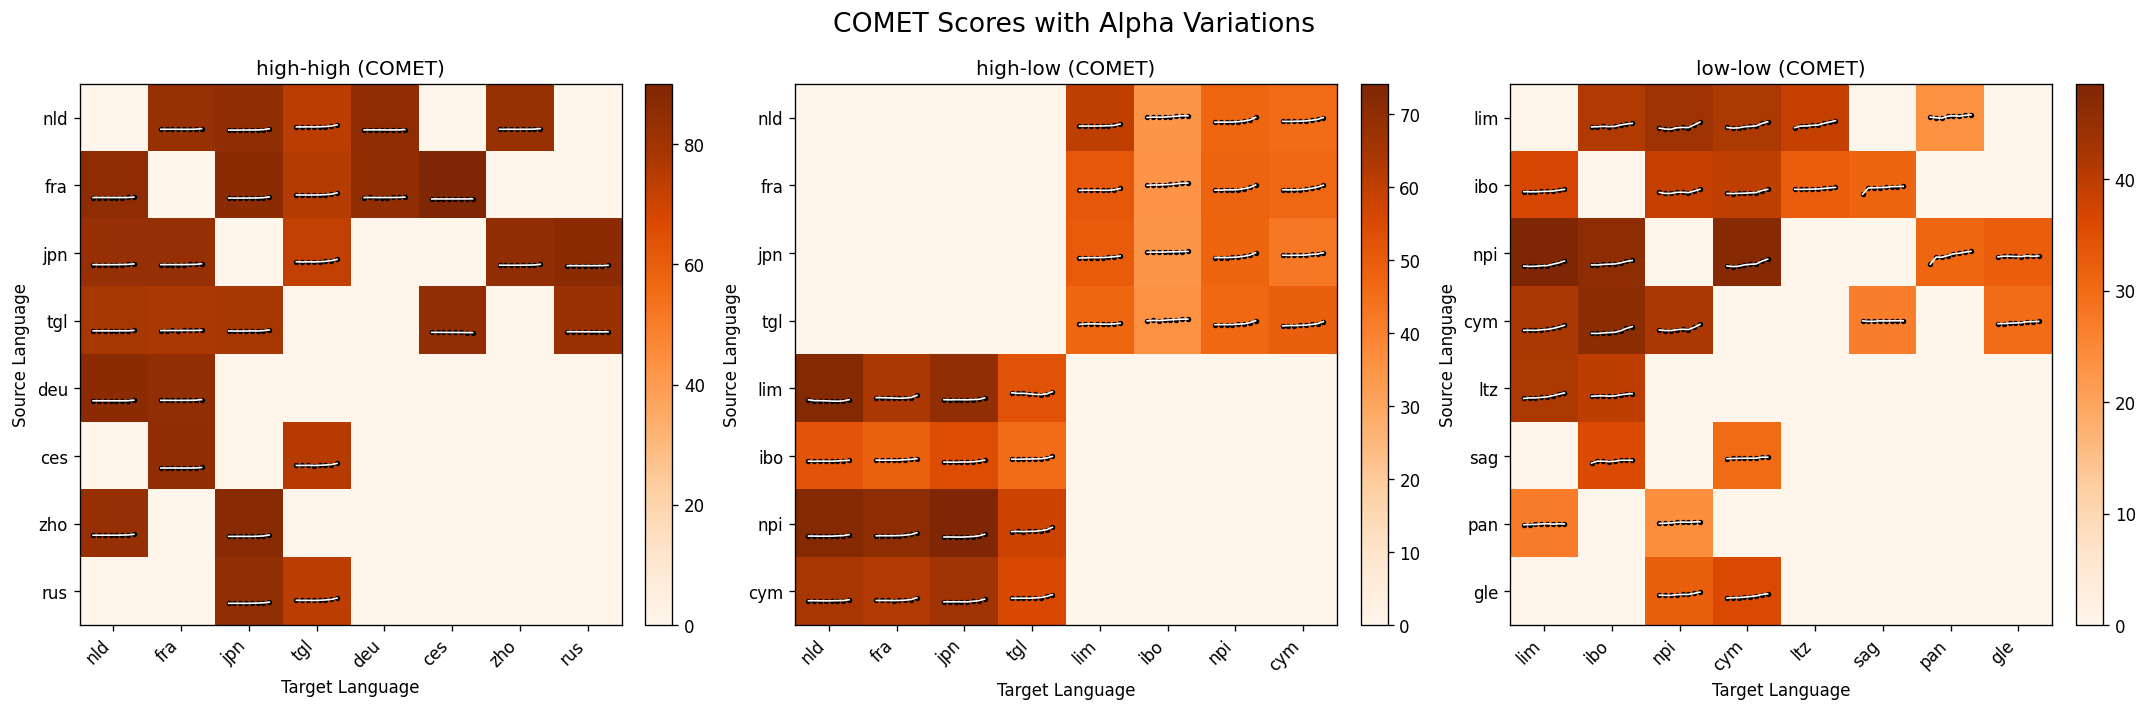

In [530]:
import matplotlib.pyplot as plt
import numpy as np

def plot_language_heatmap_with_line_variations(score_dicts, labels_dict, alpha_values, metric="BLEU", setting="Supervised"):
    """
    Heatmap with source languages on the y-axis, target languages on the x-axis,
    and embedded mini line plots in cells showing scores across alpha values.

    Parameters:
    - score_dicts: Dictionary containing scores for each scenario.
    - labels_dict: Dictionary containing labels for each scenario.
    - alpha_values: List of alpha values (used for line chart x-axis).
    - metric: The metric to plot (e.g., 'BLEU', 'chrF', 'COMET').
    - setting: Either "Supervised" or "Zero-shot" to differentiate plots.
    """
    # Custom order for each scenario
    scenario_order = {
        "high-high": ["nld", "fra", "jpn", "tgl", "deu", "ces", "zho", "rus"],
        "high-low": ["nld", "fra", "jpn", "tgl", "lim", "ibo", "npi", "cym"],
        "low-low": ["lim", "ibo", "npi", "cym", "ltz", "sag", "pan", "gle"]
    }

    # Define heatmap colors based on the metric
    heatmap_colors = {
        "BLEU": "Blues",
        "chrF": "Greens",
        "COMET": "Oranges"
    }

    # Set the heatmap color map for the current metric
    cmap = heatmap_colors.get(metric, "Blues")  # Default to "Blues" if the metric is unknown

    scenarios = score_dicts.keys()
    num_scenarios = len(scenarios)
    fig, axes = plt.subplots(1, num_scenarios, figsize=(6 * num_scenarios, 6), dpi=120)

    for idx, scenario in enumerate(scenarios):
        ax = axes[idx]
        labels = labels_dict[scenario]
        scores = np.array(score_dicts[scenario][metric])  # [alphas x labels]

        # Extract unique source and target languages from the scenario's predefined order
        order = scenario_order[scenario]
        all_languages = sorted(set(lang.split('-')[0] for lang in labels) | set(lang.split('-')[1] for lang in labels))

        # Initialize the heatmap grid
        heatmap_values = np.zeros((len(order), len(order)))

        # Map labels to grid positions based on the predefined order
        for pair_index, pair in enumerate(labels):
            source, target = pair.split('-')
            row = order.index(source)
            col = order.index(target)
            heatmap_values[row, col] = np.mean(scores[:, pair_index])  # Average for heatmap intensity

        # Plot the heatmap
        im = ax.imshow(heatmap_values, cmap=cmap, aspect="auto")

        # Add mini line plots in cells
        for row, source in enumerate(order):
            for col, target in enumerate(order):
                pair = f"{source}-{target}"
                if pair in labels:
                    pair_index = labels.index(pair)
                    cell_scores = scores[:, pair_index]

                    # Normalize the line graph's y-axis to fit within the cell
                    normalized_scores = cell_scores / max(scores.flatten())
                    line_x = np.linspace(col - 0.3, col + 0.3, len(alpha_values))  # Scaled x positions for the line
                    line_y = row - 0.2 + 0.4 * normalized_scores  # Centered y positions within the cell
                    
                    # Plot the line

                    ax.plot(line_x, line_y, color='white', linewidth=1)
                    ax.scatter(line_x, line_y, color='black', s=5)  # Add points for clarity


        # Configure the axes
        ax.set_xticks(range(len(order)))
        ax.set_xticklabels(order, rotation=45, ha="right")
        ax.set_yticks(range(len(order)))
        ax.set_yticklabels(order)
        ax.set_title(f"{scenario} ({metric})")
        ax.set_xlabel("Target Language")
        ax.set_ylabel("Source Language")

        # Add colorbar
        fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

    plt.suptitle(f"{metric} Scores with Alpha Variations", fontsize=16)
    plt.tight_layout()
    plt.show()


# Example Usage
plot_language_heatmap_with_line_variations(
    score_dicts=score_dicts_both,
    labels_dict=labels_dict_both,
    alpha_values=alpha_values,
    metric="BLEU",
    setting="Supervised"
)

plot_language_heatmap_with_line_variations(
    score_dicts=score_dicts_both,
    labels_dict=labels_dict_both,
    alpha_values=alpha_values,
    metric="chrF",
    setting="Supervised"
)

plot_language_heatmap_with_line_variations(
    score_dicts=score_dicts_both,
    labels_dict=labels_dict_both,
    alpha_values=alpha_values,
    metric="COMET",
    setting="Supervised"
)


In [518]:
# Example Data
alpha_values = [0, 0.01, 0.025, 0.05, 0.1, 0.25, 0.5, 1]
score_dicts = {
    "high-high": HH_sv,
    "high-low": HL_sv,
    "low-low": LL_sv
}
score_dicts_zs = {
    "high-high": HH_zs,
    "high-low": HL_zs,
    "low-low": LL_zs
}
labels_dict = {
    'high-high': HH_sv_labels,
    'high-low': HL_sv_labels,
    'low-low': LL_sv_labels
}
labels_dict_zs = {
    'high-high': HH_zs_labels,
    'high-low': HL_zs_labels,
    'low-low': LL_zs_labels
}

# THIS IS SOOOO UGLY BUT I HAVE LIKE 72 HOURS LEFT.
# No time for elegant code I'm afraid. 
HH_BLEU = score_dicts['high-high']['BLEU']
HL_BLEU = score_dicts['high-low']['BLEU']
LL_BLEU = score_dicts['low-low']['BLEU']
HH_chrF = score_dicts['high-high']['chrF']
HL_chrF = score_dicts['high-low']['chrF']
LL_chrF = score_dicts['low-low']['chrF']
HH_COMET = score_dicts['high-high']['COMET']
HL_COMET = score_dicts['high-low']['COMET']
LL_COMET = score_dicts['low-low']['COMET']
HH_BLEU_zs = score_dicts_zs['high-high']['BLEU']
HL_BLEU_zs = score_dicts_zs['high-low']['BLEU']
LL_BLEU_zs = score_dicts_zs['low-low']['BLEU']
HH_chrF_zs = score_dicts_zs['high-high']['chrF']
HL_chrF_zs = score_dicts_zs['high-low']['chrF']
LL_chrF_zs = score_dicts_zs['low-low']['chrF']
HH_COMET_zs = score_dicts_zs['high-high']['COMET']
HL_COMET_zs = score_dicts_zs['high-low']['COMET']
LL_COMET_zs = score_dicts_zs['low-low']['COMET']

HH_BLEU_both = [np.append(x,y) for x,y in zip(HH_BLEU, HH_BLEU_zs)]
HL_BLEU_both = [np.append(x,y) for x,y in zip(HL_BLEU, HL_BLEU_zs)]
LL_BLEU_both = [np.append(x,y) for x,y in zip(LL_BLEU, LL_BLEU_zs)]
HH_chrF_both = [np.append(x,y) for x,y in zip(HH_chrF, HH_chrF_zs)]
HL_chrF_both = [np.append(x,y) for x,y in zip(HL_chrF, HL_chrF_zs)]
LL_chrF_both = [np.append(x,y) for x,y in zip(LL_chrF, LL_chrF_zs)]
HH_COMET_both = [np.append(x,y) for x,y in zip(HH_COMET, HH_COMET_zs)]
HL_COMET_both = [np.append(x,y) for x,y in zip(HL_COMET, HL_COMET_zs)]
LL_COMET_both = [np.append(x,y) for x,y in zip(LL_COMET, LL_COMET_zs)]

HH_both = {'BLEU': HH_BLEU_both, 'chrF': HH_chrF_both, 'COMET': HH_COMET_both}
HL_both = {'BLEU': HL_BLEU_both, 'chrF': HL_chrF_both, 'COMET': HL_COMET_both}
LL_both = {'BLEU': LL_BLEU_both, 'chrF': LL_chrF_both, 'COMET': LL_COMET_both}

score_dicts_both = {'high-high': HH_both, 'high-low': HL_both, 'low-low': LL_both,}

labels_HH = labels_dict['high-high'] + labels_dict_zs['high-high']
labels_HL = labels_dict['high-low'] + labels_dict_zs['high-low']
labels_LL = labels_dict['low-low'] + labels_dict_zs['low-low']

labels_dict_both = {'high-high':labels_HH, 'high-low':labels_HL, 'low-low':labels_LL}

len(score_dicts_both['high-low']['BLEU']) == len(labels_dict_both['high-low'])

# len(labels_dict_both['high-high'])
# len(labels_dict_both['high-low']['BLEU'])
len(score_dicts_zs['high-low']['BLEU'][0])
# labels_dict_zs['high-low']

# Call Function
# plot_heatmap_with_embedded_bars(score_dicts, labels_dict["BLEU"], alpha_values, metric='BLEU')

24

In [456]:
score_dicts_both

{'high-high': {'BLEU': [array([20. , 26.6,  3.4, 20.8, 18.2, 27. ,  5.8, 13.2, 15. , 15.7, 10.8,
           6.8]),
   array([20. , 26.6,  4.3, 20.9, 18.4, 27.1,  6.9, 13.4, 15. , 15.4, 11.4,
           2.9]),
   array([20.1, 26.5,  3.4, 20.7, 18.3, 26.7,  6.7, 13.1, 14.9, 15.6, 11.1,
           2.4]),
   array([20.1, 26.7,  4.5, 21.1, 18.3, 27.1,  7.2, 13.2, 15. , 15.9, 11.5,
           4.3]),
   array([20.1, 26.6,  3.4, 21. , 18. , 26.6,  7.2, 13. , 14.3, 15.5, 10.9,
           5.4]),
   array([20. , 26.7,  3.8, 20.6, 17.2, 26.4,  6.7, 12.8, 13.9, 15.5,  9.9,
           3.4]),
   array([19.5, 26.5,  3.4, 20.1, 15.8, 25.6,  5. , 12.5, 13.1, 15.2,  8.7,
           4.1]),
   array([17.6, 23.5,  3.4, 17.7, 12.1, 23.7,  4.7, 10.8, 10. , 13.4,  6.4,
           2.8])],
  'chrF': [array([52.1, 54.8, 32. , 49.5, 49.1, 53.2, 29.8, 44.3, 46.5, 46.7, 41.6,
          27. ]),
   array([52.1, 54.9, 32.5, 49.7, 49.3, 53.4, 29.9, 44.7, 46.7, 46.8, 42.4,
          27.4]),
   array([52.1, 54.8, 32.1, 49

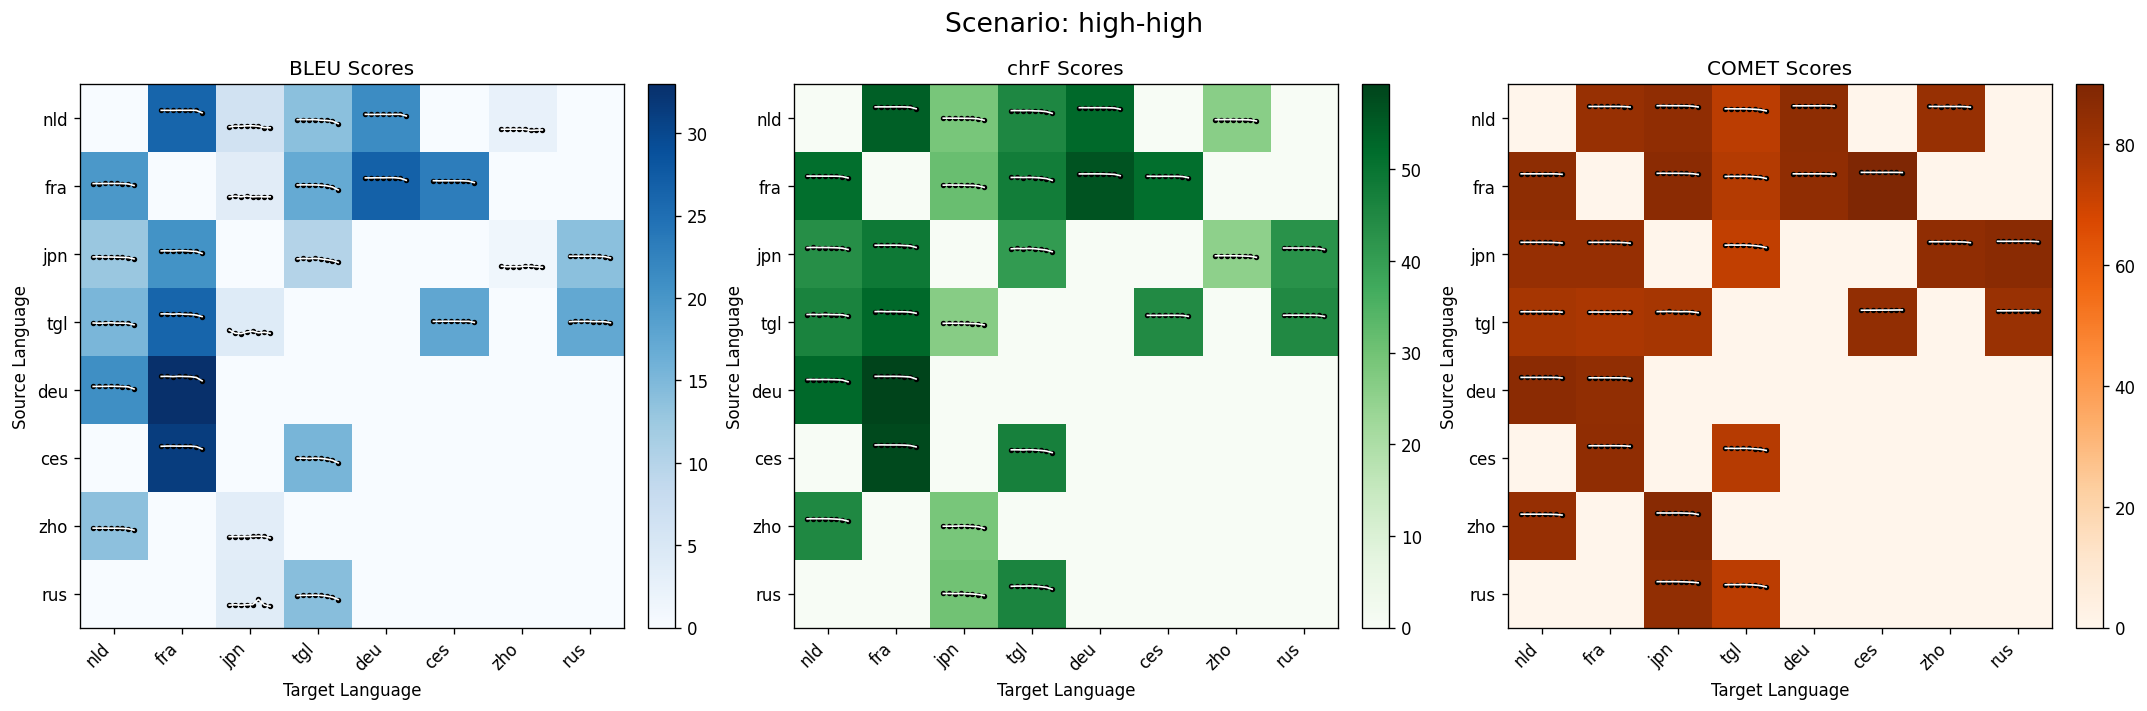

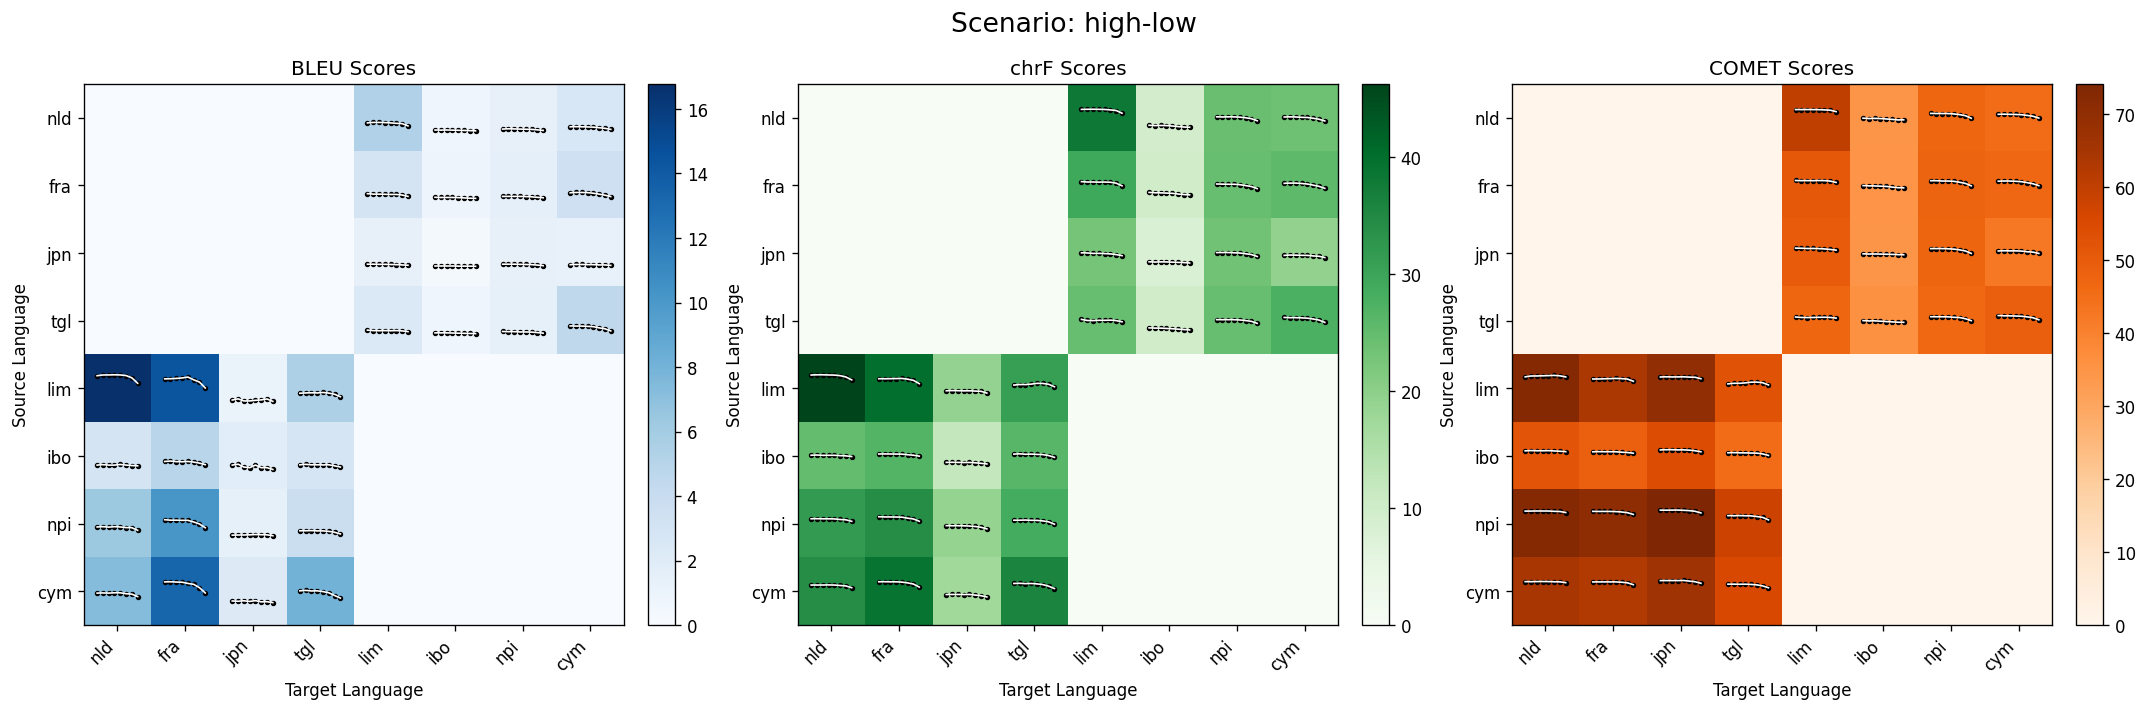

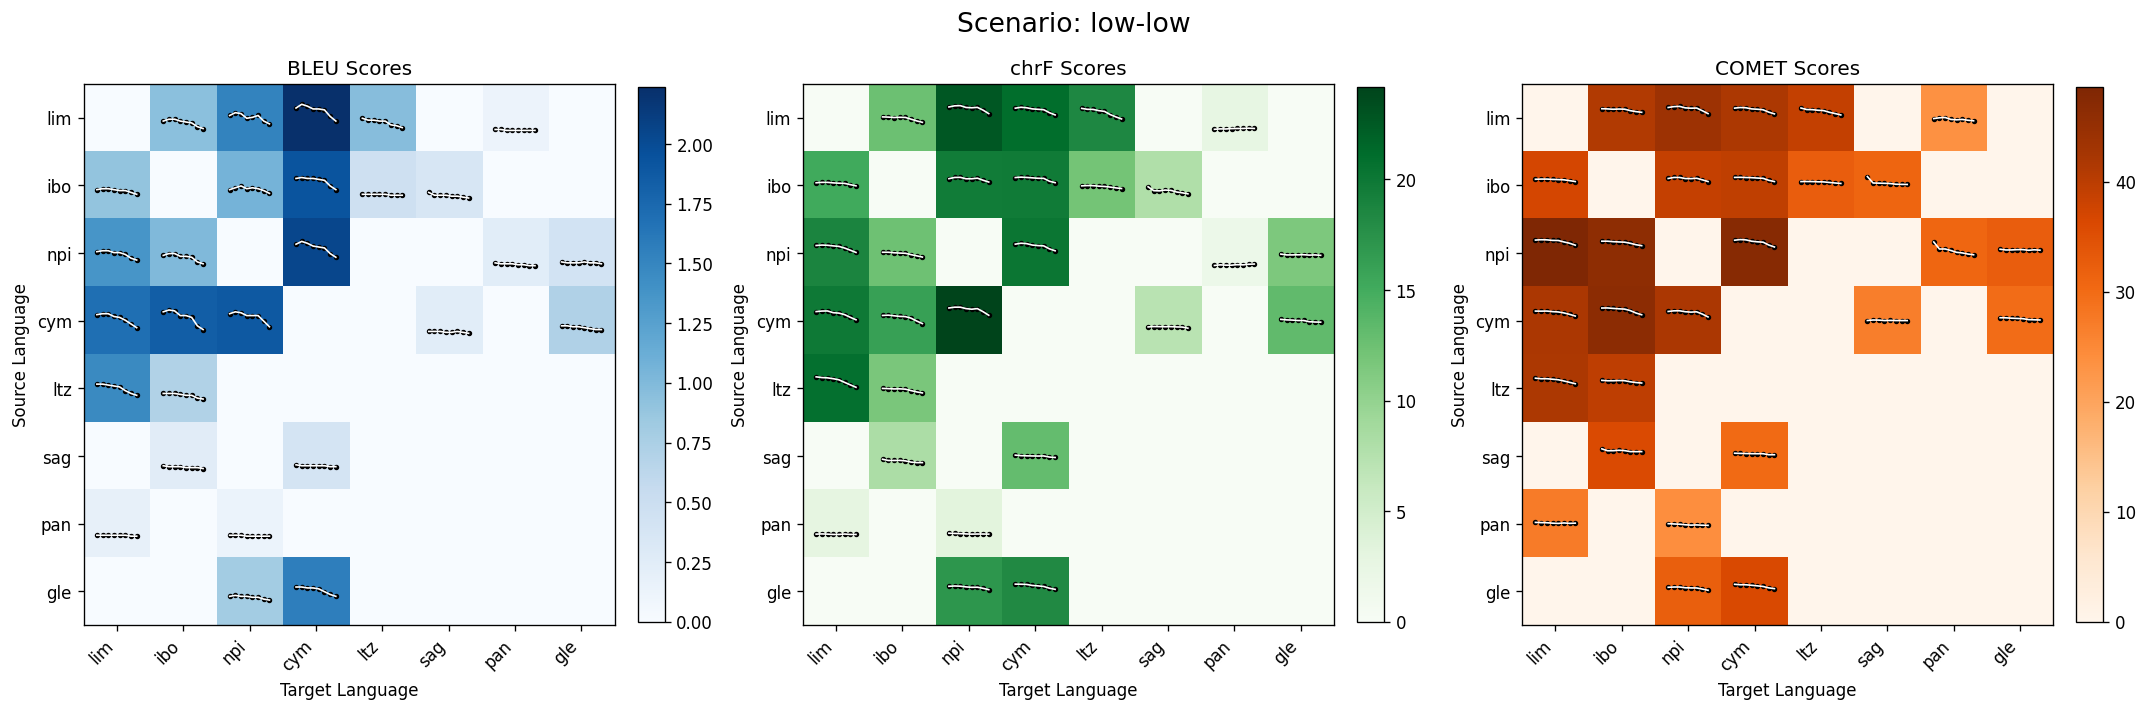

In [541]:
import matplotlib.pyplot as plt
import numpy as np

def plot_scenario_heatmaps(score_dicts, labels_dict, alpha_values, setting="Supervised"):
    """
    Generate plots for each scenario with subplots for different metrics.

    Each plot corresponds to one scenario and contains three subplots showing
    the heatmaps and line variations for BLEU, chrF, and COMET metrics.

    Parameters:
    - score_dicts: Dictionary containing scores for each scenario.
    - labels_dict: Dictionary containing labels for each scenario.
    - alpha_values: List of alpha values (used for line chart x-axis).
    - setting: Either "Supervised" or "Zero-shot" to differentiate plots.
    """
    # Custom order for each scenario
    scenario_order = {
        "high-high": ["nld", "fra", "jpn", "tgl", "deu", "ces", "zho", "rus"],
        "high-low": ["nld", "fra", "jpn", "tgl", "lim", "ibo", "npi", "cym"],
        "low-low": ["lim", "ibo", "npi", "cym", "ltz", "sag", "pan", "gle"]
    }

    # Define heatmap colors for each metric
    heatmap_colors = {
        "BLEU": "Blues",
        "chrF": "Greens",
        "COMET": "Oranges"
    }

    metrics = ["BLEU", "chrF", "COMET"]

    for scenario, order in scenario_order.items():
        fig, axes = plt.subplots(1, len(metrics), figsize=(18, 6), dpi=120)
        labels = labels_dict[scenario]
        
        for metric_idx, metric in enumerate(metrics):
            ax = axes[metric_idx]
            scores = np.array(score_dicts[scenario][metric])  # [alphas x labels]

            # Initialize the heatmap grid
            heatmap_values = np.zeros((len(order), len(order)))

            # Map labels to grid positions based on the predefined order
            for pair_index, pair in enumerate(labels):
                source, target = pair.split('-')
                row = order.index(source)
                col = order.index(target)
                heatmap_values[row, col] = np.mean(scores[:, pair_index])  # Average for heatmap intensity

            # Plot the heatmap
            cmap = heatmap_colors[metric]
            im = ax.imshow(heatmap_values, cmap=cmap, aspect="auto")

            # Add mini line plots in cells
            for row, source in enumerate(order):
                for col, target in enumerate(order):
                    pair = f"{source}-{target}"
                    if pair in labels:
                        pair_index = labels.index(pair)
                        cell_scores = scores[:, pair_index]

                        # Normalize the line graph's y-axis to fit within the cell
                        normalized_scores = cell_scores / max(scores.flatten())
                        line_x = np.linspace(col - 0.3, col + 0.3, len(alpha_values))  # Scaled x positions for the line
                        line_y = row + 0.2 - 0.4 * normalized_scores  # Flip the y-axis orientation

                        # Plot the line
                        ax.plot(line_x, line_y, color='white', linewidth=1)
                        ax.scatter(line_x, line_y, color='black', s=5)  # Add points for clarity

            # Configure the axes
            ax.set_xticks(range(len(order)))
            ax.set_xticklabels(order, rotation=45, ha="right")
            ax.set_yticks(range(len(order)))
            ax.set_yticklabels(order)
            ax.set_title(f"{metric} Scores")
            ax.set_xlabel("Target Language")
            ax.set_ylabel("Source Language")

            # Add colorbar
            fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

        plt.suptitle(f"Scenario: {scenario}", fontsize=16)
        plt.tight_layout()
        plt.show()


# Example Usage
plot_scenario_heatmaps(
    score_dicts=score_dicts_both,
    labels_dict=labels_dict_both,
    alpha_values=alpha_values,
    setting="Supervised"
)


In [378]:
def plot_comparison_of_similar_vs_dissimilar(score_dict, labels, scenario, alphas=[0,0.01,0.025,0.05,0.1,0.25,0.5,1]):
    """
    Creates 3 subplots comparing the scores of similar pairs vs dissimilar pairs per alpha for BLEU, chrF, and COMET.

    Parameters:
    - score_dict: A dictionary with keys 'BLEU', 'chrF', 'COMET', and values are 2D arrays [alphas x labels].
    - labels: A list of translation directions.
    - alphas: A list of alpha values.
    """
    # Define similar pairs
    if scenario == 'Low-Low':
        similar_pairs = ["lim-ltz", "ltz-lim", "ibo-sag", "sag-ibo", "npi-pan", "pan-npi", "cym-gle", "gle-cym"]
        dissimilar_pairs = list(set(labels) - set(similar_pairs))
    elif scenario == 'High-High':
        similar_pairs = ["nld-deu", "deu-nld", "fra-ces", "ces-fra", "jpn-zho", "zho-jpn", "tgl-rus", "rus-tgl"]
        dissimilar_pairs = list(set(labels) - set(similar_pairs))
    else:
        print("WARNING: high-low does not have similar and dissimilar pairs!")
        similar_pairs = labels
        dissimilar_pairs = []

    metrics = ['BLEU', 'chrF', 'COMET']
    
    # Create subplots for each metric
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))

    bar_width = 0.35  # Set bar width for better visualization
    bar_positions = np.arange(len(alphas))  # Positions for each alpha value

    # Loop over metrics to create the plots
    for i, metric in enumerate(metrics):
        scores = np.array(score_dict[metric])  # [alphas x labels]
        
        # Find indices of similar and dissimilar pairs
        similar_indices = [labels.index(label) for label in similar_pairs]
        dissimilar_indices = [labels.index(label) for label in dissimilar_pairs]

        # For each alpha value, calculate the average for similar and dissimilar pairs
        avg_similar_scores = []
        avg_dissimilar_scores = []

        for alpha_index in range(len(alphas)):
            avg_similar = np.mean(scores[alpha_index, similar_indices])
            avg_dissimilar = np.mean(scores[alpha_index, dissimilar_indices])

            avg_similar_scores.append(avg_similar)
            avg_dissimilar_scores.append(avg_dissimilar)

        # Create bars for similar and dissimilar pairs
        ax[i].bar(bar_positions - bar_width/2, avg_similar_scores, width=bar_width, label='Similar Pairs', color='skyblue')
        ax[i].bar(bar_positions + bar_width/2, avg_dissimilar_scores, width=bar_width, label='Dissimilar Pairs', color='salmon')

        # Set labels, title, and customization
        ax[i].set_ylabel('Average Score')
        ax[i].set_title(f'{metric} Scores')
        ax[i].set_xticks(bar_positions)  # Positions for the x-axis ticks
        ax[i].set_xticklabels([alpha for alpha in alphas])  # Labels for the x-axis based on alpha values
        ax[i].set_xlabel('α')
        ax[i].legend()

    plt.suptitle(f'Scores per Similarity for {scenario} Zero-Shot (by Alpha)')
    plt.tight_layout()
    plt.show()


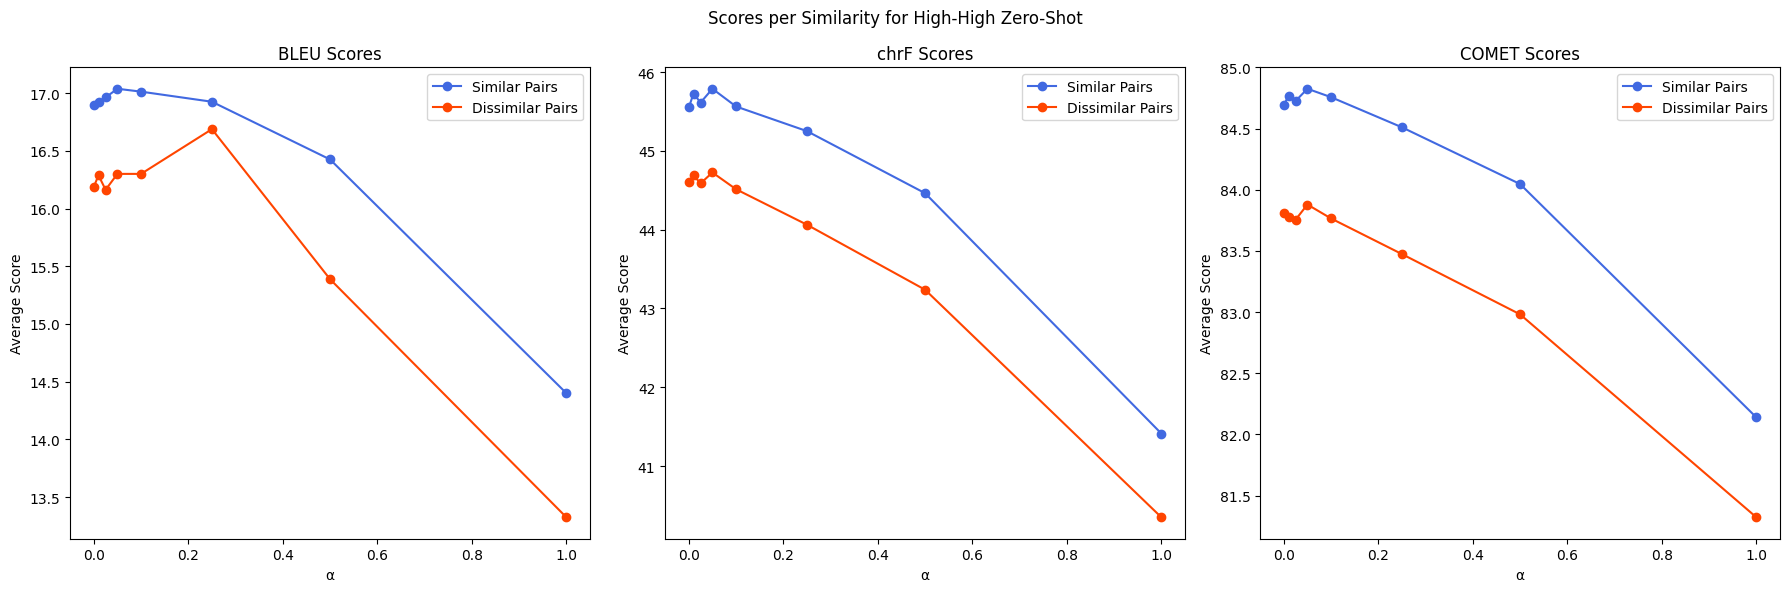

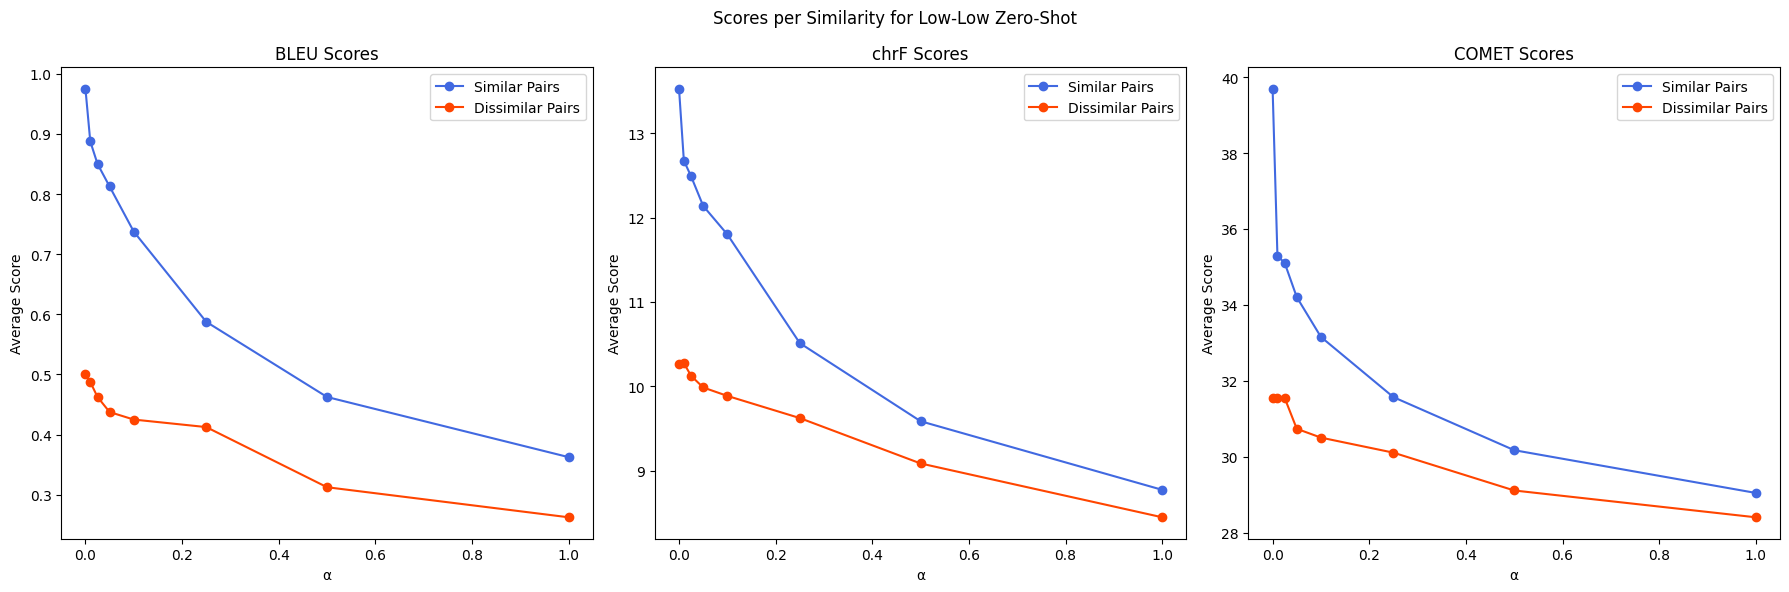

In [380]:
plot_comparison_of_similar_vs_dissimilar(HH_zs, HH_zs_labels, scenario='High-High')
plot_comparison_of_similar_vs_dissimilar(LL_zs, LL_zs_labels, scenario='Low-Low')

In [379]:
def plot_comparison_of_similar_vs_dissimilar(score_dict, labels, scenario, alphas=[0,0.01,0.025,0.05,0.1,0.25,0.5,1]):
    """
    Creates 3 subplots comparing the scores of similar pairs vs dissimilar pairs per alpha for BLEU, chrF, and COMET.

    Parameters:
    - score_dict: A dictionary with keys 'BLEU', 'chrF', 'COMET', and values are 2D arrays [alphas x labels].
    - labels: A list of translation directions.
    - scenario: Scenario for comparison (e.g., 'Low-Low', 'High-High').
    - alphas: A list of alpha values.
    """
    import matplotlib.pyplot as plt
    import numpy as np

    # Define similar pairs
    if scenario == 'Low-Low':
        similar_pairs = ["lim-ltz", "ltz-lim", "ibo-sag", "sag-ibo", "npi-pan", "pan-npi", "cym-gle", "gle-cym"]
        dissimilar_pairs = list(set(labels) - set(similar_pairs))
    elif scenario == 'High-High':
        similar_pairs = ["nld-deu", "deu-nld", "fra-ces", "ces-fra", "jpn-zho", "zho-jpn", "tgl-rus", "rus-tgl"]
        dissimilar_pairs = list(set(labels) - set(similar_pairs))
    else:
        print("WARNING: high-low does not have similar and dissimilar pairs!")
        similar_pairs = labels
        dissimilar_pairs = []

    metrics = ['BLEU', 'chrF', 'COMET']
    
    # Create subplots for each metric
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))

    # Loop over metrics to create the plots
    for i, metric in enumerate(metrics):
        scores = np.array(score_dict[metric])  # [alphas x labels]
        
        # Find indices of similar and dissimilar pairs
        similar_indices = [labels.index(label) for label in similar_pairs]
        dissimilar_indices = [labels.index(label) for label in dissimilar_pairs]

        # For each alpha value, calculate the average for similar and dissimilar pairs
        avg_similar_scores = []
        avg_dissimilar_scores = []

        for alpha_index in range(len(alphas)):
            avg_similar = np.mean(scores[alpha_index, similar_indices])
            avg_dissimilar = np.mean(scores[alpha_index, dissimilar_indices])

            avg_similar_scores.append(avg_similar)
            avg_dissimilar_scores.append(avg_dissimilar)

        # Create line plots for similar and dissimilar pairs
        ax[i].plot(alphas, avg_similar_scores, marker='o', label='Similar Pairs', color='royalblue')
        ax[i].plot(alphas, avg_dissimilar_scores, marker='o', label='Dissimilar Pairs', color='orangered')

        # Set labels, title, and customization
        ax[i].set_ylabel('Average Score')
        ax[i].set_title(f'{metric} Scores')
#         ax[i].set_xticks(alphas)  # Set x-axis ticks based on alphas
        ax[i].set_xlabel('α')
        ax[i].legend()

    plt.suptitle(f'Scores per Similarity for {scenario} Zero-Shot')
    plt.tight_layout()
    plt.show()


In [11]:
# Change the metric scores to have them all in the same graph.
# See how that influences the shape. Should be fine methinks.

In [12]:
# TODO:
# Eval results per word order

# difference between low-resource src language and high-resource src language for HL

# Per language pair, if the score increases with or more than X, show those pairs and the scenarios

# Metric scores per language! Would validate whether more data in the model also causes higher scores or not

In [242]:
# Strat eval results

strats = ['t-enc', 't-dec', 's-enc-t-enc', 's-enc-t-dec', 'gpt-mt']

def compute_strat_scores(scenario, svozs, evalpath='/Users/Suzenator/Documents/Uni/M4/MThesis/output/eval/'):
    
    score_dict = {'BLEU': [], 'chrF': [], 'COMET': []}
    
    for s in strats:
        filename = f'eval_{scenario}_{svozs}_01_{s}'
        
        with open(evalpath + filename + '.txt', 'r') as f:
            file_content = f.read()

        # Parse the file content
        per_line = file_content.strip().split('\n')[1:]
        scores = {x.split(' ')[0]: x.split(' ')[1].split('/') for x in per_line}

        # Extract and convert scores
        labels = list(scores.keys())
        scores_array = np.array(list(scores.values()))
        bleu = np.array([float(x) for x in scores_array[:, 0]])
        chrf = np.array([float(x) for x in scores_array[:, 1]])
        comet = np.array([float(x) for x in scores_array[:, 2]])

        # Append scores for the current alpha
        score_dict['BLEU'].append(bleu)
        score_dict['chrF'].append(chrf)
        score_dict['COMET'].append(comet)

    return score_dict, labels

In [80]:
strat_sv_HH, strat_sv_HH_labels = compute_strat_scores("high_high", "supervised")
strat_zs_HH, strat_zs_HH_labels = compute_strat_scores("high_high", "zeroshot")
strat_sv_HL, strat_sv_HL_labels = compute_strat_scores("high_low", "supervised")
strat_zs_HL, strat_zs_HL_labels = compute_strat_scores("high_low", "zeroshot")
strat_sv_LL, strat_sv_LL_labels = compute_strat_scores("low_low", "supervised")
strat_zs_LL, strat_zs_LL_labels = compute_strat_scores("low_low", "zeroshot")

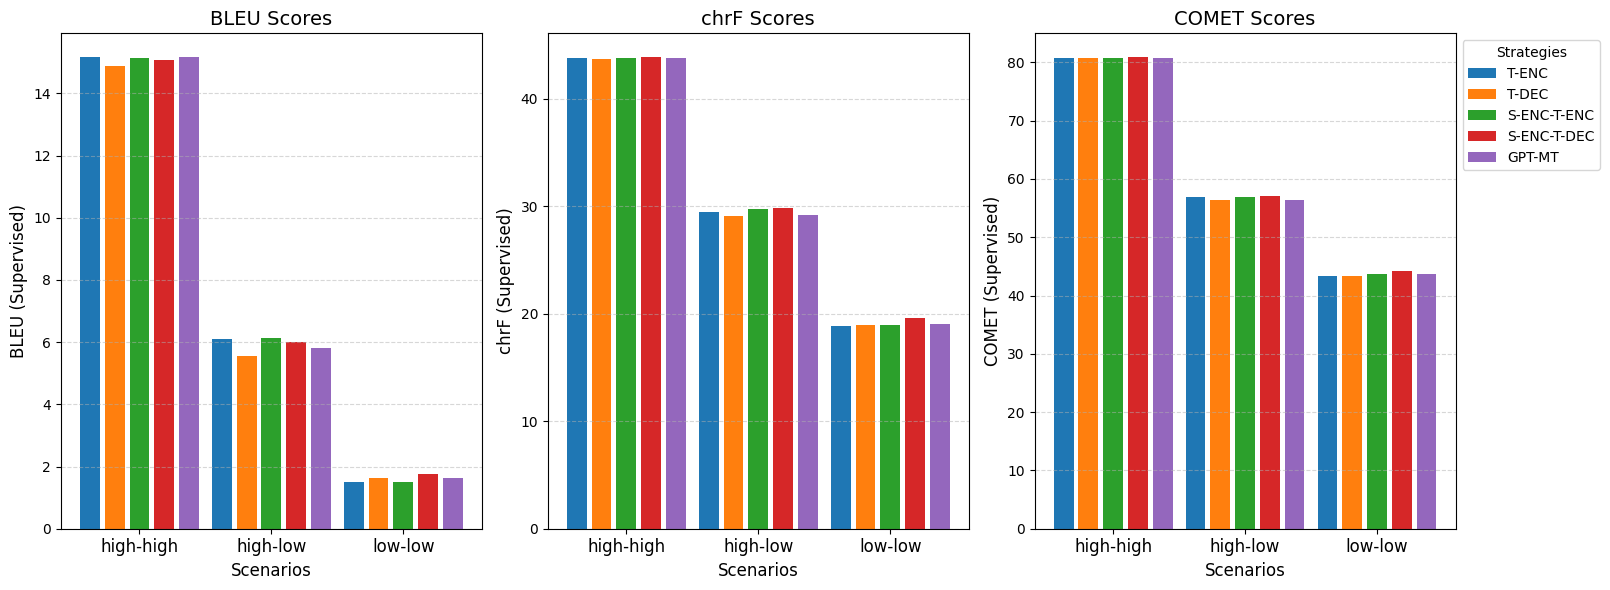

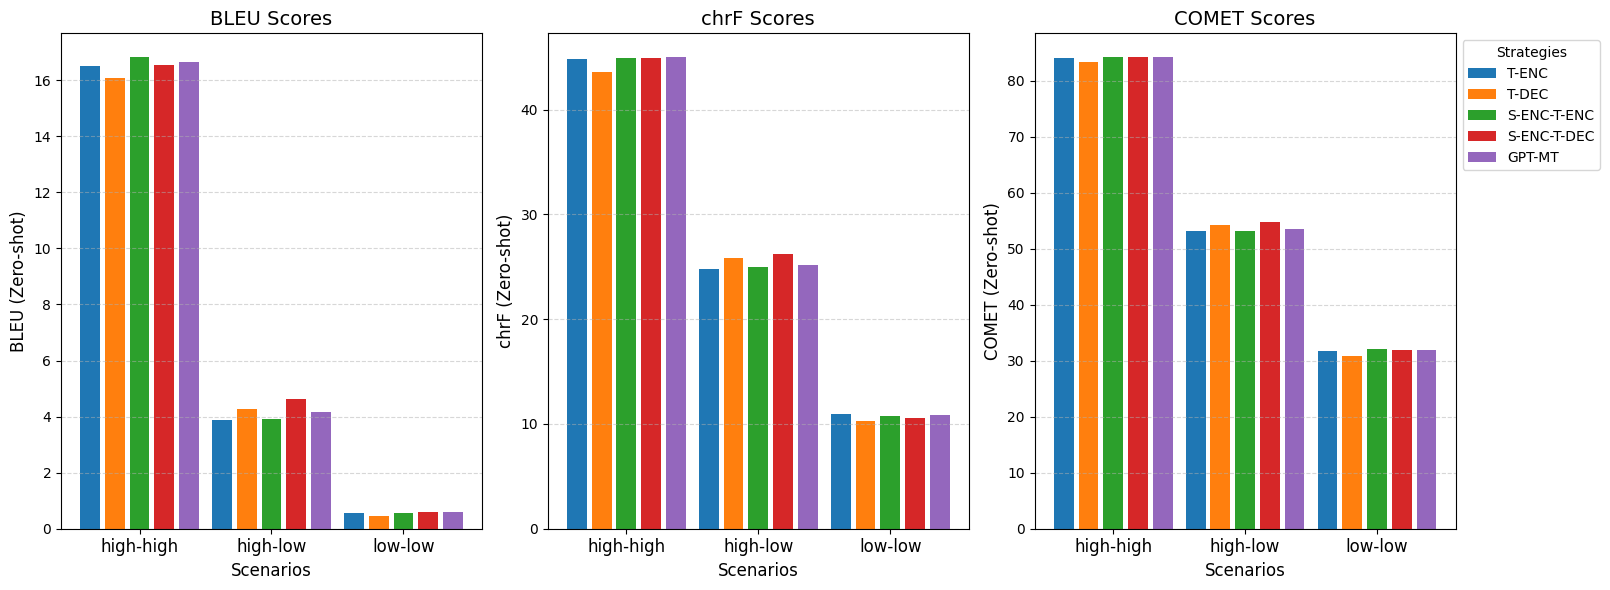

In [90]:
import matplotlib.pyplot as plt
import numpy as np

def plot_strategy_scores(score_dicts, scenarios, strategies, svozs):
    """
    Function to plot scores for different strategies across multiple scenarios in bar plots.
    
    Args:
        score_dicts (dict): Dictionary with scenarios as keys and score data for metrics as values.
        scenarios (list): List of scenario names (e.g., "high-high", "high-low", "low-low").
        strategies (list): List of strategy names (e.g., 't-enc', 't-dec', 's-enc-t-enc', 's-enc-t-dec', 'gpt-mt').
        svozs (str): Label to indicate supervised or zero-shot scoring.
    """
    metrics = ['BLEU', 'chrF', 'COMET']
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    for i, metric in enumerate(metrics):
        ax = axes[i]
        x = np.arange(len(scenarios))  # Bar positions for scenarios
        
        width = 0.15  # Width of each bar
        offsets = np.linspace(-width * len(strategies) / 2, width * len(strategies) / 2, len(strategies))
        
        for j, strategy in enumerate(strategies):
            values = [np.mean(score_dicts[scenario][metric][j]) for scenario in scenarios]
            ax.bar(x + offsets[j], values, width, label=strategy)  # No explicit color, uses default cycle
        
        ax.set_title(f'{metric} Scores', fontsize=14)
        ax.set_xticks(x)
        ax.set_xticklabels(scenarios, fontsize=12)
        ax.set_xlabel('Scenarios', fontsize=12)
        ax.set_ylabel(f'{metric} ({svozs})', fontsize=12)
        ax.grid(axis='y', linestyle='--', alpha=0.5)
    
    # Add legend to the last subplot
    axes[-1].legend(title='Strategies', loc='upper left', bbox_to_anchor=(1, 1))
    
    fig.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make space for legend
    plt.show()



    
# Prepare data
strat_sv_HH, strat_sv_HH_labels = compute_strat_scores("high_high", "supervised")
strat_zs_HH, strat_zs_HH_labels = compute_strat_scores("high_high", "zeroshot")
strat_sv_HL, strat_sv_HL_labels = compute_strat_scores("high_low", "supervised")
strat_zs_HL, strat_zs_HL_labels = compute_strat_scores("high_low", "zeroshot")
strat_sv_LL, strat_sv_LL_labels = compute_strat_scores("low_low", "supervised")
strat_zs_LL, strat_zs_LL_labels = compute_strat_scores("low_low", "zeroshot")

# Combine all data in a dictionary for plotting
score_dicts = {
    "high-high": strat_sv_HH,
    "high-low": strat_sv_HL,
    "low-low": strat_sv_LL
}

score_dicts_zs = {
    "high-high": strat_zs_HH,
    "high-low": strat_zs_HL,
    "low-low": strat_zs_LL
}

strategies = ['T-ENC', 'T-DEC', 'S-ENC-T-ENC', 'S-ENC-T-DEC', 'GPT-MT']
scenarios = ["high-high", "high-low", "low-low"]

# Plot supervised scores
plot_strategy_scores(score_dicts, scenarios, strategies, svozs="Supervised")

# Plot zero-shot scores
plot_strategy_scores(score_dicts_zs, scenarios, strategies, svozs="Zero-shot")

In [ ]:
# difference between low-resource src language and high-resource src language for HL

# Per language pair, if the score increases with or more than X, show those pairs and the scenarios

# Metric scores per language! Would validate whether more data in the model also causes higher scores or not

In [102]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def plot_language_details(score_dict, labels, scenario, svozs):
    """
    Creates bar plots for BLEU, chrF, and COMET scores:
      1. Average scores for each language.
      2. For 'high-low', differences between source and target averages.
      
    Parameters:
    - score_dict: A dictionary with keys 'BLEU', 'chrF', 'COMET', and values are 2D arrays [alphas x labels].
    - labels: A list of translation directions (e.g., ['X-Y', 'Y-Z']).
    - scenario: Scenario name (e.g., 'high-low').
    - svozs: A string indicating 'supervised' or 'zero-shot'.
    """
    metrics = ['BLEU', 'chrF', 'COMET']
    languages = set(lang for pair in labels for lang in pair.split('-'))  # Extract unique languages
    languages = sorted(languages)  # Ensure consistent order
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    colors = ['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD', '#8C564B', '#E377C2']
    
    for i, metric in enumerate(metrics):
        ax = axes[i]
        
        # Extract scores and convert to NumPy array
        scores = np.array(score_dict[metric])  # [alphas x labels]
        avg_scores = np.mean(scores, axis=0)  # Average over alphas
        
        # Calculate language-wise averages
        lang_scores = {lang: [] for lang in languages}
        for j, pair in enumerate(labels):
            src, tgt = pair.split('-')
            lang_scores[src].append(avg_scores[j])  # As source
            lang_scores[tgt].append(avg_scores[j])  # As target
        
        # Compute averages and (for 'high-low') source-target differences
        lang_averages = {lang: np.mean(scores) for lang, scores in lang_scores.items()}
        src_tgt_diff = {lang: 0 for lang in languages}
        if scenario == 'high-low':
            for lang in languages:
                src_scores = [avg_scores[j] for j, pair in enumerate(labels) if pair.startswith(f"{lang}-")]
                tgt_scores = [avg_scores[j] for j, pair in enumerate(labels) if pair.endswith(f"-{lang}")]
                src_tgt_diff[lang] = np.mean(src_scores) - np.mean(tgt_scores)
        
        # Plot language averages
        x = np.arange(len(languages))
        bar_colors = [colors[j % len(colors)] for j in range(len(languages))]
        ax.bar(x, [lang_averages[lang] for lang in languages], color=bar_colors, alpha=0.85, label='Avg Score')
        

        # Customize plot
        ax.set_xticks(x)
        ax.set_xticklabels(languages, rotation=45, ha='right')
        ax.set_title(f'{metric} Scores', fontsize=14)
        ax.set_ylabel(f'{metric} ({svozs})', fontsize=12)
        ax.grid(axis='y', linestyle='--', alpha=0.7)

    plt.suptitle(f'Language-Wise Scores ({scenario})', fontsize=16)
    plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout
    plt.show()


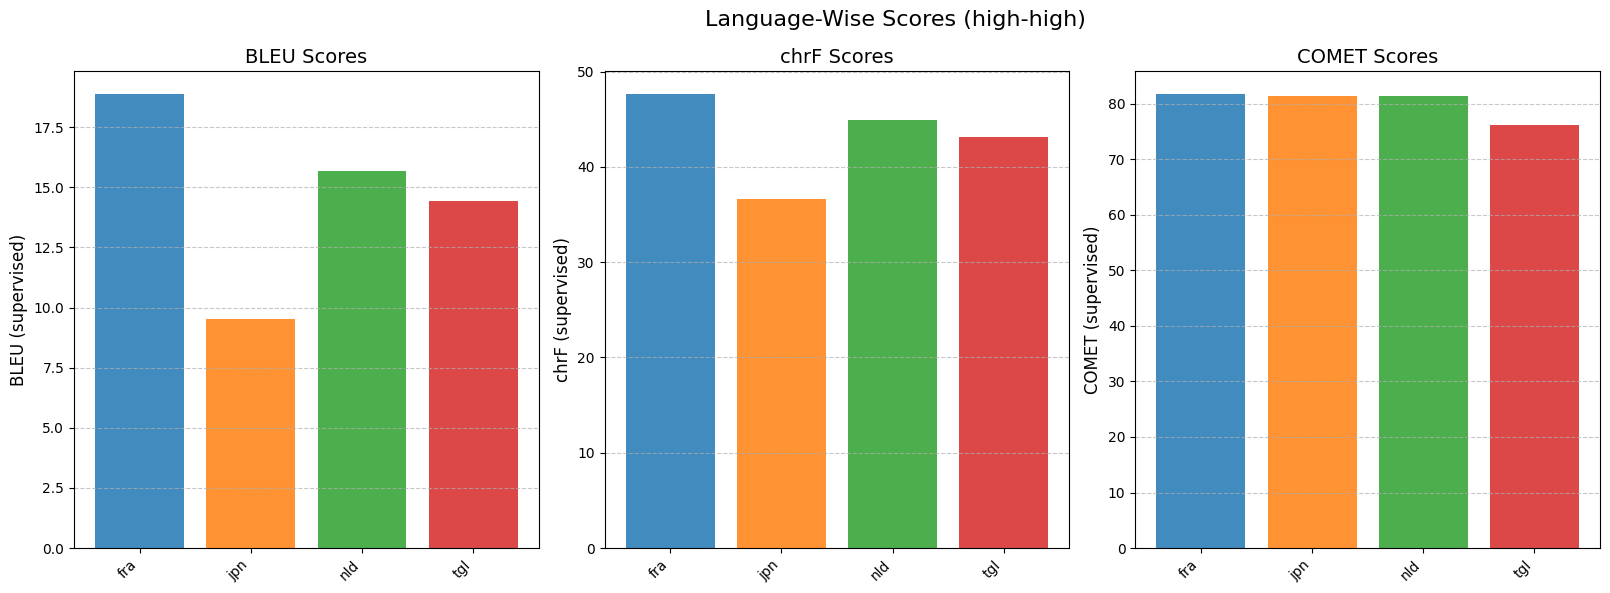

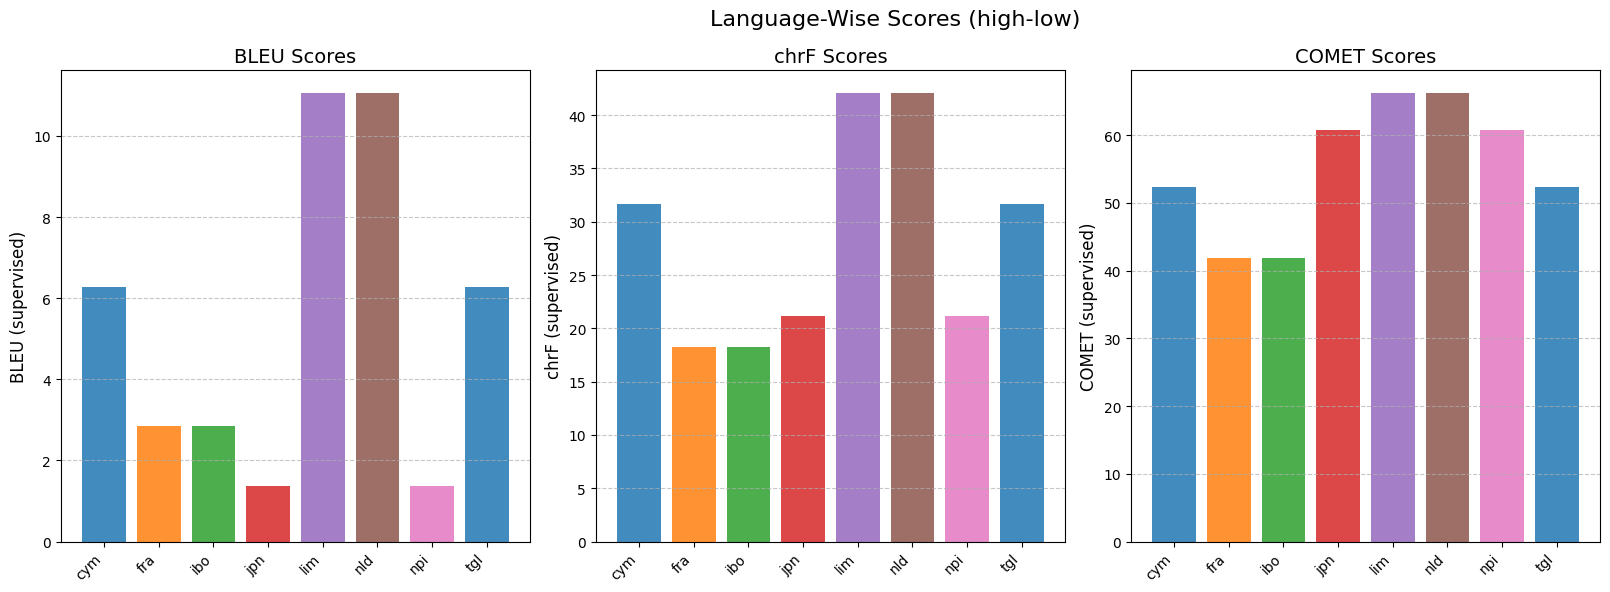

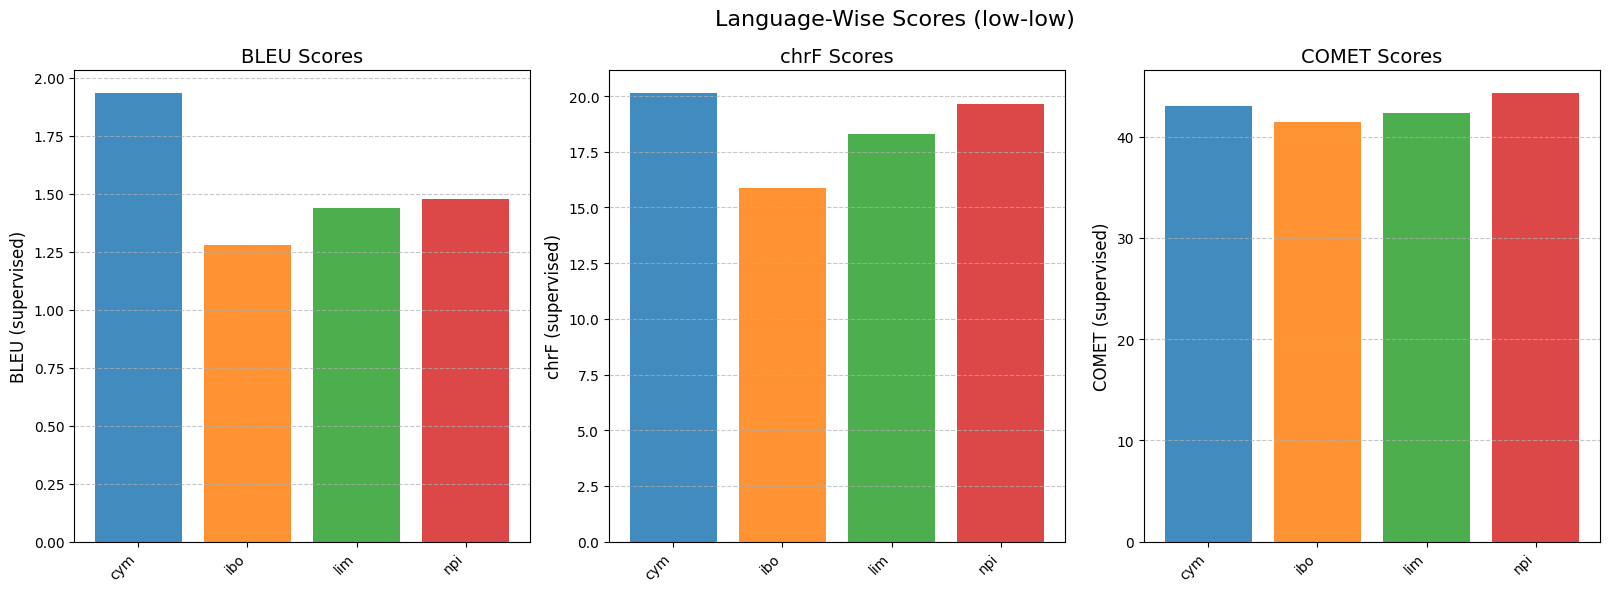

In [103]:
plot_language_details(HH_sv, HH_sv_labels, scenario='high-high', svozs='supervised')
plot_language_details(HL_sv, HL_sv_labels, scenario='high-low', svozs='supervised')
plot_language_details(LL_sv, LL_sv_labels, scenario='low-low', svozs='supervised')

In [152]:
def plot_language_averages(score_dicts, labels_dict, svozs):
    """
    Creates a single bar plot for average BLEU, chrF, and COMET scores for all languages,
    aggregated across all scenarios, with distinct colors for languages and hatches for metrics.

    Parameters:
    - score_dicts: A dictionary with scenario keys (e.g., 'high-high') and score dictionaries as values.
    - labels_dict: A dictionary with scenario keys and corresponding lists of translation directions as values.
    - svozs: A string indicating 'supervised' or 'zero-shot'.
    """
    import matplotlib.patches as mpatches
    metrics = ['BLEU', 'chrF', 'COMET']
    all_languages = sorted(set(lang for labels in labels_dict.values() for pair in labels for lang in pair.split('-')))

    # Color palette for languages
    language_colors = plt.get_cmap("tab20").colors[:len(all_languages)]

    # Hatch patterns for metrics
    hatch_patterns = {'BLEU': '', 'chrF': '...', 'COMET': '---'}

    # Initialize language scores
    lang_scores = {metric: {lang: [] for lang in all_languages} for metric in metrics}

    # Aggregate scores across scenarios
    for scenario, scores in score_dicts.items():
        labels = labels_dict[scenario]
        avg_scores = {metric: np.mean(np.array(scores[metric]), axis=0) for metric in metrics}

        for metric in metrics:
            for j, pair in enumerate(labels):
                src, tgt = pair.split('-')
                lang_scores[metric][src].append(avg_scores[metric][j])  # As source
                lang_scores[metric][tgt].append(avg_scores[metric][j])  # As target

    # Compute overall average per language
    lang_averages = {metric: {lang: np.mean(scores) for lang, scores in lang_scores[metric].items()} for metric in metrics}

    # Plotting
    fig, ax = plt.subplots(1, 1, figsize=(14, 8))
    x = np.arange(len(all_languages))  # X positions for languages
    width = 0.25  # Width of bars for grouped metrics

    # Plot bars for each metric
    for i, metric in enumerate(metrics):
        for j, lang in enumerate(all_languages):
            ax.bar(
                x[j] + (i - 1) * width,  # Offset bars for each metric
                lang_averages[metric][lang],
                width,
                color=language_colors[j],
                alpha=0.85,
                hatch=hatch_patterns[metric],
                edgecolor='black'
            )

    # Customize plot
    ax.set_xticks(x)
    ax.set_xticklabels(all_languages, rotation=45, ha='right', fontsize=10)
    ax.set_title(f'Average Language-Wise Scores Across Scenarios ({svozs})', fontsize=16)
    ax.set_ylabel('Score', fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Create legends
    metric_legend_patches = [
        mpatches.Patch(facecolor='white', edgecolor='black', hatch=hatch_patterns[metric], label=metric) for metric in metrics
    ]
    language_legend_patches = [
        mpatches.Patch(color=language_colors[i], label=lang) for i, lang in enumerate(all_languages)
    ]

    # Metric legend (above plot)
    ax.legend(handles=metric_legend_patches, title='Metrics', loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3)

    plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to fit legends
    plt.show()


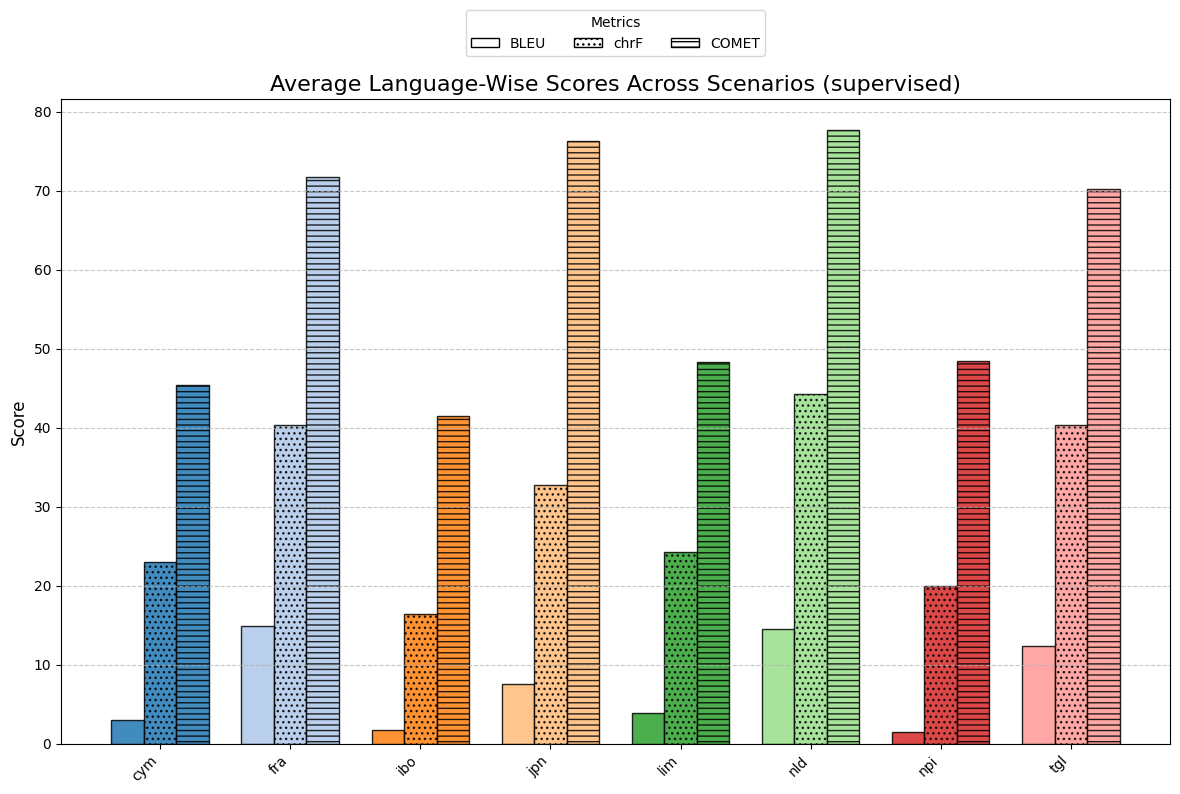

In [153]:
score_dicts = {
    'high-high': HH_sv,
    'high-low': HL_sv,
    'low-low': LL_sv
}
labels_dict = {
    'high-high': HH_sv_labels,
    'high-low': HL_sv_labels,
    'low-low': LL_sv_labels
}
plot_language_averages(score_dicts, labels_dict, svozs='supervised')

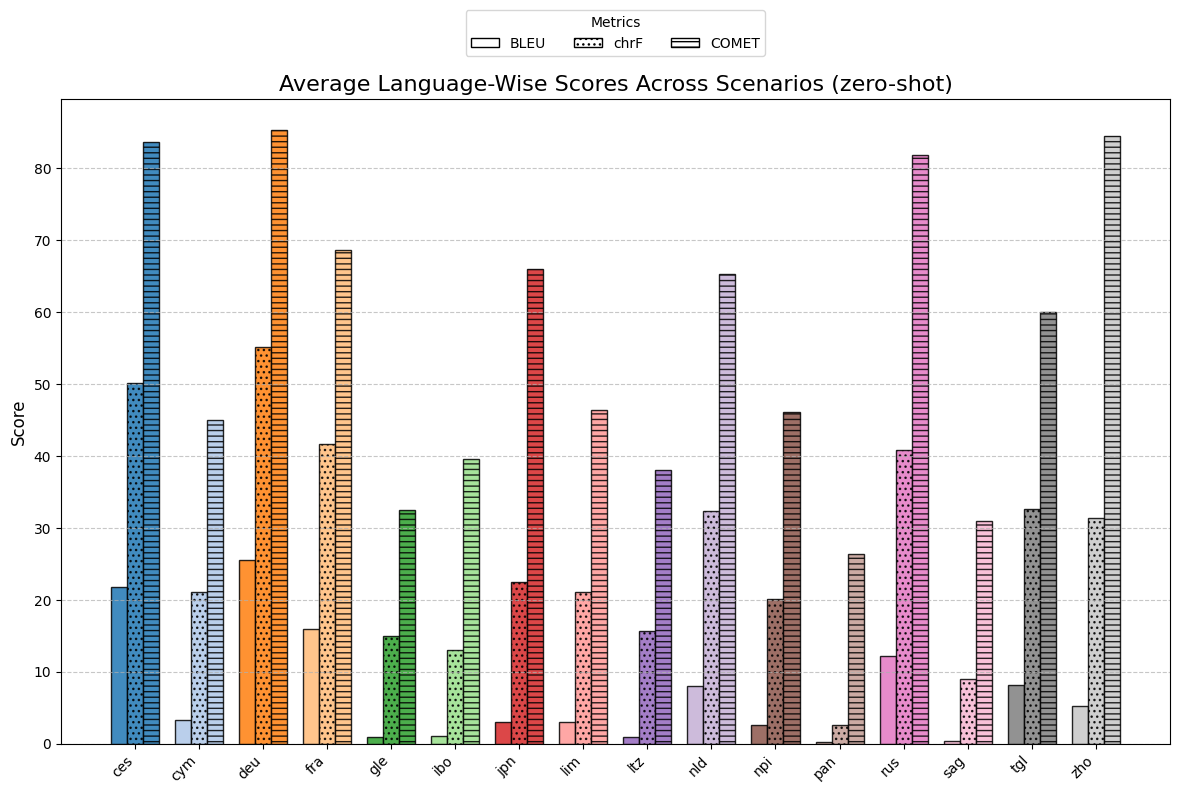

In [154]:
score_dicts = {
    'high-high': HH_zs,
    'high-low': HL_zs,
    'low-low': LL_zs
}
labels_dict = {
    'high-high': HH_zs_labels,
    'high-low': HL_zs_labels,
    'low-low': LL_zs_labels
}
plot_language_averages(score_dicts, labels_dict, svozs='zero-shot')

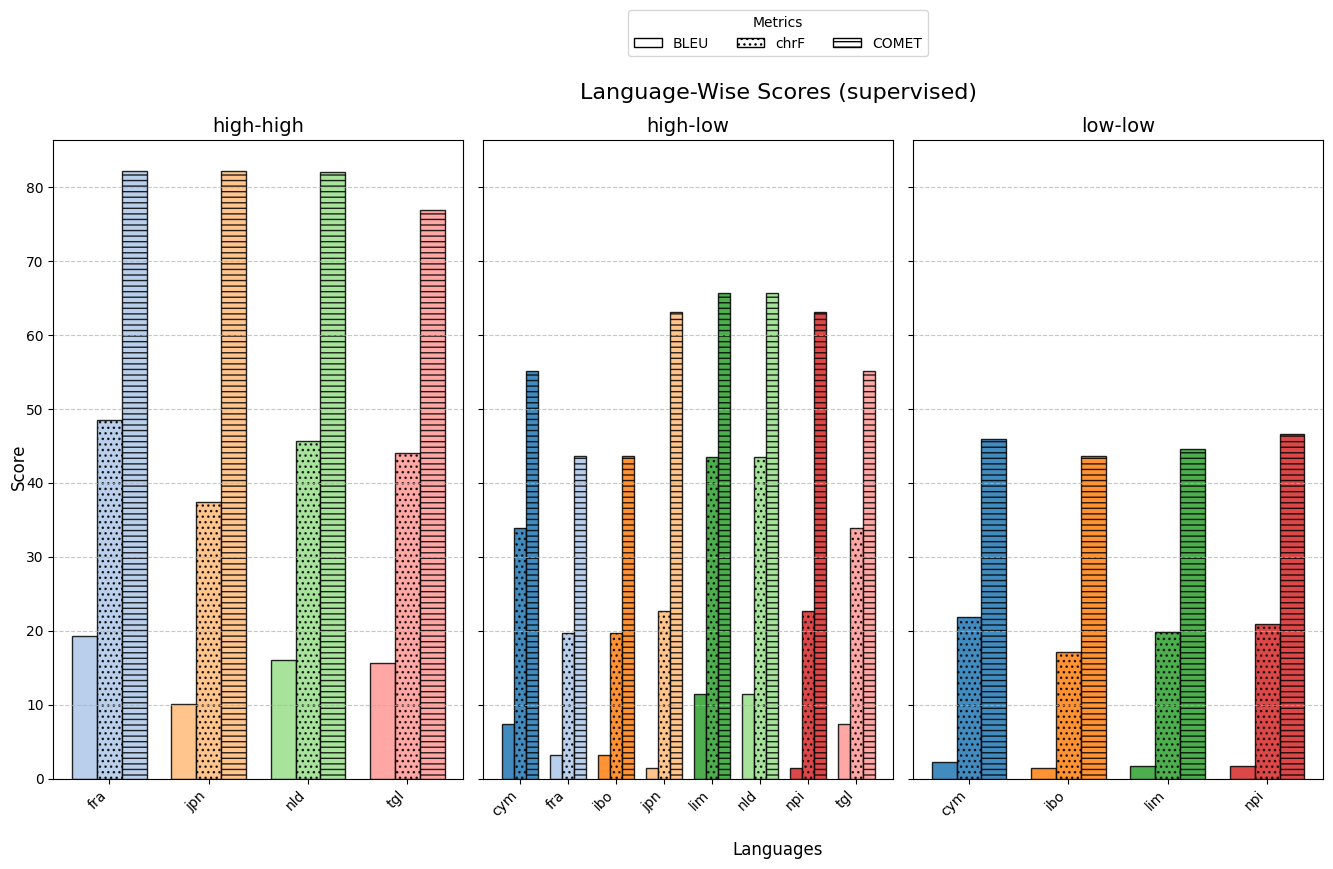

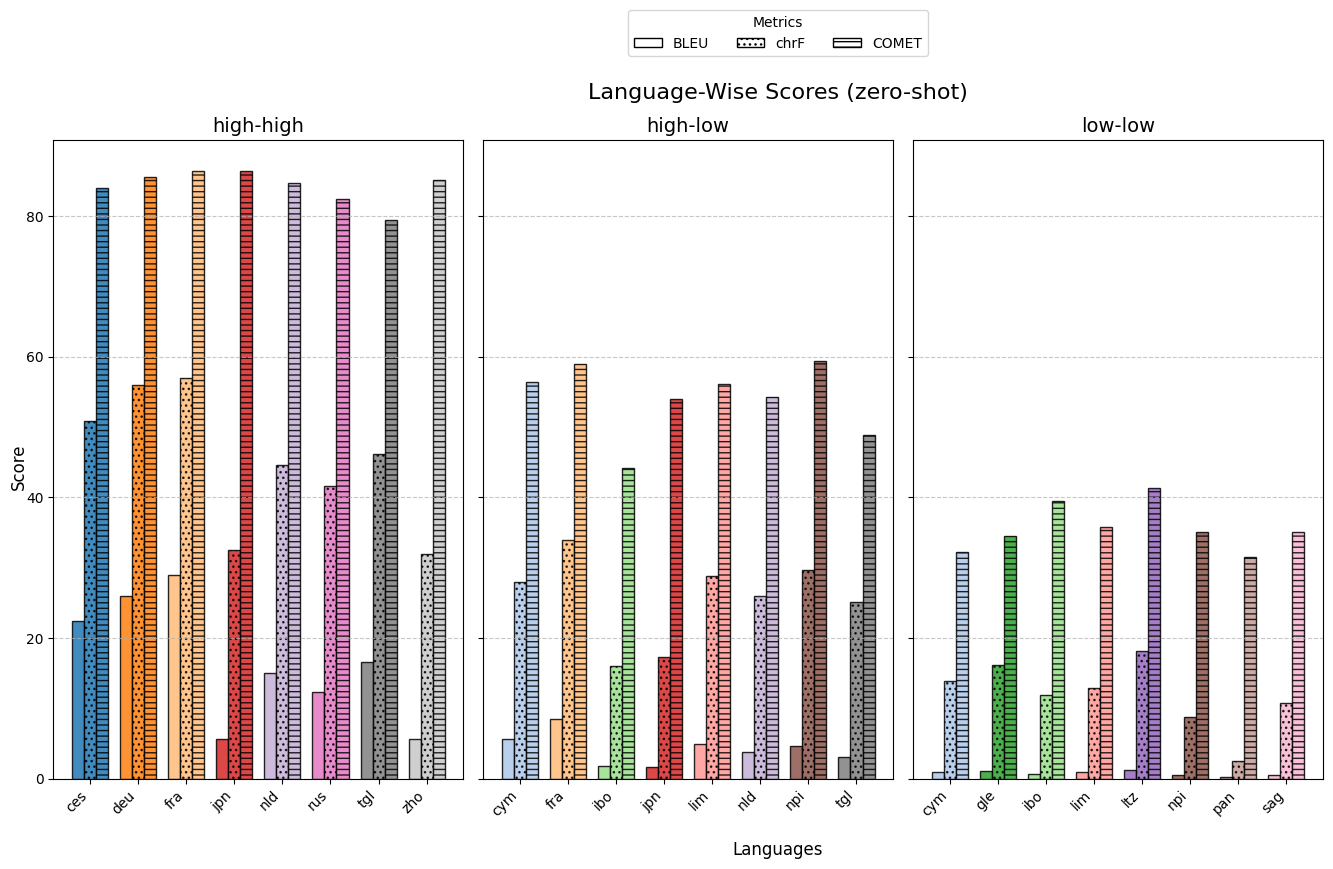

In [605]:
def plot_language_averages_by_scenario(score_dicts, labels_dict, svozs):
    """
    Creates bar plots for average BLEU, chrF, and COMET scores for all languages,
    split by scenarios, with distinct colors for languages and hatches for metrics.

    Parameters:
    - score_dicts: A dictionary with scenario keys (e.g., 'high-high') and score dictionaries as values.
    - labels_dict: A dictionary with scenario keys and corresponding lists of translation directions as values.
    - svozs: A string indicating 'supervised' or 'zero-shot'.
    """
    import matplotlib.patches as mpatches
    import numpy as np
    import matplotlib.pyplot as plt

    metrics = ['BLEU', 'chrF', 'COMET']
    scenarios = list(score_dicts.keys())

    # Create a consistent color mapping for all languages
    all_languages = sorted(set(lang for labels in labels_dict.values() for pair in labels for lang in pair.split('-')))
    language_colors = plt.get_cmap("tab20").colors
    if len(language_colors) < len(all_languages):
        # Extend the color map by repeating the colors if needed
        language_colors = (language_colors * (len(all_languages) // len(language_colors) + 1))[:len(all_languages)]
    color_mapping = {lang: language_colors[i] for i, lang in enumerate(all_languages)}

    # Hatch patterns for metrics
    hatch_patterns = {'BLEU': '', 'chrF': '...', 'COMET': '---'}

    # Initialize plot
    fig, axes = plt.subplots(1, len(scenarios), figsize=(16, 8), sharey=True)
    if len(scenarios) == 1:  # If there's only one scenario, `axes` won't be a list
        axes = [axes]

    # Iterate through scenarios
    for ax, scenario in zip(axes, scenarios):
        labels = labels_dict[scenario]
        scores = score_dicts[scenario]
        
        # Modify avg_scores to use only the first element for alpha=0
        avg_scores = {metric: scores[metric][0] for metric in metrics}

        # Extract the languages involved in the current scenario
        languages_in_scenario = sorted(set(lang for pair in labels for lang in pair.split('-')))

        # Calculate language scores for this scenario
        lang_scores = {metric: {lang: [] for lang in languages_in_scenario} for metric in metrics}
        for metric in metrics:
            for j, pair in enumerate(labels):
                src, tgt = pair.split('-')
                lang_scores[metric][src].append(avg_scores[metric][j])  # As source
                lang_scores[metric][tgt].append(avg_scores[metric][j])  # As target

        # Compute language averages for this scenario, using only alpha=0 (first score)
#         lang_averages = {metric: {lang: scores[0] for lang, scores in lang_scores[metric].items()} for metric in metrics}
        lang_averages = {metric: {lang: np.mean(scores) for lang, scores in lang_scores[metric].items()} for metric in metrics}

        # Plot bars for each metric
        x = np.arange(len(languages_in_scenario))  # X positions for languages
        width = 0.25  # Width of bars for grouped metrics
        for i, metric in enumerate(metrics):
            for j, lang in enumerate(languages_in_scenario):
                ax.bar(
                    x[j] + (i - 1) * width,  # Offset bars for each metric
                    lang_averages[metric][lang],
                    width,
                    color=color_mapping[lang],  # Use consistent color for each language
                    alpha=0.85,
                    hatch=hatch_patterns[metric],
                    edgecolor='black'
                )

        # Customize subplot
        ax.set_xticks(x)
        ax.set_xticklabels(languages_in_scenario, rotation=45, ha='right', fontsize=10)
        ax.set_title(f'{scenario}', fontsize=14)
        ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Add shared labels and title
    fig.suptitle(f'Language-Wise Scores ({svozs})', fontsize=16)
    fig.supxlabel('Languages', fontsize=12)
    fig.supylabel('Score', fontsize=12)

    # Create legends for metrics and languages
    metric_legend_patches = [
        mpatches.Patch(facecolor='white', edgecolor='black', hatch=hatch_patterns[metric], label=metric) for metric in metrics
    ]
    language_legend_patches = [
        mpatches.Patch(facecolor=color_mapping[lang], label=lang) for lang in all_languages
    ]

    # Metric legend (above plot)
    fig.legend(
        handles=metric_legend_patches,
        title='Metrics',
        loc='upper center',
        bbox_to_anchor=(0.5, 1.08),
        ncol=3
    )

    plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to fit legends
    plt.show()





score_dicts = {
    'high-high': HH_sv,
    'high-low': HL_sv,
    'low-low': LL_sv
}
labels_dict = {
    'high-high': HH_sv_labels,
    'high-low': HL_sv_labels,
    'low-low': LL_sv_labels
}
plot_language_averages_by_scenario(score_dicts, labels_dict, svozs='supervised')

score_dicts = {
    'high-high': HH_zs,
    'high-low': HL_zs,
    'low-low': LL_zs
}
labels_dict = {
    'high-high': HH_zs_labels,
    'high-low': HL_zs_labels,
    'low-low': LL_zs_labels
}
plot_language_averages_by_scenario(score_dicts, labels_dict, svozs='zero-shot')

In [178]:
# difference between low-resource src language and high-resource src language for HL



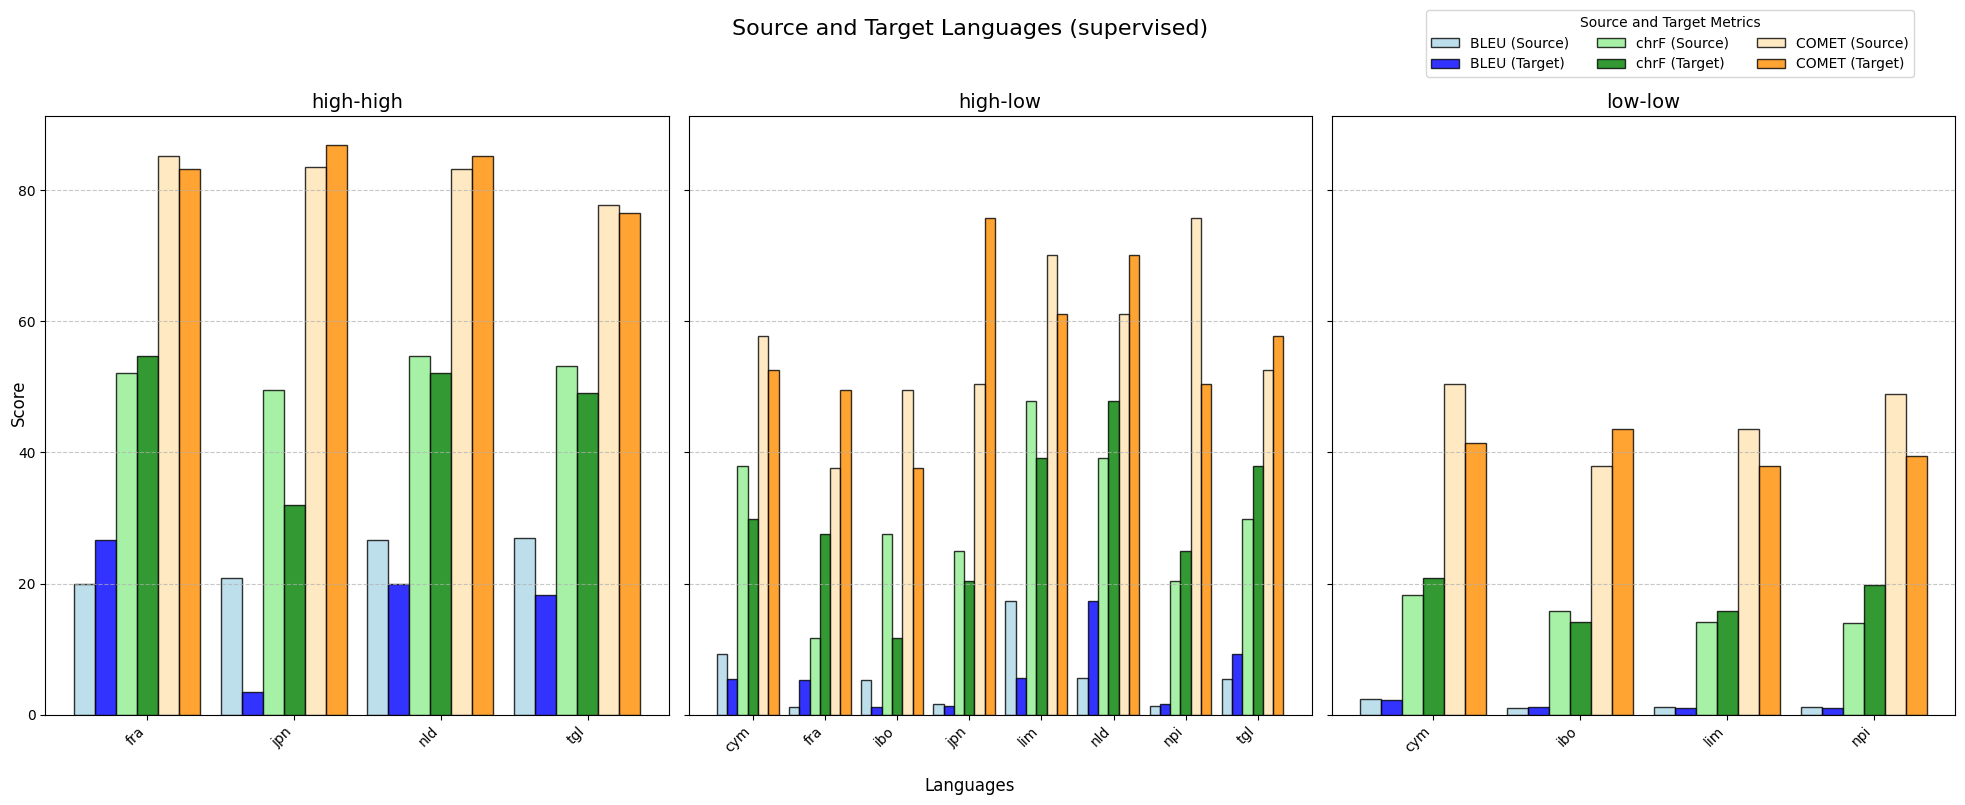

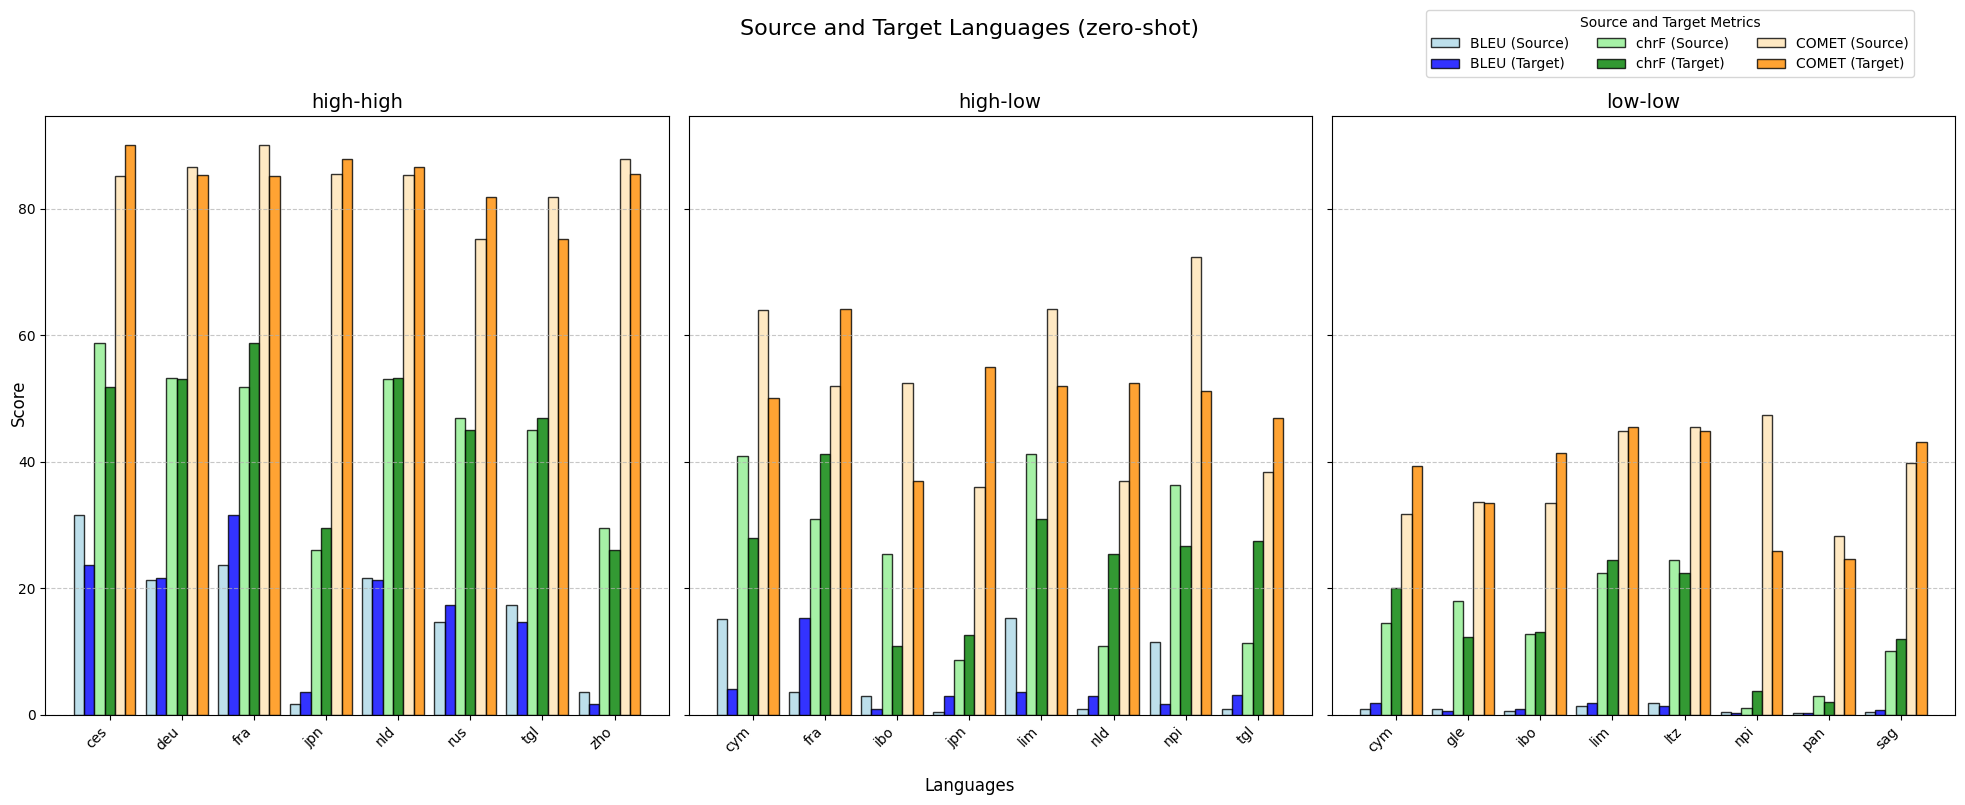

In [603]:
def plot_source_target_analysis(score_dicts, labels_dict, svozs):
    """
    Creates bar plots for average BLEU, chrF, and COMET scores for all languages,
    split into source and target roles, and filters out unused languages.

    Parameters:
    - score_dicts: A dictionary with scenario keys (e.g., 'high-high') and score dictionaries as values.
    - labels_dict: A dictionary with scenario keys and corresponding lists of translation directions as values.
    - svozs: A string indicating 'supervised' or 'zero-shot'.
    """
    import matplotlib.patches as mpatches
    import numpy as np
    import matplotlib.pyplot as plt

    metrics = ['BLEU', 'chrF', 'COMET']
    scenarios = list(score_dicts.keys())

    # Define colors for metrics
    metric_colors = {
        'BLEU': ('lightblue', 'blue'),
        'chrF': ('lightgreen', 'green'),
        'COMET': ('moccasin', 'darkorange'),
    }

    # Initialize plot
    fig, axes = plt.subplots(1, len(scenarios), figsize=(20, 8), sharey=True)
    if len(scenarios) == 1:  # If there's only one scenario, `axes` won't be a list
        axes = [axes]

    # Iterate through scenarios
    for ax, scenario in zip(axes, scenarios):
        labels = labels_dict[scenario]
        scores = score_dicts[scenario]
        
        # Use only the first element for alpha=0 (i.e., scores[metric][0])
        avg_scores = {metric: scores[metric][0] for metric in metrics}

        # Collect all languages used in this scenario
        languages_in_scenario = sorted(set(lang for pair in labels for lang in pair.split('-')))

        # Separate scores for source and target roles
        src_scores = {metric: {lang: [] for lang in languages_in_scenario} for metric in metrics}
        tgt_scores = {metric: {lang: [] for lang in languages_in_scenario} for metric in metrics}

        # Assign scores to source and target roles
        for metric in metrics:
            for j, pair in enumerate(labels):
                src, tgt = pair.split('-')
                src_scores[metric][src].append(avg_scores[metric][j])  # Source language scores
                tgt_scores[metric][tgt].append(avg_scores[metric][j])  # Target language scores

        # Compute averages for source and target roles
        src_averages = {metric: {lang: scores[0] if scores else 0 for lang, scores in src_scores[metric].items()} for metric in metrics}
        tgt_averages = {metric: {lang: scores[0] if scores else 0 for lang, scores in tgt_scores[metric].items()} for metric in metrics}
        
        # Prepare data for plotting
        n_languages = len(languages_in_scenario)
        n_metrics = len(metrics)
        width = 0.2  # Width of individual bars
        group_width = n_metrics * 2 * width  # Total width of each language's group (metrics * 2 bars)

        # Compute bar positions
        x = np.arange(n_languages) * (group_width + 0.2)  # Add space between language groups

        # Plot bars for each metric
        for i, metric in enumerate(metrics):
            # Offset for source and target within each metric's group
            offset = i * 2 * width  # Each metric group gets a unique offset

            # Plot for source role
            ax.bar(
                x + offset - width / 2,  # Offset for source bars
                [src_averages[metric][lang] for lang in languages_in_scenario],
                width,
                label=f'{metric} (Source)' if scenario == scenarios[0] else "",
                color=metric_colors[metric][0],  # Light color for source
                alpha=0.8,
                edgecolor='black'
            )

            # Plot for target role
            ax.bar(
                x + offset + width / 2,  # Offset for target bars
                [tgt_averages[metric][lang] for lang in languages_in_scenario],
                width,
                label=f'{metric} (Target)' if scenario == scenarios[0] else "",
                color=metric_colors[metric][1],  # Dark color for target
                alpha=0.8,
                edgecolor='black'
            )

        # Customize subplot
        ax.set_xticks(x + (group_width - width) / 2)  # Center ticks for each language group
        ax.set_xticklabels(languages_in_scenario, rotation=45, ha='right', fontsize=10)
        ax.set_title(f'{scenario}', fontsize=14)
        ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Add shared labels and title
    fig.suptitle(f'Source and Target Languages ({svozs})', fontsize=16)
    fig.supxlabel('Languages', fontsize=12)
    fig.supylabel('Score', fontsize=12)

    # Add legend
    fig.legend(
        loc='upper center',
        bbox_to_anchor=(0.85, 1.),
        ncol= len(metrics),
        title='Source and Target Metrics',
    )

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()




# Example usage:
score_dicts = {
    'high-high': HH_sv,
    'high-low': HL_sv,
    'low-low': LL_sv
}
labels_dict = {
    'high-high': HH_sv_labels,
    'high-low': HL_sv_labels,
    'low-low': LL_sv_labels
}
plot_source_target_analysis(score_dicts, labels_dict, svozs='supervised')

score_dicts = {
    'high-high': HH_zs,
    'high-low': HL_zs,
    'low-low': LL_zs
}
labels_dict = {
    'high-high': HH_zs_labels,
    'high-low': HL_zs_labels,
    'low-low': LL_zs_labels
}
plot_source_target_analysis(score_dicts, labels_dict, svozs='zero-shot')


In [198]:
# Eval results per word order

In [212]:
# ok. so what do we want for this.
# All combinations of word orders? It doesnt make sense to have an average of a word order thing,
# it will always be word order dependant
# BUT THEN. Thats the same as what you already have?

# Maybe theres a way for the word order thing to make sense?? maybe not for supervised HH and LL but the other ones?

word_orders = {
    "ces": "SVO",
    "deu": "SOV/SVO",
    "fra": "SVO",
    "jpn": "SOV",
    "nld": "SOV/SVO",
    "rus": "SVO",
    "tgl": "VSO",
    "zho": "SVO",
    "cym": "VSO",
    "ibo": "SVO",
    "lim": "SOV/SVO",
    "npi": "SOV",
    "gle": "VSO",
    "ltz": "SOV/SVO",
    "pan": "SOV",
    "sag": "SVO"
}

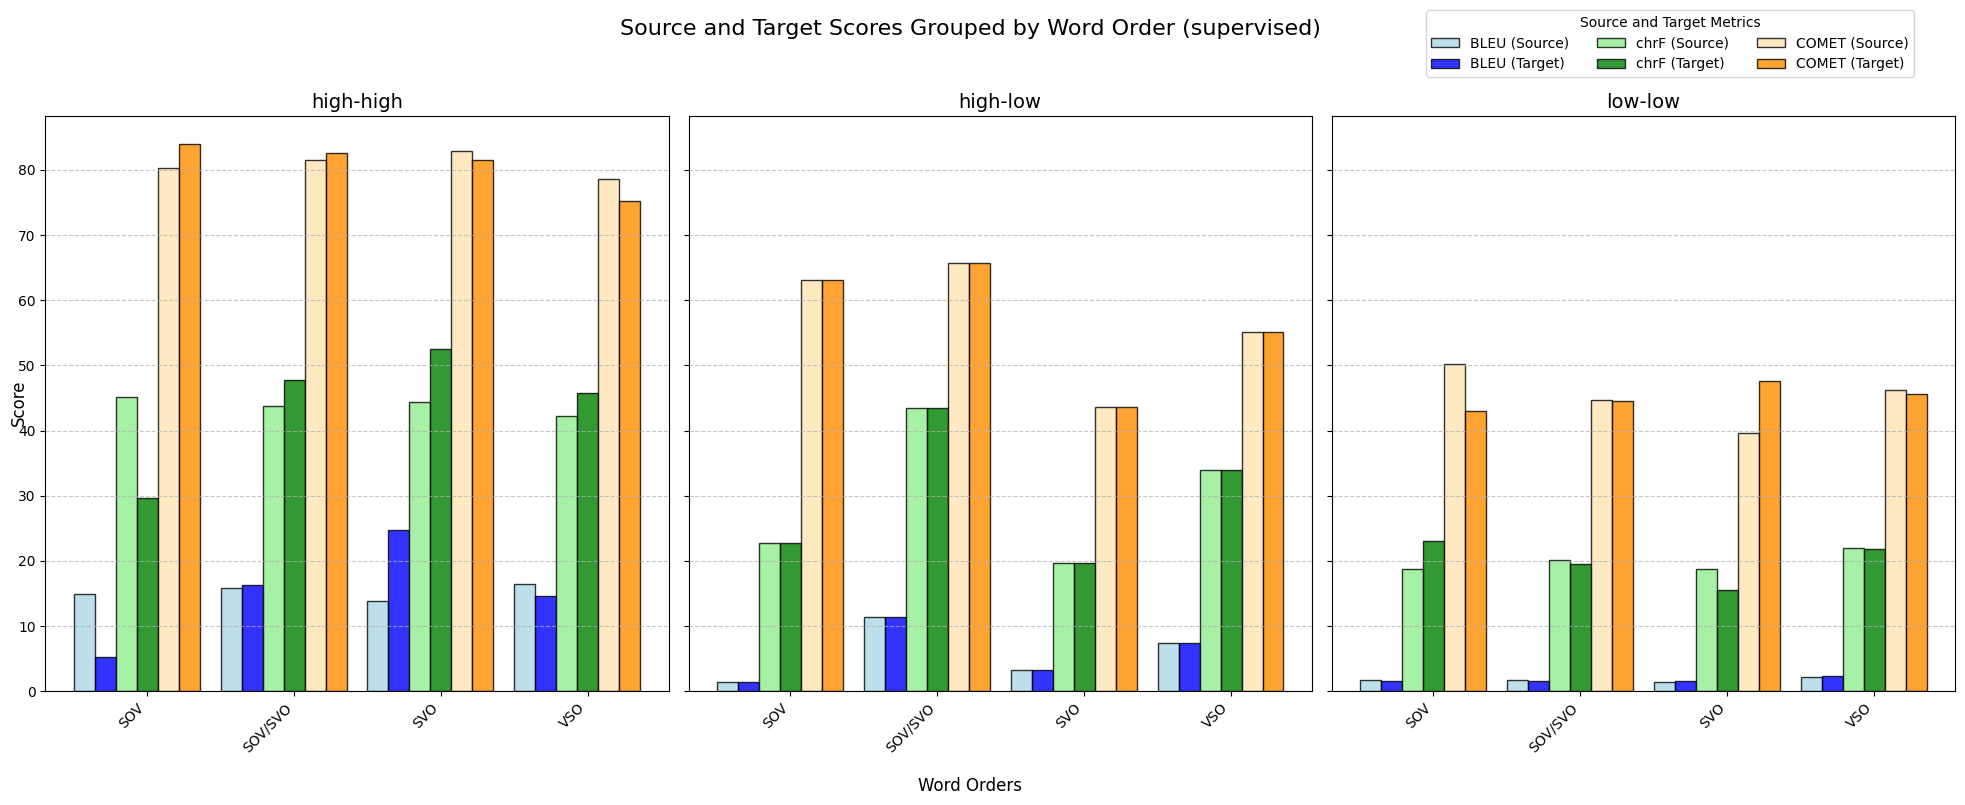

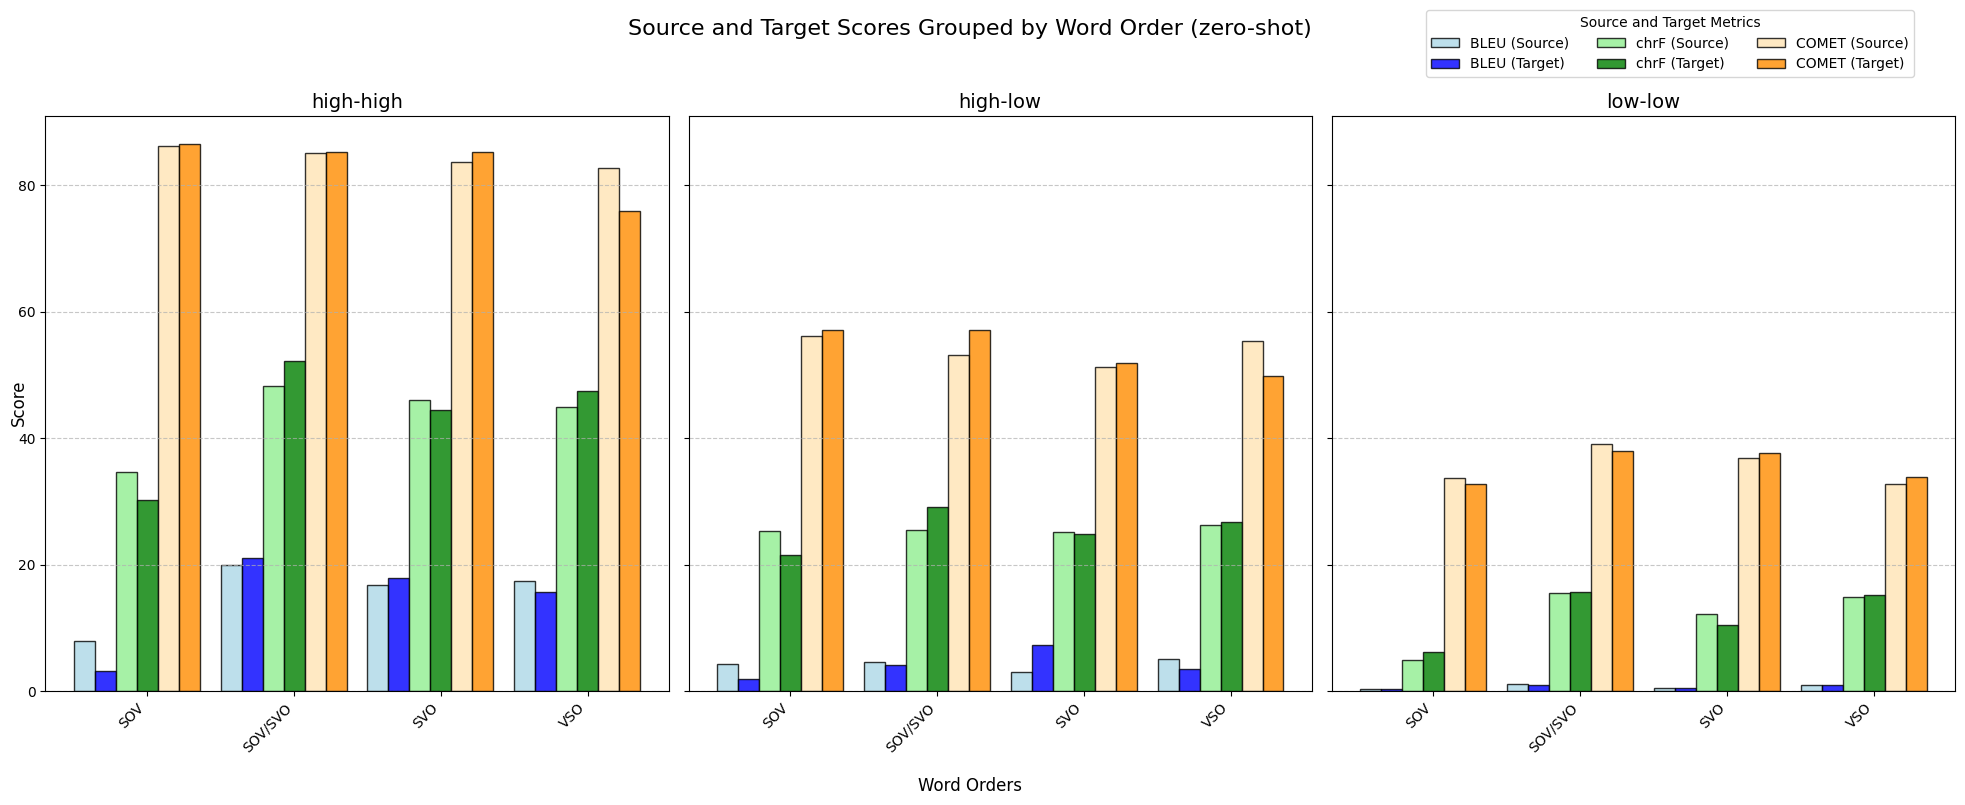

In [604]:
def plot_word_order_analysis(score_dicts, labels_dict, svozs, word_orders):
    """
    Creates bar plots for average BLEU, chrF, and COMET scores for all languages,
    grouped by word order, without distinguishing between source and target roles.

    Parameters:
    - score_dicts: A dictionary with scenario keys (e.g., 'high-high') and score dictionaries as values.
    - labels_dict: A dictionary with scenario keys and corresponding lists of translation directions as values.
    - svozs: A string indicating 'supervised' or 'zero-shot'.
    - word_orders: A dictionary mapping languages to their word order.
    """
    import numpy as np
    import matplotlib.pyplot as plt
    from collections import defaultdict

    metrics = ['BLEU', 'chrF', 'COMET']
    scenarios = list(score_dicts.keys())

    # Define colors for metrics
    metric_colors = {
        'BLEU': 'lightblue',
        'chrF': 'lightgreen',
        'COMET': 'moccasin',
    }

    # Initialize plot
    fig, axes = plt.subplots(1, len(scenarios), figsize=(20, 8), sharey=True)
    if len(scenarios) == 1:  # If there's only one scenario, `axes` won't be a list
        axes = [axes]

    # Group languages by word order
    word_order_groups = defaultdict(list)
    for lang, order in word_orders.items():
        word_order_groups[order].append(lang)

    word_order_keys = sorted(word_order_groups.keys())

    # Iterate through scenarios
    for ax, scenario in zip(axes, scenarios):
        labels = labels_dict[scenario]
        scores = score_dicts[scenario]
        
        # Modify avg_scores to use only the first element for alpha=0
        avg_scores = {metric: scores[metric][0] for metric in metrics}

        # Combine scores for each word order
        word_order_scores = {metric: defaultdict(list) for metric in metrics}
        for metric in metrics:
            for j, pair in enumerate(labels):
                src, tgt = pair.split('-')
                src_order = word_orders.get(src, "Unknown")
                tgt_order = word_orders.get(tgt, "Unknown")
                word_order_scores[metric][src_order].append(avg_scores[metric][j])
                word_order_scores[metric][tgt_order].append(avg_scores[metric][j])

        # Compute averages for each word order
        word_order_averages = {metric: {order: np.mean(scores) if scores else 0 
                                        for order, scores in word_order_scores[metric].items()} 
                               for metric in metrics}

        # Prepare data for plotting
        n_word_orders = len(word_order_keys)
        n_metrics = len(metrics)
        width = 0.25  # Width of individual bars
        group_width = n_metrics * width  # Total width of each word order group

        # Compute bar positions
        x = np.arange(n_word_orders) * (group_width + 0.2)  # Add space between word order groups

        # Plot bars for each metric
        for i, metric in enumerate(metrics):
            # Offset for each metric's group
            offset = i * width

            ax.bar(
                x + offset,  # Offset for each metric bar
                [word_order_averages[metric].get(order, 0) for order in word_order_keys],
                width,
                label=metric if scenario == scenarios[0] else "",
                color=metric_colors[metric],
                alpha=0.8,
                edgecolor='black'
            )

        # Customize subplot
        ax.set_xticks(x + (group_width - width) / 2)  # Center ticks for each word order group
        ax.set_xticklabels(word_order_keys, rotation=45, ha='right', fontsize=10)
        ax.set_title(f'{scenario}', fontsize=14)
        ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Add shared labels and title
    fig.suptitle(f'Word Order Analysis ({svozs})', fontsize=16)
    fig.supxlabel('Word Orders', fontsize=12)
    fig.supylabel('Score', fontsize=12)

    # Add legend
    fig.legend(
        loc='upper center',
        bbox_to_anchor=(0.5, 1.05),
        ncol=len(metrics),
        title='Metrics',
    )

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()




# Example usage:
word_orders = {
    "ces": "SVO",
    "deu": "SOV/SVO",
    "fra": "SVO",
    "jpn": "SOV",
    "nld": "SOV/SVO",
    "rus": "SVO",
    "tgl": "VSO",
    "zho": "SVO",
    "cym": "VSO",
    "ibo": "SVO",
    "lim": "SOV/SVO",
    "npi": "SOV",
    "gle": "VSO",
    "ltz": "SOV/SVO",
    "pan": "SOV",
    "sag": "SVO"
}

score_dicts = {
    'high-high': HH_sv,
    'high-low': HL_sv,
    'low-low': LL_sv
}
labels_dict = {
    'high-high': HH_sv_labels,
    'high-low': HL_sv_labels,
    'low-low': LL_sv_labels
}
plot_source_target_analysis_by_word_order(score_dicts, labels_dict, 'supervised', word_orders)

score_dicts = {
    'high-high': HH_zs,
    'high-low': HL_zs,
    'low-low': LL_zs
}
labels_dict = {
    'high-high': HH_zs_labels,
    'high-low': HL_zs_labels,
    'low-low': LL_zs_labels
}
plot_source_target_analysis_by_word_order(score_dicts, labels_dict, 'zero-shot', word_orders)


In [200]:
# Averages per alpha for the table, though technically thats also the same results as the plot?? hhghr
score_dicts_SV = {
    'high-high': HH_sv,
    'high-low': HL_sv,
    'low-low': LL_sv
}

score_dicts_ZS = {
    'high-high': HH_zs,
    'high-low': HL_zs,
    'low-low': LL_zs
}

In [211]:
def print_average_scores(category, score_dict):
    print(category)
    for i in range(8):
        bleu_avg = sum(score_dict['BLEU'][i]) / len(score_dict['BLEU'][i])
        chrf_avg = sum(score_dict['chrF'][i]) / len(score_dict['chrF'][i])
        comet_avg = sum(score_dict['COMET'][i]) / len(score_dict['COMET'][i])
        print(f"{bleu_avg:.2f}/{chrf_avg:.2f}/{comet_avg:.2f}")
    print()

# Main script
categories = ['high-high', 'high-low', 'low-low']
for category in categories:
    print_average_scores(
        category,
        score_dicts_SV[category]
    )
    
for category in categories:
    print_average_scores(
        category,
        score_dicts_ZS[category]
    )

high-high
15.28/43.88/80.83
15.19/44.15/81.06
14.96/43.89/80.87
15.41/44.07/80.97
15.17/43.73/80.75
14.74/43.36/80.44
14.12/42.38/79.60
12.18/39.22/77.17

high-low
5.86/29.93/56.91
6.03/29.91/57.01
5.93/29.83/56.98
5.90/29.60/56.85
5.80/29.21/56.41
5.41/28.10/55.24
4.74/26.49/53.40
3.45/23.12/49.41

low-low
1.78/19.96/45.20
1.98/20.52/45.88
1.93/20.31/45.58
1.66/19.39/44.29
1.63/19.07/43.75
1.54/18.48/42.63
1.03/16.16/39.08
0.69/14.07/35.82

high-high
16.54/45.07/84.25
16.61/45.21/84.27
16.56/45.10/84.24
16.67/45.26/84.35
16.66/45.04/84.26
16.81/44.66/83.99
15.91/43.85/83.51
13.86/40.88/81.73

high-low
4.25/25.59/54.03
4.34/25.53/54.01
4.17/25.42/53.93
4.11/25.35/53.84
4.18/25.14/53.60
3.78/24.24/52.55
3.36/23.02/50.89
2.30/20.04/47.04

low-low
0.74/11.89/35.62
0.69/11.47/33.43
0.66/11.31/33.33
0.62/11.06/32.47
0.58/10.84/31.83
0.50/10.07/30.84
0.39/9.34/29.64
0.31/8.61/28.73



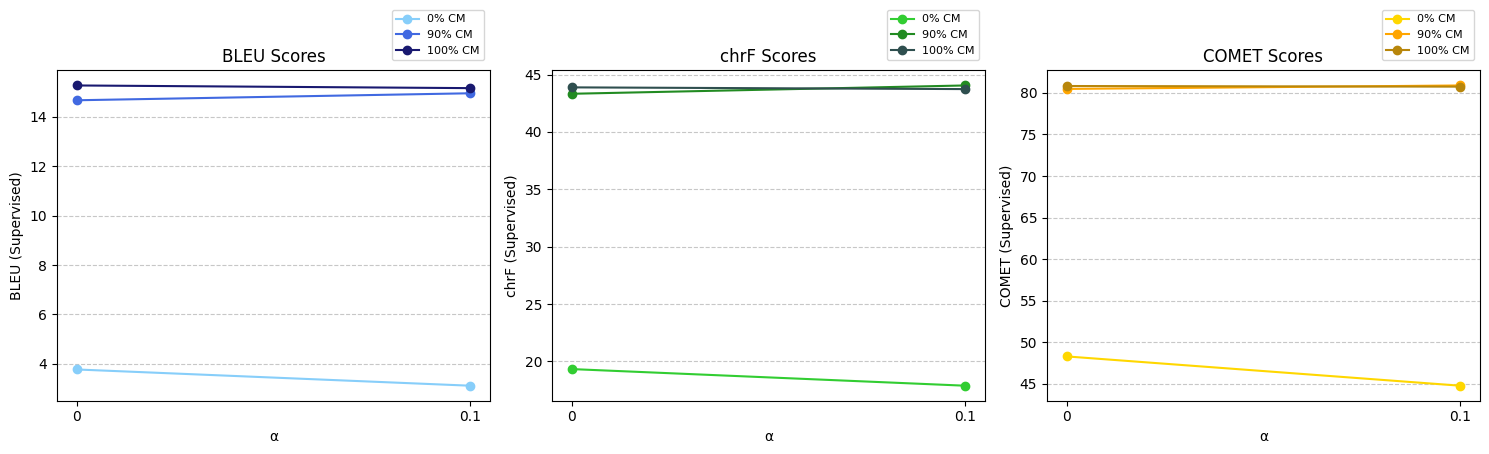

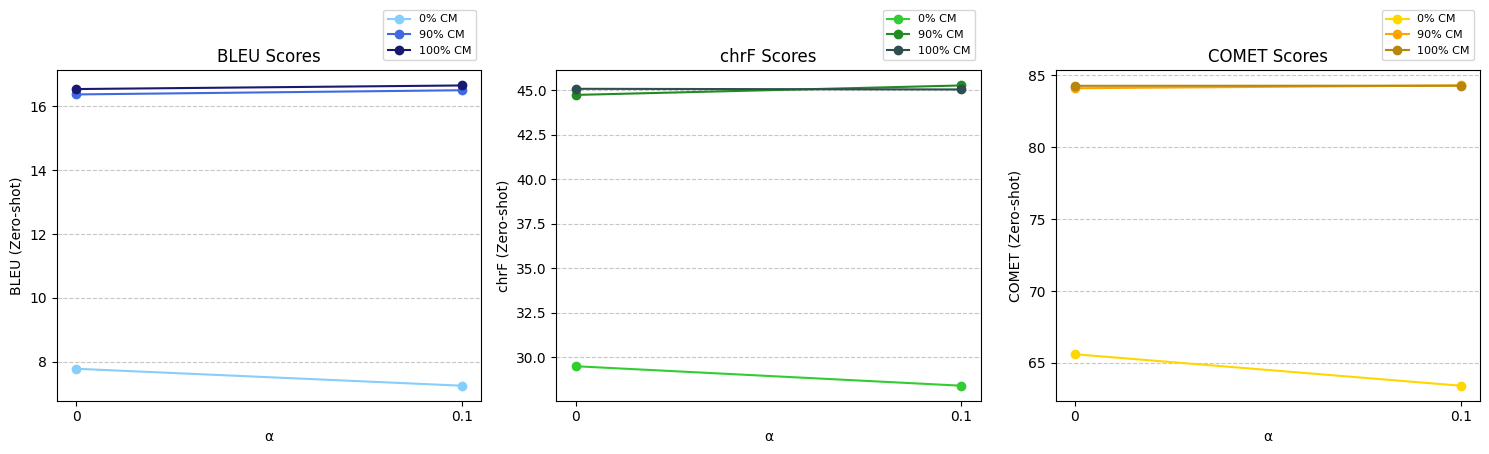

In [271]:
# NON CAUSAL OVERVIEW

HH_sv_CM0, HH_sv_labels_CM0 = compute_average_scores(scenario="high_high", svozs="supervised", alphas=['0','01'], extra_string='-NONCAUSAL')
HH_sv_CM90, HH_sv_labels_CM90 = compute_average_scores(scenario="high_high", svozs="supervised", alphas=['0','01'], extra_string='_CM90')
HH_sv_CM100, HH_sv_labels_CM100 = compute_average_scores(scenario="high_high", svozs="supervised", alphas=['0','01'])

HH_zs_CM0, HH_zs_labels_CM0 = compute_average_scores(scenario="high_high", svozs="zeroshot", alphas=['0','01'], extra_string='-NONCAUSAL')
HH_zs_CM90, HH_zs_labels_CM90 = compute_average_scores(scenario="high_high", svozs="zeroshot", alphas=['0','01'], extra_string='_CM90')
HH_zs_CM100, HH_zs_labels_CM100 = compute_average_scores(scenario="high_high", svozs="zeroshot", alphas=['0','01'])

score_dicts_CM_sv = {
    "0% CM": HH_sv_CM0,
    "90% CM": HH_sv_CM90,
    "100% CM": HH_sv_CM100
}

score_dicts_CM_zs = {
    "0% CM": HH_zs_CM0,
    "90% CM": HH_zs_CM90,
    "100% CM": HH_zs_CM100
}

label_dicts_CM_sv = {
    "0% CM": HH_sv_labels_CM0,
    "90% CM": HH_sv_labels_CM90,
    "100% CM": HH_sv_labels_CM100
}

label_dicts_CM_zs = {
    "0% CM": HH_zs_labels_CM0,
    "90% CM": HH_zs_labels_CM90,
    "100% CM": HH_zs_labels_CM100
}

plot_combined_alpha_scores(score_dicts_CM_sv, scenarios=["0% CM", "90% CM", "100% CM"], svozs="Supervised", alpha_values=[0,0.1])
plot_combined_alpha_scores(score_dicts_CM_zs, scenarios=["0% CM", "90% CM", "100% CM"], svozs="Zero-shot", alpha_values=[0,0.1])

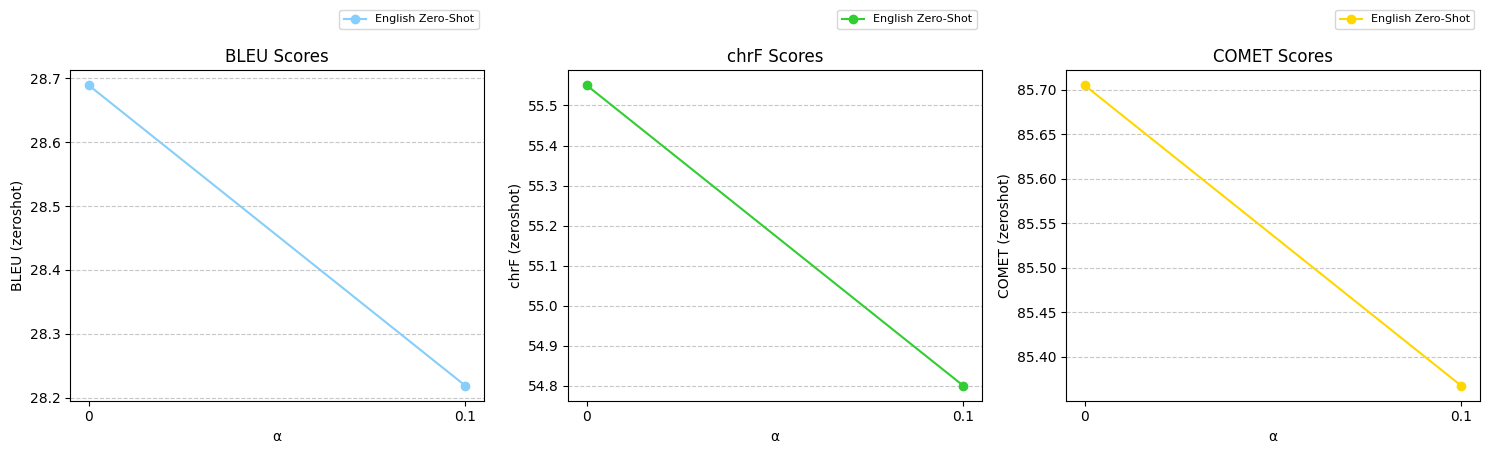

In [285]:
# ENGLISH CENTRIC ZERO-SHOT PLOT
# yeahhhh let's just plot this, since you have averages and such
HH_zs_EN, HH_zs_labels_EN = compute_average_scores(scenario="high_high", svozs="zeroshot", alphas=['0','01'], extra_string='_EN')

HH_zs_EN_dict = {"English Zero-Shot": HH_zs_EN}

plot_combined_alpha_scores(HH_zs_EN_dict, scenarios=["English Zero-Shot"], svozs="zeroshot", alpha_values=[0, 0.1])

In [266]:
HH_zs_EN

{'BLEU': [array([23.28, 42.88,  4.19, 22.76, 30.48, 43.8 , 24.6 , 37.52]),
  array([23.29, 42.29,  4.12, 23.25, 28.13, 43.69, 25.09, 35.89])],
 'chrF': [array([54.6, 66.5, 34. , 49.4, 58.1, 68. , 52.5, 61.3]),
  array([54.5, 65.7, 33.8, 51.6, 52.6, 66.7, 53.8, 59.7])],
 'COMET': [array([86.17, 87.15, 88.5 , 77.63, 86.67, 89.11, 86.36, 84.05]),
  array([86.42, 87.21, 88.21, 78.51, 83.87, 88.54, 86.69, 83.49])]}

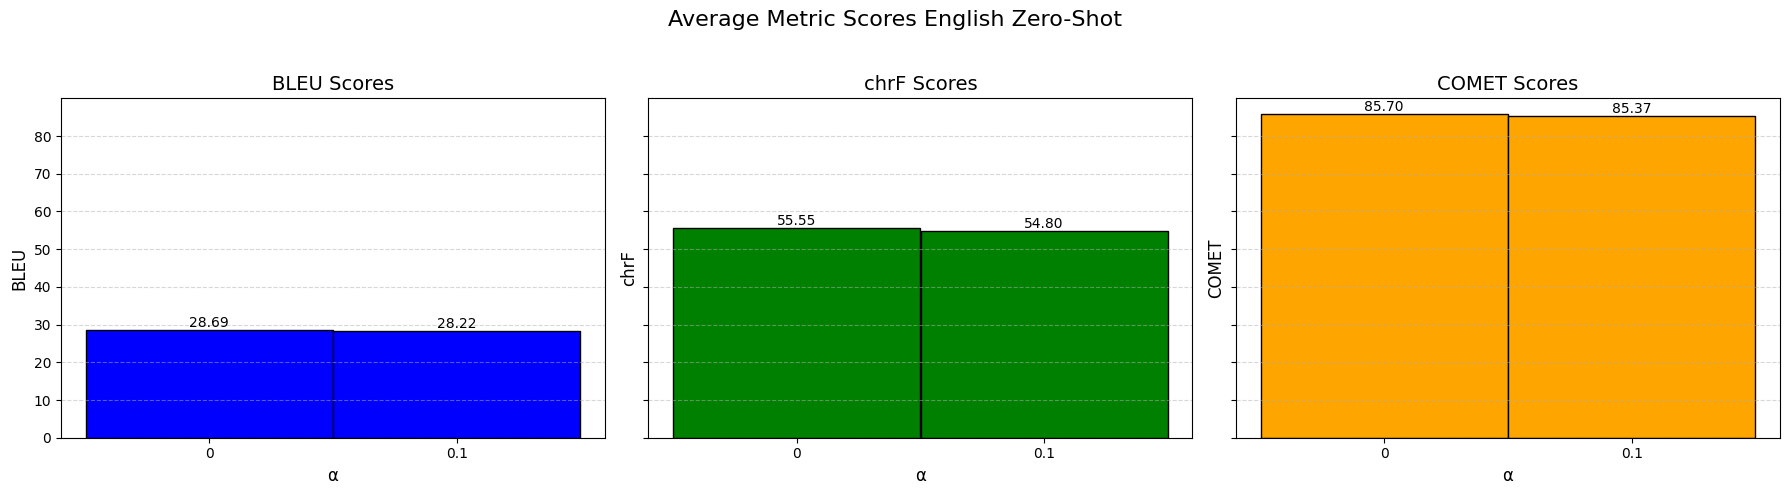

In [358]:
import numpy as np
import matplotlib.pyplot as plt

# Updated Function with Closer Bars and Outlines
def plot_alpha_scores_connected_bar(score_dict, scenario, svozs, alpha_values=[0, 0.01, 0.025, 0.05, 0.1, 0.25, 0.5, 1]):
    metrics = ['BLEU', 'chrF', 'COMET']
    colors = ['b', 'g', 'orange']
    x = np.arange(len(alpha_values))  # Original bar positions
    bar_width = 0.999  # Make bars thinner to place them closer

    # Create subplots for each metric
    fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

    for i, metric in enumerate(metrics):
        values = [np.mean(x) for x in score_dict[metric]]  # Compute average scores
        ax = axes[i]

        # Plot bars with closer spacing
        bars = ax.bar(x, values, color=colors[i], width=bar_width, edgecolor='black', linewidth=1)

        # Add titles and labels
        ax.set_title(f'{metric} Scores', fontsize=14)
        ax.set_xticks(x)
        ax.set_xticklabels(alpha_values)
        ax.set_xlabel('α', fontsize=12)
        ax.set_ylabel(metric, fontsize=12)
        ax.grid(axis='y', linestyle='--', alpha=0.5)

        # Add annotations on top of bars
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', 
                    ha='center', va='bottom', fontsize=10)

    fig.suptitle(f'Average Metric Scores English Zero-Shot', fontsize=16)
    fig.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout for title
    plt.show()

# Example Usage
HH_zs_EN, HH_zs_labels_EN = compute_average_scores(scenario="high_high", svozs="zeroshot", alphas=['0', '01'], extra_string='_EN')

# Plot with Closer Bars
plot_alpha_scores_connected_bar(score_dict=HH_zs_EN, scenario="High-High", svozs="zeroshot", alpha_values=[0, 0.1])


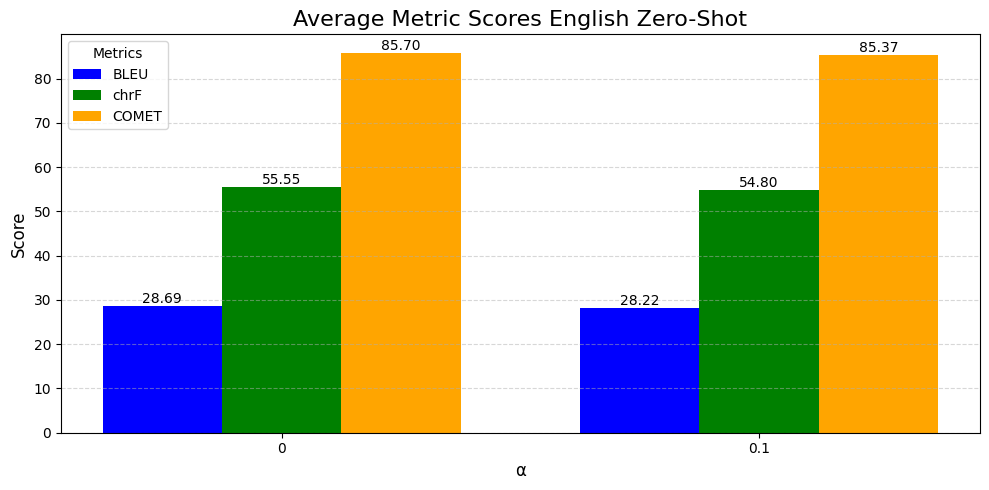

In [612]:
import numpy as np
import matplotlib.pyplot as plt

# Updated Function to Plot All Metrics on the Same Axes
def plot_alpha_scores_connected_bar(score_dict, scenario, svozs, alpha_values=[0, 0.01, 0.025, 0.05, 0.1, 0.25, 0.5, 1]):
    metrics = ['BLEU', 'chrF', 'COMET']
    colors = ['b', 'g', 'orange']
    x = np.arange(len(alpha_values))  # Original bar positions
    bar_width = 0.25  # Adjust bar width so bars for each metric fit together

    # Create the figure
    fig, ax = plt.subplots(figsize=(10, 5))

    # Plot bars for each metric with offsets for each set of bars
    for i, metric in enumerate(metrics):
        values = [np.mean(x) for x in score_dict[metric]]  # Compute average scores
        ax.bar(x + i * bar_width, values, color=colors[i], width=bar_width, label=metric)

    # Add titles and labels
    ax.set_title(f'Average Metric Scores English Zero-Shot', fontsize=16)
    ax.set_xticks(x + bar_width)
    ax.set_xticklabels(alpha_values)
    ax.set_xlabel('α', fontsize=12)
    ax.set_ylabel('Score', fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.5)

    # Add annotations on top of bars
    for i, metric in enumerate(metrics):
        values = [np.mean(x) for x in score_dict[metric]]  # Compute average scores
        for j, bar in enumerate(ax.bar(x + i * bar_width, values, color=colors[i], width=bar_width)):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', 
                    ha='center', va='bottom', fontsize=10)

    # Add legend to differentiate metrics
    ax.legend(title="Metrics")

    fig.tight_layout()  # Adjust layout to avoid overlap
    plt.show()

# Example Usage
HH_zs_EN, HH_zs_labels_EN = compute_average_scores(scenario="high_high", svozs="zeroshot", alphas=['0', '01'], extra_string='_EN')

# Plot with Closer Bars on the Same Plot
plot_alpha_scores_connected_bar(score_dict=HH_zs_EN, scenario="High-High", svozs="zeroshot", alpha_values=[0, 0.1])


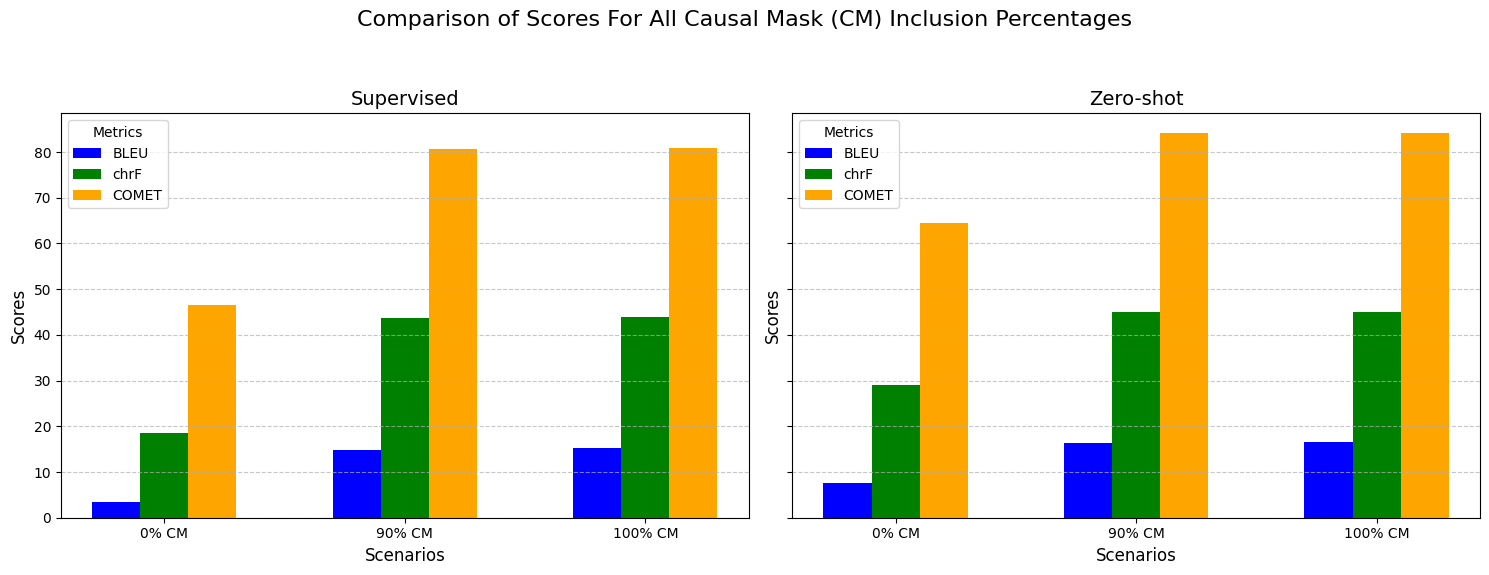

In [279]:
# Function to plot scores for all scenarios in one figure with subplots for supervised and zero-shot
def plot_bar_alpha_scores(score_dicts_sv, score_dicts_zs, scenarios, alpha_values, metrics=['BLEU', 'chrF', 'COMET']):
#     colors = ['lightskyblue', 'royalblue', 'midnightblue']  # Adjust colors as needed
    colors = ['b', 'g', 'orange']
    fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)
    
    for idx, (ax, score_dicts, title) in enumerate(zip(axes, 
                                                       [score_dicts_sv, score_dicts_zs], 
                                                       ['Supervised', 'Zero-shot'])):
        width = 0.2  # Width of each bar
        x = np.arange(len(scenarios))  # Positions for scenarios
        
        for i, metric in enumerate(metrics):
            # Extract mean values for each scenario and metric
            values = [np.mean(score_dicts[scenario][metric]) for scenario in scenarios]
            ax.bar(x + i * width, values, width, label=metric, color=colors[i])
        
        ax.set_title(f'{title}', fontsize=14)
        ax.set_xticks(x + width)  # Center the ticks
        ax.set_xticklabels(scenarios)
        ax.set_xlabel('Scenarios', fontsize=12)
        ax.grid(axis='y', linestyle='--', alpha=0.7)
        ax.legend(title='Metrics', fontsize=10)
        ax.set_ylabel('Scores', fontsize=12)
    
    fig.suptitle('Comparison of Scores For All Causal Mask (CM) Inclusion Percentages', fontsize=16, y=0.95)
    fig.tight_layout(rect=[0, 0, 1, 0.9])  # Adjust layout to fit title
    plt.show()

# Example usage
plot_bar_alpha_scores(
    score_dicts_sv=score_dicts_CM_sv, 
    score_dicts_zs=score_dicts_CM_zs, 
    scenarios=["0% CM", "90% CM", "100% CM"], 
    alpha_values=[0, 0.1]
)

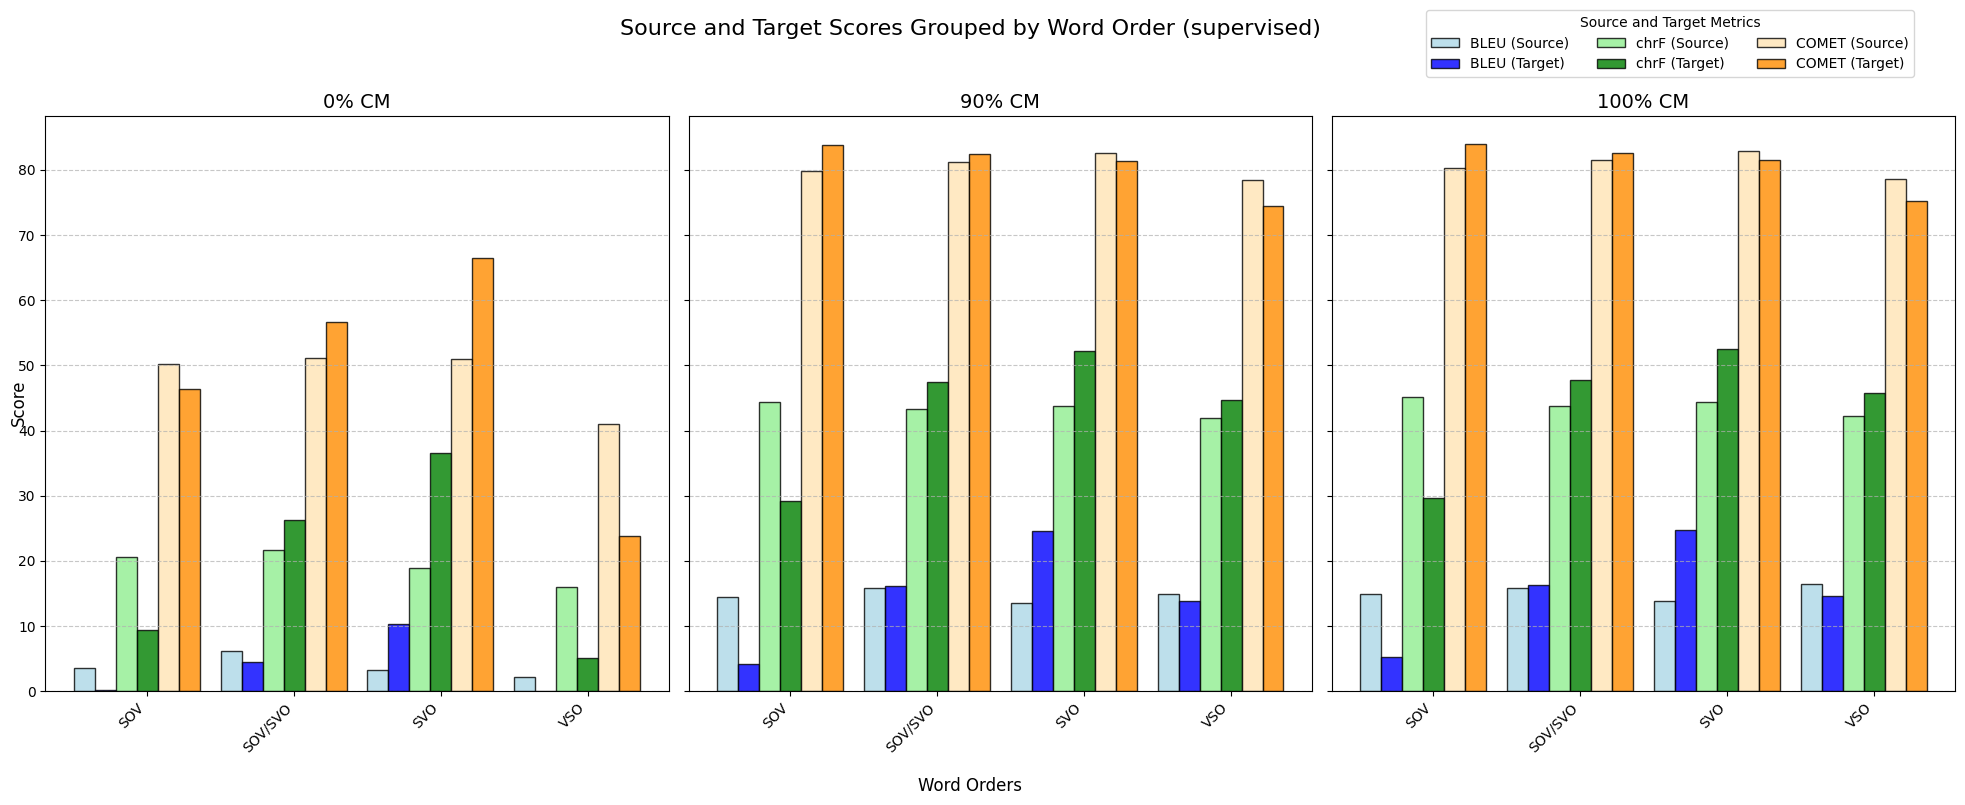

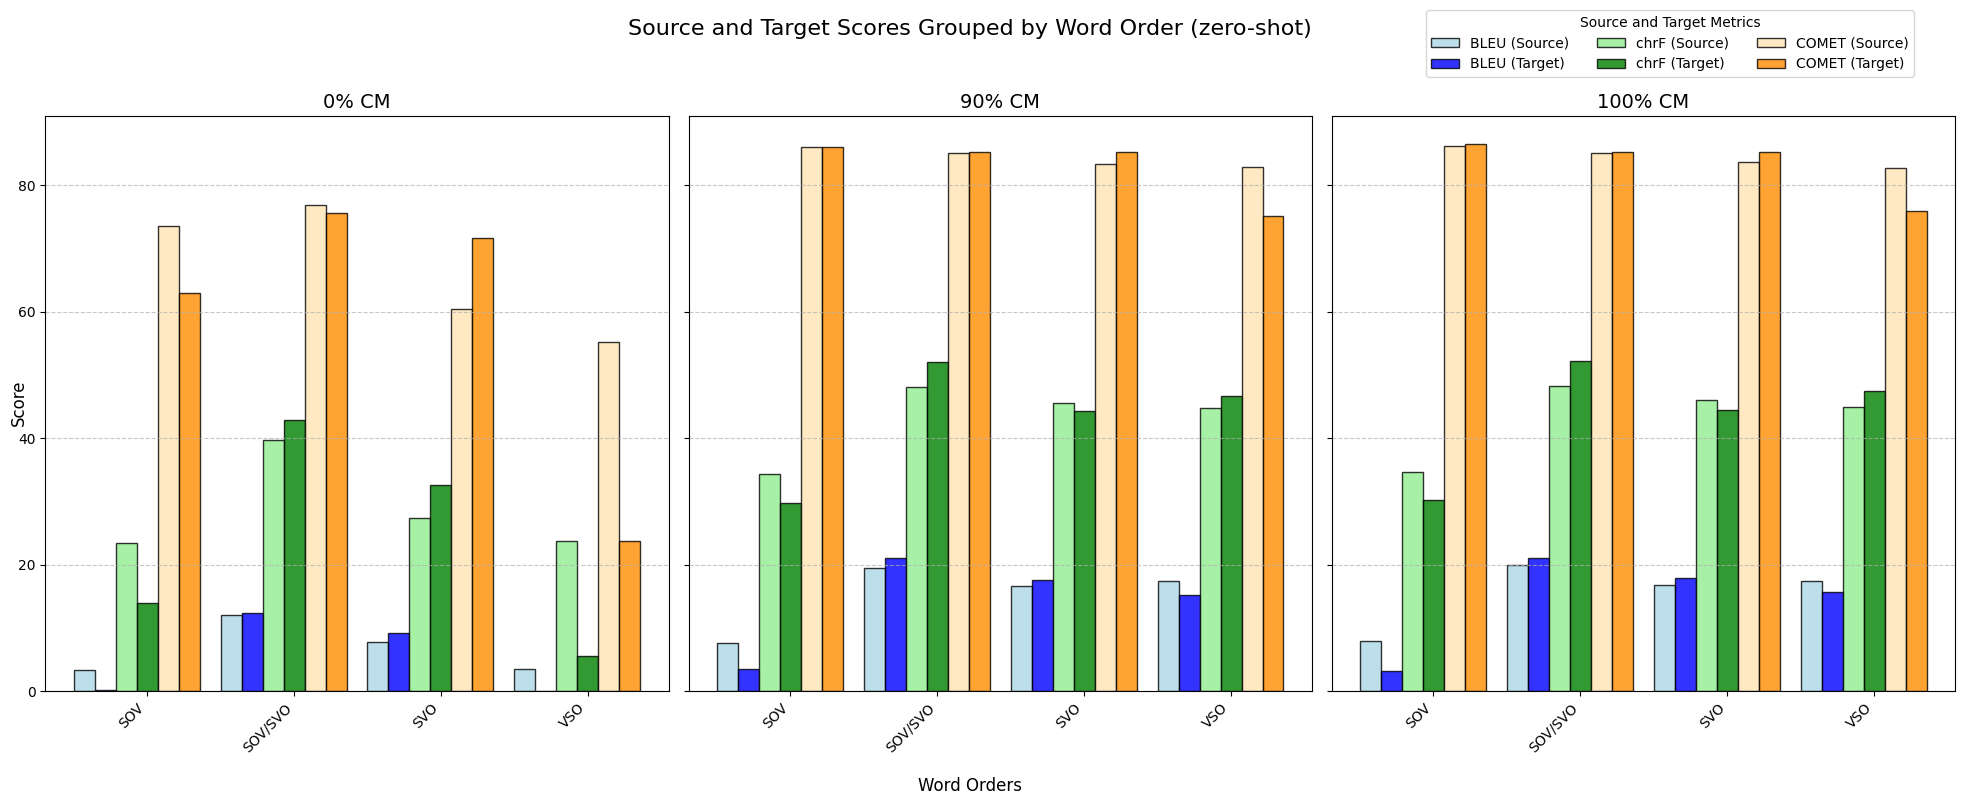

In [274]:
plot_source_target_analysis_by_word_order(score_dicts_CM_sv, label_dicts_CM_sv, 'supervised', word_orders)
plot_source_target_analysis_by_word_order(score_dicts_CM_zs, label_dicts_CM_zs, 'zero-shot', word_orders)

In [545]:
# Example Data
alpha_values = [0, 0.1]
score_dicts_CM_sv = {
    "0% CM": HH_sv_CM0,
    "90% CM": HH_sv_CM90,
    "100% CM": HH_sv_CM100
}

score_dicts_CM_zs = {
    "0% CM": HH_zs_CM0,
    "90% CM": HH_zs_CM90,
    "100% CM": HH_zs_CM100
}

label_dicts_CM_sv = {
    "0% CM": HH_sv_labels_CM0,
    "90% CM": HH_sv_labels_CM90,
    "100% CM": HH_sv_labels_CM100
}

label_dicts_CM_zs = {
    "0% CM": HH_zs_labels_CM0,
    "90% CM": HH_zs_labels_CM90,
    "100% CM": HH_zs_labels_CM100
}

# THIS IS SOOOO UGLY BUT I HAVE LIKE 72 HOURS LEFT.
# No time for elegant code I'm afraid. 
HH_BLEU = score_dicts_CM_sv['0% CM']['BLEU']
HL_BLEU = score_dicts_CM_sv['90% CM']['BLEU']
LL_BLEU = score_dicts_CM_sv['100% CM']['BLEU']
HH_chrF = score_dicts_CM_sv['0% CM']['chrF']
HL_chrF = score_dicts_CM_sv['90% CM']['chrF']
LL_chrF = score_dicts_CM_sv['100% CM']['chrF']
HH_COMET = score_dicts_CM_sv['0% CM']['COMET']
HL_COMET = score_dicts_CM_sv['90% CM']['COMET']
LL_COMET = score_dicts_CM_sv['100% CM']['COMET']
HH_BLEU_zs = score_dicts_CM_zs['0% CM']['BLEU']
HL_BLEU_zs = score_dicts_CM_zs['90% CM']['BLEU']
LL_BLEU_zs = score_dicts_CM_zs['100% CM']['BLEU']
HH_chrF_zs = score_dicts_CM_zs['0% CM']['chrF']
HL_chrF_zs = score_dicts_CM_zs['90% CM']['chrF']
LL_chrF_zs = score_dicts_CM_zs['100% CM']['chrF']
HH_COMET_zs = score_dicts_CM_zs['0% CM']['COMET']
HL_COMET_zs = score_dicts_CM_zs['90% CM']['COMET']
LL_COMET_zs = score_dicts_CM_zs['100% CM']['COMET']

HH_BLEU_both = [np.append(x,y) for x,y in zip(HH_BLEU, HH_BLEU_zs)]
HL_BLEU_both = [np.append(x,y) for x,y in zip(HL_BLEU, HL_BLEU_zs)]
LL_BLEU_both = [np.append(x,y) for x,y in zip(LL_BLEU, LL_BLEU_zs)]
HH_chrF_both = [np.append(x,y) for x,y in zip(HH_chrF, HH_chrF_zs)]
HL_chrF_both = [np.append(x,y) for x,y in zip(HL_chrF, HL_chrF_zs)]
LL_chrF_both = [np.append(x,y) for x,y in zip(LL_chrF, LL_chrF_zs)]
HH_COMET_both = [np.append(x,y) for x,y in zip(HH_COMET, HH_COMET_zs)]
HL_COMET_both = [np.append(x,y) for x,y in zip(HL_COMET, HL_COMET_zs)]
LL_COMET_both = [np.append(x,y) for x,y in zip(LL_COMET, LL_COMET_zs)]

HH_both = {'BLEU': HH_BLEU_both, 'chrF': HH_chrF_both, 'COMET': HH_COMET_both}
HL_both = {'BLEU': HL_BLEU_both, 'chrF': HL_chrF_both, 'COMET': HL_COMET_both}
LL_both = {'BLEU': LL_BLEU_both, 'chrF': LL_chrF_both, 'COMET': LL_COMET_both}

score_dicts_CM_both = {'0% CM': HH_both, '90% CM': HL_both, '100% CM': LL_both,}

labels_HH = label_dicts_CM_sv['0% CM'] + label_dicts_CM_zs['0% CM']
labels_HL = label_dicts_CM_sv['90% CM'] + label_dicts_CM_zs['90% CM']
labels_LL = label_dicts_CM_sv['100% CM'] + label_dicts_CM_zs['100% CM']

labels_dict_CM_both = {'0% CM':labels_HH, '90% CM':labels_HL, '100% CM':labels_LL}

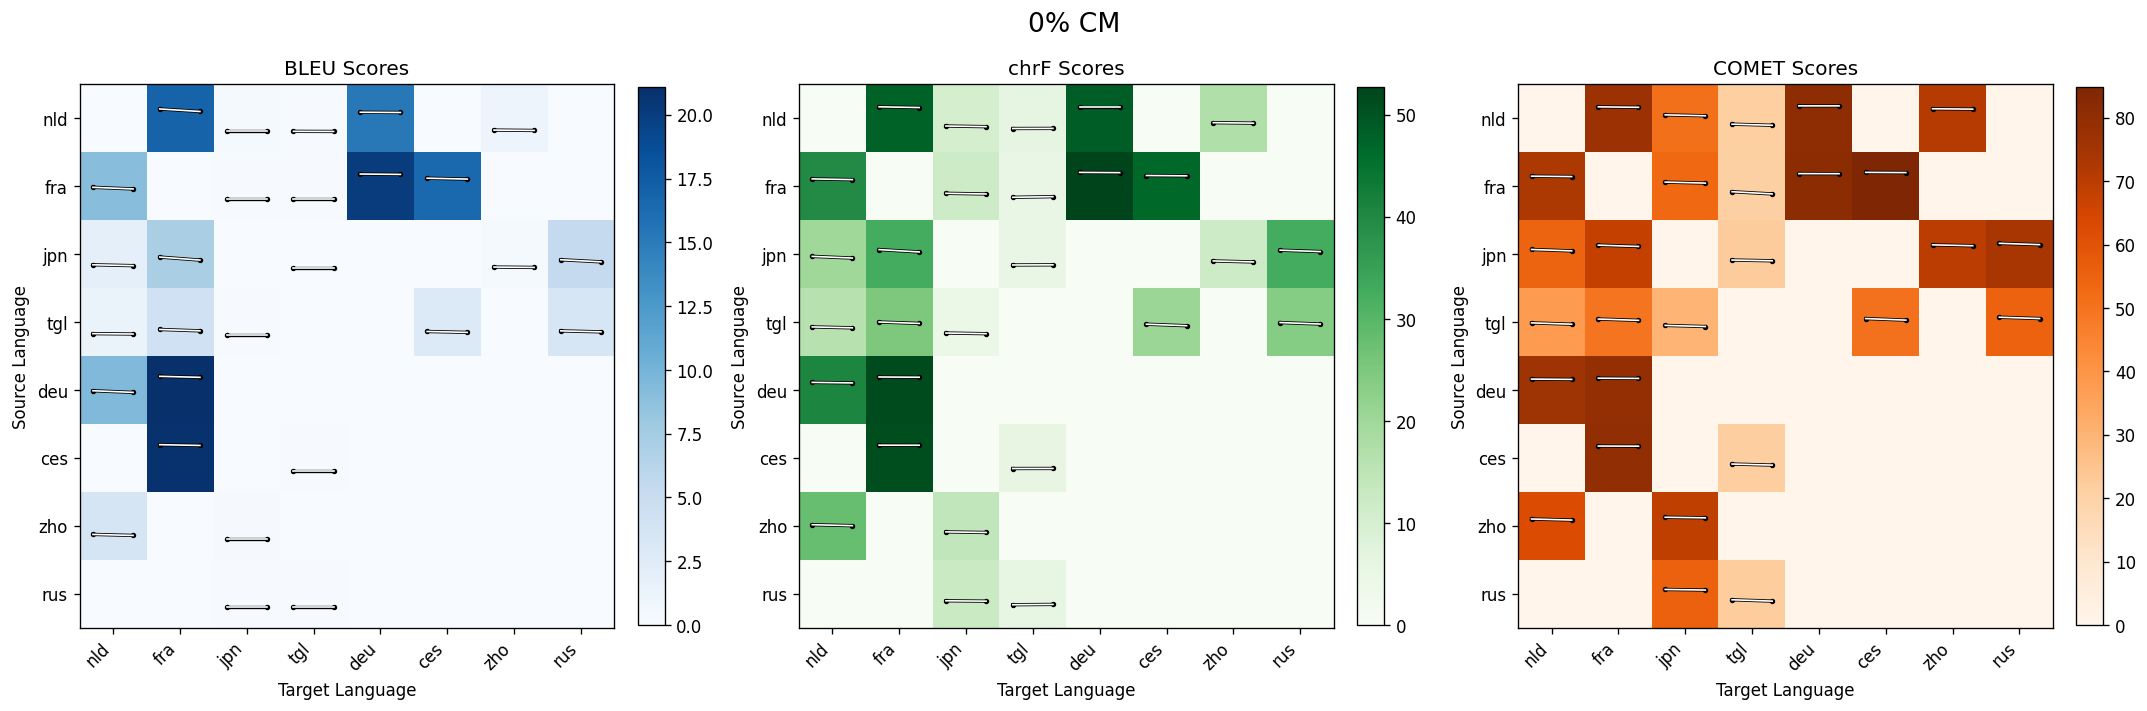

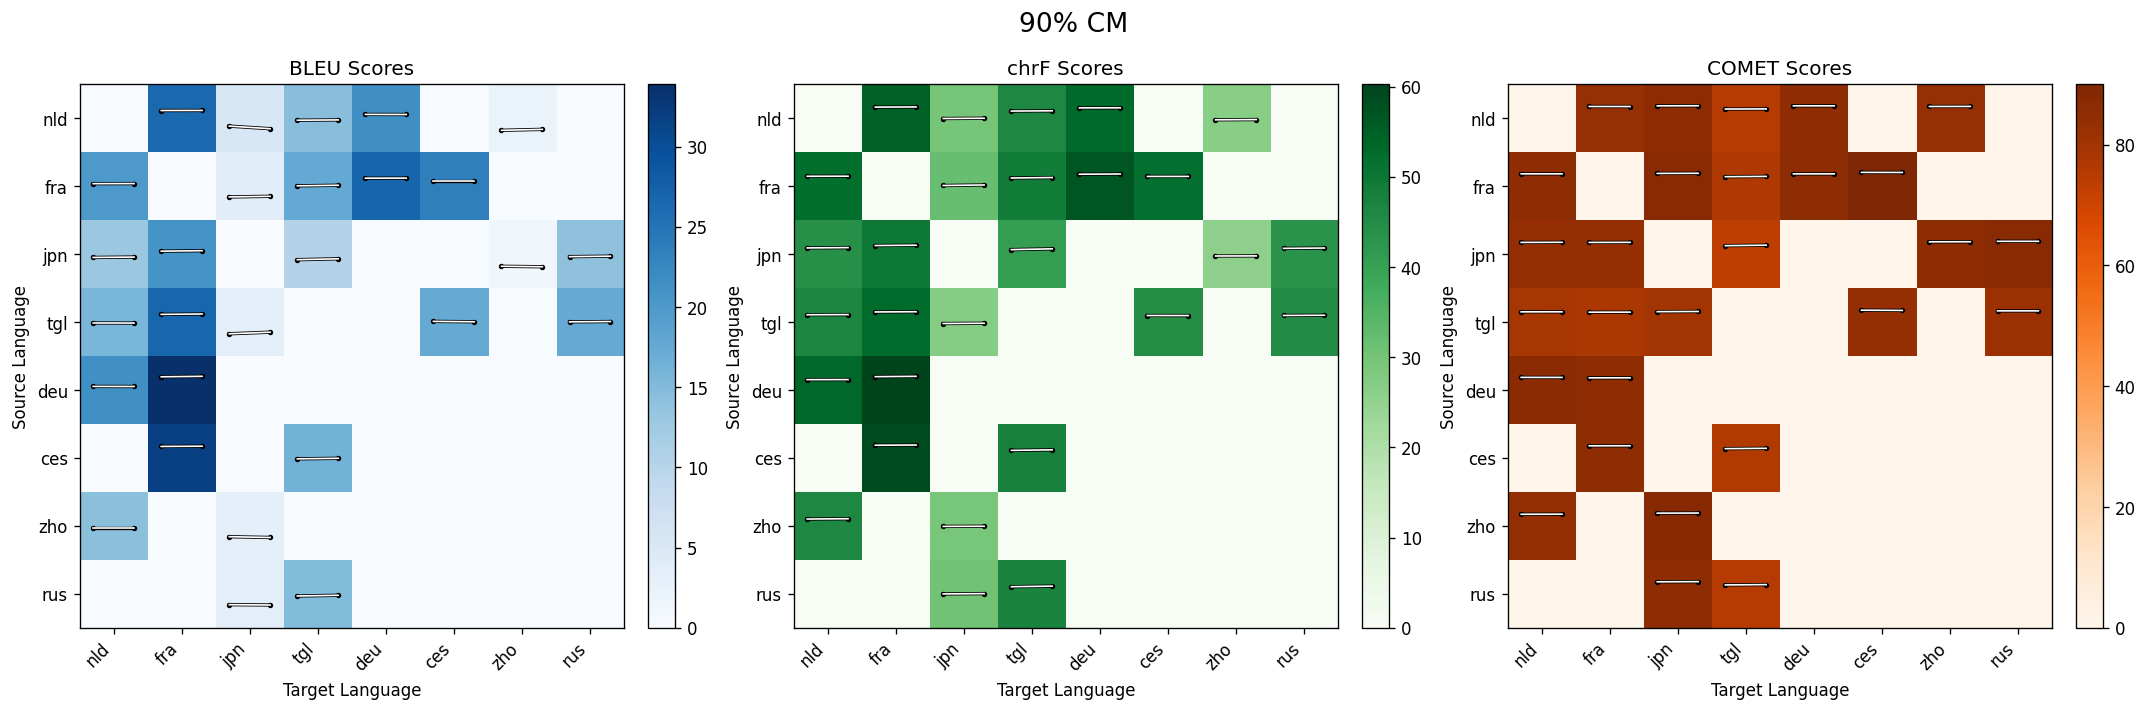

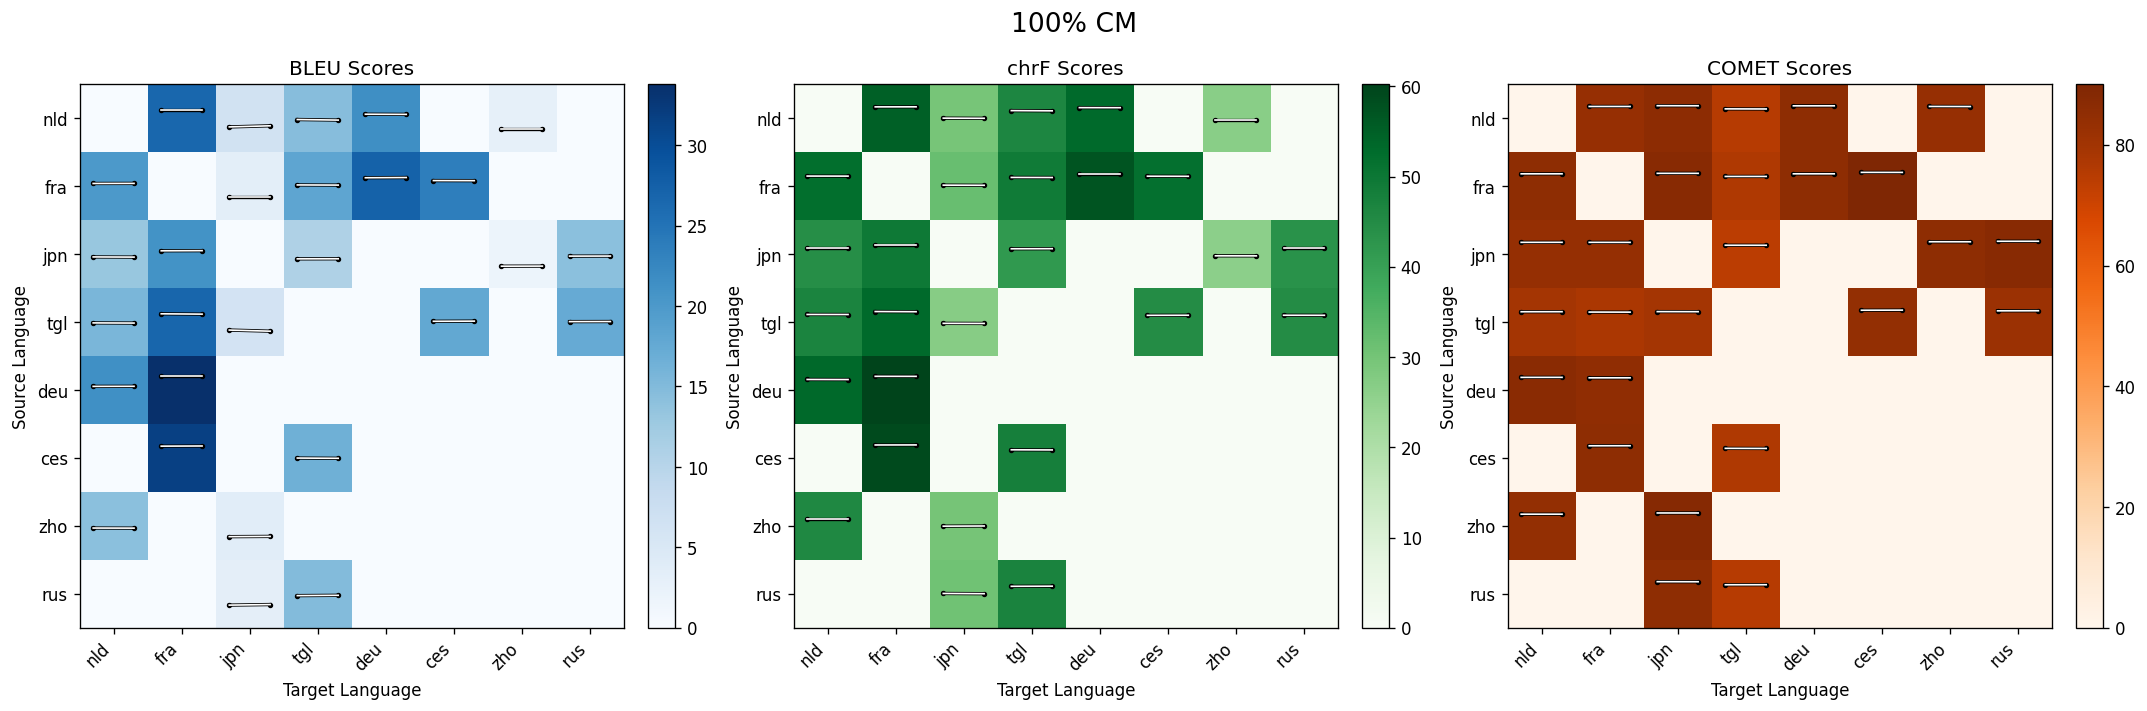

In [550]:
import matplotlib.pyplot as plt
import numpy as np

def plot_scenario_heatmaps(score_dicts, labels_dict, alpha_values):
    """
    Generate plots for each scenario with subplots for different metrics.

    Each plot corresponds to one scenario and contains three subplots showing
    the heatmaps and line variations for BLEU, chrF, and COMET metrics.

    Parameters:
    - score_dicts: Dictionary containing scores for each scenario.
    - labels_dict: Dictionary containing labels for each scenario.
    - alpha_values: List of alpha values (used for line chart x-axis).
    """
    # Define scenarios and custom order
    scenario_order = {
        "0% CM": ["nld", "fra", "jpn", "tgl", "deu", "ces", "zho", "rus"],
        "90% CM": ["nld", "fra", "jpn", "tgl", "deu", "ces", "zho", "rus"],
        "100% CM": ["nld", "fra", "jpn", "tgl", "deu", "ces", "zho", "rus"]
    }

    # Define heatmap colors for each metric
    heatmap_colors = {
        "BLEU": "Blues",
        "chrF": "Greens",
        "COMET": "Oranges"
    }

    metrics = ["BLEU", "chrF", "COMET"]

    for scenario, order in scenario_order.items():
        fig, axes = plt.subplots(1, len(metrics), figsize=(18, 6), dpi=120)
        labels = labels_dict[scenario]
        
        for metric_idx, metric in enumerate(metrics):
            ax = axes[metric_idx]
            scores = np.array(score_dicts[scenario][metric])  # [alphas x labels]

            # Initialize the heatmap grid
            heatmap_values = np.zeros((len(order), len(order)))

            # Map labels to grid positions based on the predefined order
            for pair_index, pair in enumerate(labels):
                source, target = pair.split('-')
                row = order.index(source)
                col = order.index(target)
                heatmap_values[row, col] = np.mean(scores[:, pair_index])  # Average for heatmap intensity

            # Plot the heatmap
            cmap = heatmap_colors[metric]
            im = ax.imshow(heatmap_values, cmap=cmap, aspect="auto")

            # Add mini line plots in cells
            for row, source in enumerate(order):
                for col, target in enumerate(order):
                    pair = f"{source}-{target}"
                    if pair in labels:
                        pair_index = labels.index(pair)
                        cell_scores = scores[:, pair_index]

                        # Normalize the line graph's y-axis to fit within the cell
                        normalized_scores = cell_scores / max(scores.flatten())
                        line_x = np.linspace(col - 0.3, col + 0.3, len(alpha_values))  # Scaled x positions for the line
                        line_y = row + 0.2 - 0.4 * normalized_scores  # Flip the y-axis orientation

                        # Plot the outlined line
                        ax.plot(line_x, line_y, color='black', linewidth=2)  # Thicker black line for outline
                        ax.plot(line_x, line_y, color='white', linewidth=1)  # Main white line on top
                        ax.scatter(line_x, line_y, color='black', s=5)  # Add points for clarity


            # Configure the axes
            ax.set_xticks(range(len(order)))
            ax.set_xticklabels(order, rotation=45, ha="right")
            ax.set_yticks(range(len(order)))
            ax.set_yticklabels(order)
            ax.set_title(f"{metric} Scores")
            ax.set_xlabel("Target Language")
            ax.set_ylabel("Source Language")

            # Add colorbar
            fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

        plt.suptitle(f"{scenario}", fontsize=16)
        plt.tight_layout()
        plt.show()


# Example Usage
plot_scenario_heatmaps(
    score_dicts=score_dicts_CM_both,  # Replace with the new score dictionary
    labels_dict=labels_dict_CM_both, 
    alpha_values=[0, 0.1]          # Updated alpha values
)


In [594]:
def plot_metrics_by_word_order_combinations_colored_with_scenarios(score_dicts, labels_dict, svozs, word_orders):
    """
    Creates bar plots for average scores (BLEU, chrF, COMET) grouped by source-target word order combinations,
    with one subplot per metric. Bars are colored by word order pairs and patterned by scenarios, 
    with a detailed legend.

    Parameters:
    - score_dicts: A dictionary with scenario keys (e.g., 'high-high') and score dictionaries as values.
    - labels_dict: A dictionary with scenario keys and corresponding lists of translation directions as values.
    - svozs: A string indicating 'supervised' or 'zero-shot'.
    - word_orders: A dictionary mapping languages to their word order.
    """
    import numpy as np
    import matplotlib.pyplot as plt
    from collections import defaultdict

    metrics = ['BLEU', 'chrF', 'COMET']
    scenarios = list(score_dicts.keys())

    # Use colors from `tab20` colormap
    cmap = plt.get_cmap("tab20").colors
    color_palette = iter(cmap)
    word_order_colors = {}

    # Define hatch patterns for scenarios
    hatches = ['', '...', '---', '/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*']
    scenario_hatches = {scenario: hatches[i % len(hatches)] for i, scenario in enumerate(scenarios)}

    # Combine scores for each source-target word order pair across scenarios (only for alpha=0)
    combined_scores = {metric: defaultdict(list) for metric in metrics}
    for scenario in scenarios:
        labels = labels_dict[scenario]
        scores = score_dicts[scenario]
        
        # Only use the first element (alpha=0) for each metric (do not average)
        avg_scores = {metric: scores[metric][0] for metric in metrics}

        for j, pair in enumerate(labels):
            src, tgt = pair.split('-')
            src_order = word_orders.get(src, "Unknown")
            tgt_order = word_orders.get(tgt, "Unknown")
            word_order_pair = (src_order, tgt_order)
            if word_order_pair not in word_order_colors:
                word_order_colors[word_order_pair] = next(color_palette)  # Assign a unique color
            for metric in metrics:
                combined_scores[metric][word_order_pair].append(avg_scores[metric][j])

    # Filter valid word order pairs
    valid_word_order_pairs = sorted(
        {pair for metric_scores in combined_scores.values() for pair, scores in metric_scores.items() if scores}
    )

    # Initialize plot
    fig, axes = plt.subplots(1, len(metrics), figsize=(20, 8), sharey=True)
    if len(metrics) == 1:  # If there's only one metric, `axes` won't be a list
        axes = [axes]

    # Iterate through metrics
    for ax, metric in zip(axes, metrics):
        word_order_pair_averages = {pair: np.mean(combined_scores[metric][pair]) for pair in valid_word_order_pairs}
        
        # Prepare data for plotting
        n_word_order_pairs = len(valid_word_order_pairs)
        n_scenarios = len(scenarios)
        width = 0.25  # Width of individual bars
        group_width = n_scenarios * width  # Total width of each word order group

        # Compute bar positions
        x = np.arange(n_word_order_pairs) * (group_width + 0.2)  # Add space between word order groups

        # Plot bars for each scenario
        for i, scenario in enumerate(scenarios):
            # Offset for each scenario's group
            offset = i * width

            ax.bar(
                x + offset,  # Offset for each scenario bar
                [combined_scores[metric][pair][i] if len(combined_scores[metric][pair]) > i else 0
                 for pair in valid_word_order_pairs],
                width,
                label=f"{scenario} - {metric}" if metric == metrics[0] else "",  # Add scenario to legend only once
                color=[word_order_colors[pair] for pair in valid_word_order_pairs],
                edgecolor='black',
                hatch=scenario_hatches[scenario],
            )

        # Customize subplot
        ax.set_xticks(x + (group_width - width) / 2)  # Center ticks for each word order group
        ax.set_xticklabels(
            [f'{src}->{tgt}' for src, tgt in valid_word_order_pairs],
            rotation=45,
            ha='right',
            fontsize=10
        )
        ax.set_title(f'{metric}', fontsize=14)
        ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Add shared labels and title
    fig.suptitle(f'Word Order Analysis by Metric ({svozs}, α=0)', fontsize=16, y=0.85)
    fig.supxlabel('Source -> Target Word Orders', fontsize=12)
    fig.supylabel('Score', fontsize=12)

    # Add combined legend for word order colors and scenario patterns
    from matplotlib.patches import Patch
    color_legend = [
        Patch(facecolor=color, edgecolor='black', label=f'{src}->{tgt}')
        for (src, tgt), color in word_order_colors.items()
    ]
    hatch_legend = [
        Patch(facecolor='white', edgecolor='black', hatch=hatch, label=scenario)
        for scenario, hatch in scenario_hatches.items()
    ]
    plt.legend(
         hatch_legend,
         list(scenario_hatches.keys()),
        loc='upper center',
        bbox_to_anchor=(0.5, 1.2),
        ncol=4,
        title='Scenarios'
    )

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


{'0% CM': {'BLEU': [array([ 9.7, 17.9,  0.1,  8.3,  0.1,  4.8,  0.3,  2.2,  0.2,  1.5,  0. ,
        0.1]), array([ 8.4, 15.9,  0.1,  5.9,  0.1,  3.7,  0.3,  1.5,  0.1,  1.2,  0. ,
        0.1])], 'chrF': [array([40.3, 48.3, 12.2, 35. ,  4.4, 26.4, 10.9, 21.8,  6. , 16.8,  5. ,
        4.9]), array([38.9, 46.9, 10.9, 30.4,  5.7, 23.6,  9.6, 18.5,  6.2, 15. ,  5.3,
        3.6])], 'COMET': [array([73.3 , 77.52, 54.79, 70.18, 24.65, 51.69, 52.49, 56.7 , 23.24,
       39.72, 23.64, 31.75]), array([72.03, 76.07, 51.61, 66.08, 17.67, 47.57, 49.58, 52.16, 19.82,
       35.46, 21.11, 28.23])]}, '90% CM': {'BLEU': [array([20. , 26.5,  3.3, 20.6, 17.3, 26.6,  6.9, 12.7, 14.3, 15.8,  9.9,
        2.2]), array([20.1, 26.6,  4.1, 21.2, 18. , 27.1,  3.6, 13.2, 14.7, 15.7, 11. ,
        4.2])], 'chrF': [array([52. , 54.7, 31.4, 49.1, 48.1, 52.6, 29.2, 43.8, 45.8, 46.4, 40. ,
       26.8]), array([52.2, 55. , 32.6, 49.9, 49.2, 53.1, 29.8, 44.5, 46.4, 46.7, 41.8,
       27.4])], 'COMET': [array([85.33

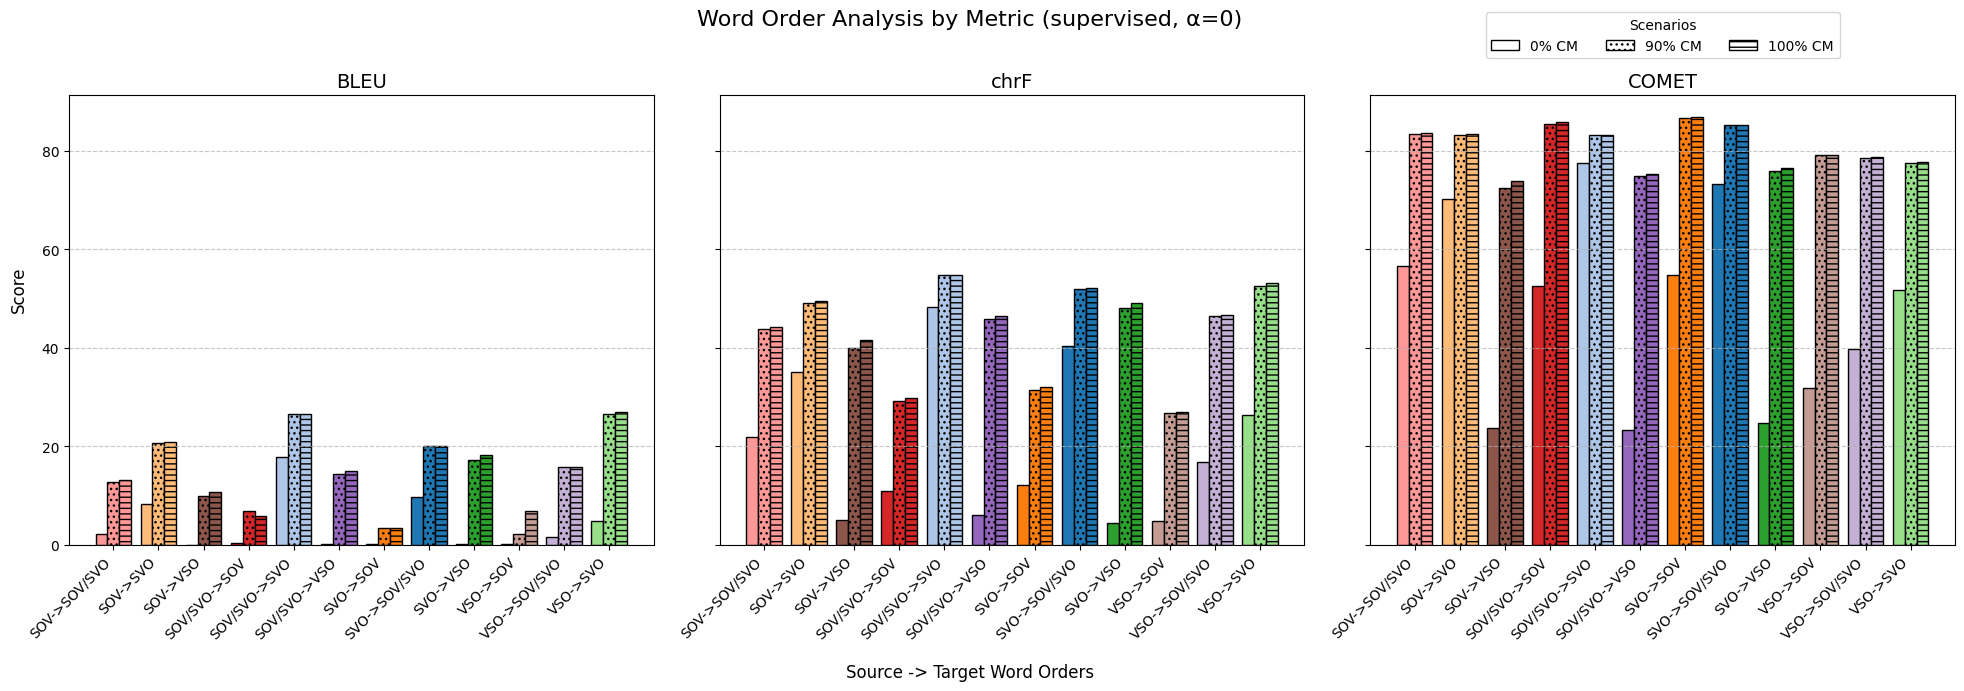

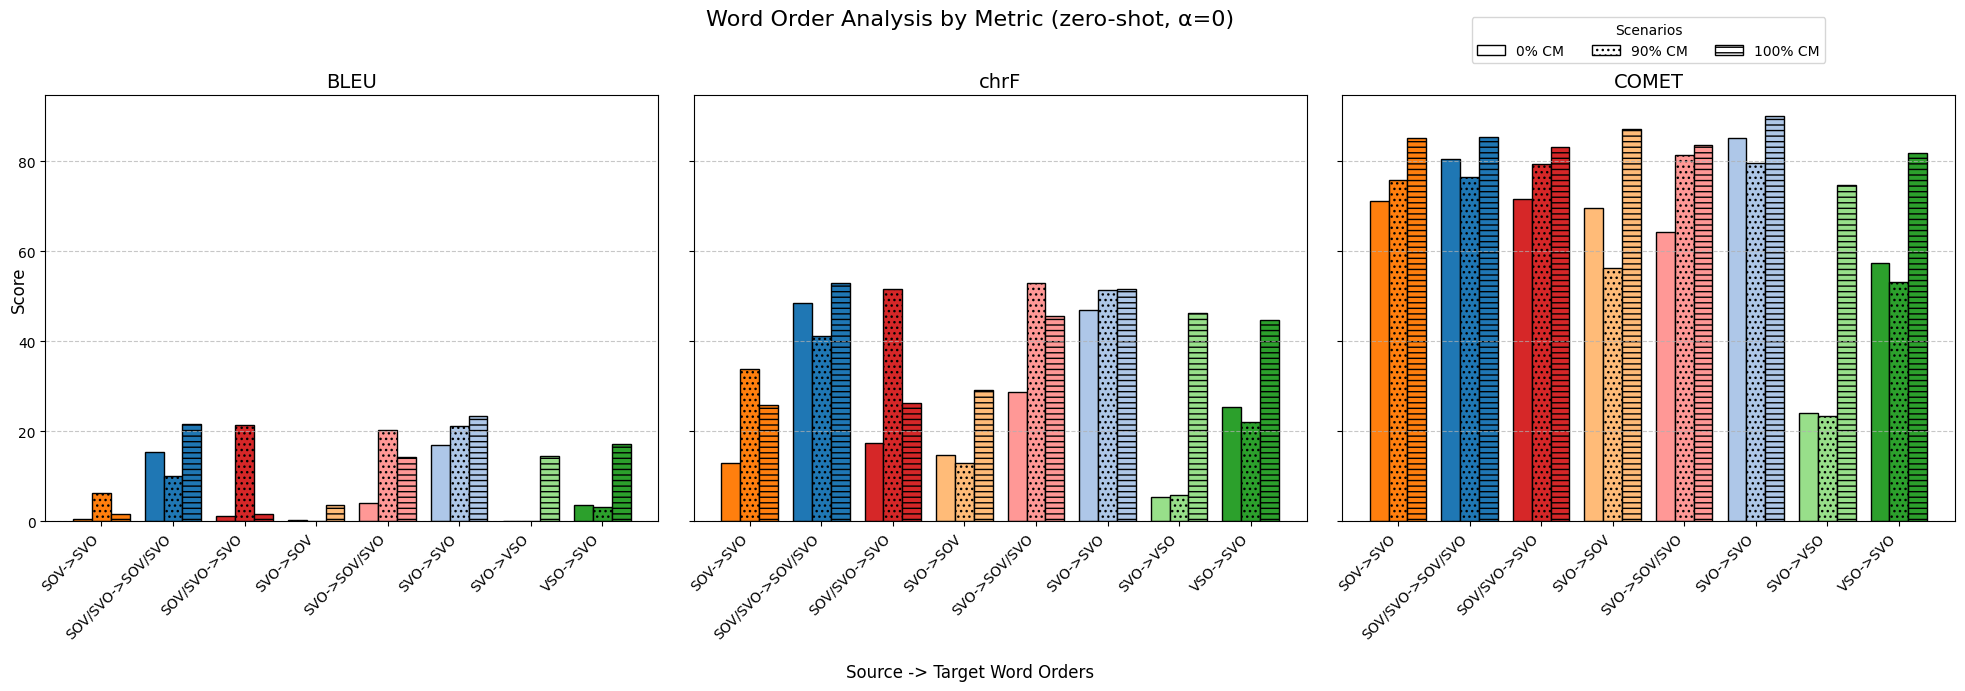

In [595]:
# Example usage:
from collections import defaultdict  # Missing import added

score_dicts_CM_sv_filtered = {key: {inner_key: value[0] for inner_key, value in inner_dict.items()} for key, inner_dict in score_dicts_CM_sv.items()}
score_dicts_CM_zs_filtered = {key: {inner_key: value[0] for inner_key, value in inner_dict.items()} for key, inner_dict in score_dicts_CM_zs.items()}

print(score_dicts_CM_sv)
print(label_dicts_CM_sv)

plot_metrics_by_word_order_combinations_colored_with_scenarios(score_dicts_CM_sv, label_dicts_CM_sv, 'supervised', word_orders)

plot_metrics_by_word_order_combinations_colored_with_scenarios(score_dicts_CM_zs, label_dicts_CM_zs, 'zero-shot', word_orders)


In [553]:
# THIS IS CURRENTLY WRONG. THIS IS NOT FOR THE CORRECT ALPHA VALUE. FIGURE OUT HOW THAT WORKS. WHY IS THERE 3?? 
# I THOUGHT WE JUST HAD 2 ALPHAS
# Double check that youre not making the same mistake for those other grapsh. rip.
score_dicts_CM_sv

{'0% CM': {'BLEU': [array([ 9.7, 17.9,  0.1,  8.3,  0.1,  4.8,  0.3,  2.2,  0.2,  1.5,  0. ,
           0.1]),
   array([ 8.4, 15.9,  0.1,  5.9,  0.1,  3.7,  0.3,  1.5,  0.1,  1.2,  0. ,
           0.1])],
  'chrF': [array([40.3, 48.3, 12.2, 35. ,  4.4, 26.4, 10.9, 21.8,  6. , 16.8,  5. ,
           4.9]),
   array([38.9, 46.9, 10.9, 30.4,  5.7, 23.6,  9.6, 18.5,  6.2, 15. ,  5.3,
           3.6])],
  'COMET': [array([73.3 , 77.52, 54.79, 70.18, 24.65, 51.69, 52.49, 56.7 , 23.24,
          39.72, 23.64, 31.75]),
   array([72.03, 76.07, 51.61, 66.08, 17.67, 47.57, 49.58, 52.16, 19.82,
          35.46, 21.11, 28.23])]},
 '90% CM': {'BLEU': [array([20. , 26.5,  3.3, 20.6, 17.3, 26.6,  6.9, 12.7, 14.3, 15.8,  9.9,
           2.2]),
   array([20.1, 26.6,  4.1, 21.2, 18. , 27.1,  3.6, 13.2, 14.7, 15.7, 11. ,
           4.2])],
  'chrF': [array([52. , 54.7, 31.4, 49.1, 48.1, 52.6, 29.2, 43.8, 45.8, 46.4, 40. ,
          26.8]),
   array([52.2, 55. , 32.6, 49.9, 49.2, 53.1, 29.8, 44.5, 46.4, 4